In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 76)
sns.set(style="whitegrid")
import warnings

In [389]:
#amina path
#df = pd.read_csv("/Users/aminarabehi/Downloads/Project 2/Patient_Characteristics_Survey__PCS___2019.csv", sep=";")

In [390]:
#nirusa path
df = pd.read_csv("C:/Users/nirus/Documents/DSTI/Ml_project_MI/Patient_Characteristics_Survey__PCS___2019.csv", sep=";")

In [391]:
df.shape

(196102, 76)

In [392]:
df.head()

Survey Year Program Category         Region Served Age Group     Sex  \
0         2019       OUTPATIENT    LONG ISLAND REGION     ADULT    MALE   
1         2019       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
2         2019       OUTPATIENT   HUDSON RIVER REGION     ADULT    MALE   
3         2019      RESIDENTIAL  NEW YORK CITY REGION     ADULT    MALE   
4         2019       OUTPATIENT        WESTERN REGION     ADULT  FEMALE   

           Transgender        Sexual Orientation       Hispanic Ethnicity  \
0  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL     YES, HISPANIC/LATINO   
1  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   
2  NO, NOT TRANSGENDER            LESBIAN OR GAY  NO, NOT HISPANIC/LATINO   
3  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL                  UNKNOWN   
4  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   

         Race        Living Situation  ... No Insurance  \
0  WHITE ONLY       PRIVATE RESIDENCE  ...           NO   
1  WHITE ONLY       PRIVATE RESIDENCE  ...           NO   
2  WHITE ONLY       PRIVATE RESIDENCE  ...           NO   
3       OTHER  OTHER LIVING SITUATION  ...           NO   
4  WHITE ONLY       PRIVATE RESIDENCE  ...           NO   

  Unknown Insurance Coverage Medicaid Insurance Medicaid Managed Insurance  \
0                      False                YES                        YES   
1                      False                YES                        YES   
2                      False                YES                        YES   
3                      False                YES                         NO   
4                      False                YES                        YES   

  Medicare Insurance Private Insurance Child Health Plus Insurance  \
0                 NO                NO                          NO   
1                 NO                NO                          NO   
2                 NO                NO                          NO   
3                 NO                NO                          NO   
4                 NO                NO                          NO   

  Other Insurance Criminal Justice Status Three Digit Residence Zip Code  
0              NO                      NO                            117  
1              NO                      NO                            100  
2              NO                      NO                            120  
3              NO                      NO                            114  
4              NO                      NO                            142  

[5 rows x 76 columns]

In [393]:
df.tail()

Survey Year Program Category         Region Served Age Group     Sex  \
196097         2019       OUTPATIENT   HUDSON RIVER REGION     ADULT  FEMALE   
196098         2019       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
196099         2019       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
196100         2019          SUPPORT   HUDSON RIVER REGION     CHILD  FEMALE   
196101         2019       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   

                Transgender        Sexual Orientation  \
196097  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196098  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196099  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196100  NO, NOT TRANSGENDER                   UNKNOWN   
196101  NO, NOT TRANSGENDER                   UNKNOWN   

             Hispanic Ethnicity        Race        Living Situation  ...  \
196097  NO, NOT HISPANIC/LATINO  WHITE ONLY  OTHER LIVING SITUATION  ...   
196098  NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE  ...   
196099  NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE  ...   
196100  NO, NOT HISPANIC/LATINO  BLACK ONLY       PRIVATE RESIDENCE  ...   
196101  NO, NOT HISPANIC/LATINO       OTHER                 UNKNOWN  ...   

       No Insurance Unknown Insurance Coverage Medicaid Insurance  \
196097           NO                      False                YES   
196098           NO                      False                YES   
196099           NO                      False                YES   
196100           NO                      False                YES   
196101           NO                      False                YES   

       Medicaid Managed Insurance Medicare Insurance Private Insurance  \
196097                        YES                 NO                NO   
196098                         NO                YES                NO   
196099                         NO                YES                NO   
196100                        YES                 NO                NO   
196101                        YES                YES                NO   

       Child Health Plus Insurance Other Insurance Criminal Justice Status  \
196097                          NO              NO                      NO   
196098                          NO              NO                      NO   
196099                          NO              NO                      NO   
196100                          NO              NO                      NO   
196101                          NO              NO                      NO   

       Three Digit Residence Zip Code  
196097                            109  
196098                            111  
196099                            114  
196100                            105  
196101                            999  

[5 rows x 76 columns]

# I-DATA CLEANING

In [395]:
df = df.drop(columns=['Survey Year', 'Three Digit Residence Zip Code'])

print("\nColumns after dropping:")
print(df.columns.tolist())


Columns after dropping:
['Program Category', 'Region Served', 'Age Group', 'Sex', 'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race', 'Living Situation', 'Household Composition', 'Preferred Language', 'Religious Preference', 'Veteran Status', 'Employment Status', 'Number Of Hours Worked Each Week', 'Education Status', 'Special Education Services', 'Mental Illness', 'Intellectual Disability', 'Autism Spectrum', 'Other Developmental Disability', 'Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder', 'Mobility Impairment Disorder', 'Hearing Impairment', 'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease', 'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease', 'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition', 'Unknown C

In [396]:
df.dtypes.value_counts()

object    72
bool       2
Name: count, dtype: int64

In [397]:
# List of placeholder values that actually mean "missing"
placeholders = [
    'UNKNOWN', 'UNKNOWN RACE', 'UNKNOWN EMPLOYMENT STATUS',
    'UNKNOWN EMPLOYMENT HOURS', 'UNKNOWN INSURANCE COVERAGE',
    'UNKNOWN CHRONIC MED CONDITION', 'DATA NOT AVAILABLE',
    'CLIENT DID NOT ANSWER', "CLIENT DIDN'T ANSWER"
]
df.replace(placeholders, np.nan, inplace=True)
#on les remplace par NaN

# II- EDA

Target vizualisation

In [400]:
df['Mental Illness'] = df['Mental Illness'].where(
    df['Mental Illness'].isna(),
    df['Mental Illness'].str.upper().str.strip()
)

In [401]:
df["Mental Illness"] = df["Mental Illness"].map({
    'YES': 1,
    'NO': 0,
    '1': 1,
    '0': 0
})

In [402]:
df["Mental Illness"] = df["Mental Illness"].astype('Int64')

In [403]:
#Correction de potentiel incoherence 
mask = (
    (df['Mental Illness'] == 1) &
    (df['Serious Mental Illness'] != 'YES') &
    (df['Principal Diagnosis Class'] != 'MENTAL ILLNESS') &
    (df['Additional Diagnosis Class'] != 'MENTAL ILLNESS')
)

df.loc[mask, 'Mental Illness'] = 0
print(f"{mask.sum()} valeurs corrigées à 0 dans 'Mental Illness' car non justifiées")

2137 valeurs corrigées à 0 dans 'Mental Illness' car non justifiées


In [404]:
df['Mental Illness'].value_counts(dropna=False)

Mental Illness
1       186403
0         7714
<NA>      1985
Name: count, dtype: Int64

Vizualization de nos données qualitatifs/ catégorielles (object)

In [406]:
#rendre en MAJ sans toucher les NaN
for col in df.select_dtypes('object'):
    df[col] = df[col].where(df[col].isna(), df[col].str.upper())

In [407]:
for col in df.select_dtypes('object') :
  print(f'{col:-<50}, {df[col].unique()}')

Program Category----------------------------------, ['OUTPATIENT' 'RESIDENTIAL' 'SUPPORT' 'INPATIENT' 'EMERGENCY']
Region Served-------------------------------------, ['LONG ISLAND REGION' 'NEW YORK CITY REGION' 'HUDSON RIVER REGION'
 'WESTERN REGION' 'CENTRAL NY REGION']
Age Group-----------------------------------------, ['ADULT' 'CHILD' nan]
Sex-----------------------------------------------, ['MALE' 'FEMALE' nan]
Transgender---------------------------------------, ['NO, NOT TRANSGENDER' 'YES, TRANSGENDER' nan]
Sexual Orientation--------------------------------, ['STRAIGHT OR HETEROSEXUAL' 'LESBIAN OR GAY' 'OTHER' 'BISEXUAL' nan]
Hispanic Ethnicity--------------------------------, ['YES, HISPANIC/LATINO' 'NO, NOT HISPANIC/LATINO' nan]
Race----------------------------------------------, ['WHITE ONLY' 'OTHER' 'BLACK ONLY' 'MULTI-RACIAL' nan]
Living Situation----------------------------------, ['PRIVATE RESIDENCE' 'OTHER LIVING SITUATION' nan 'INSTITUTIONAL SETTING']
Household Composit

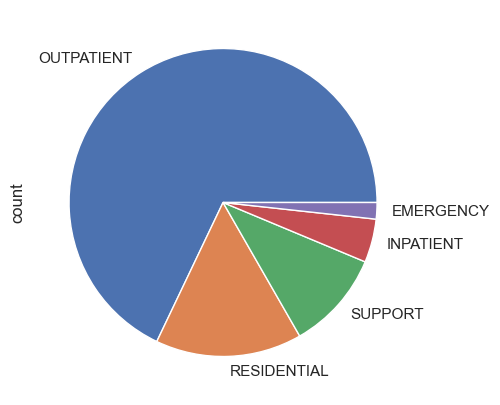

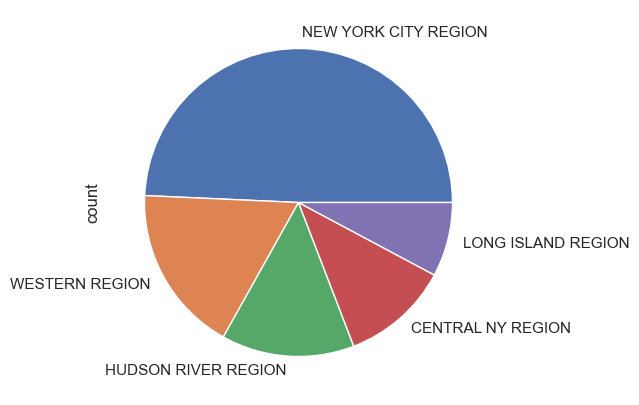

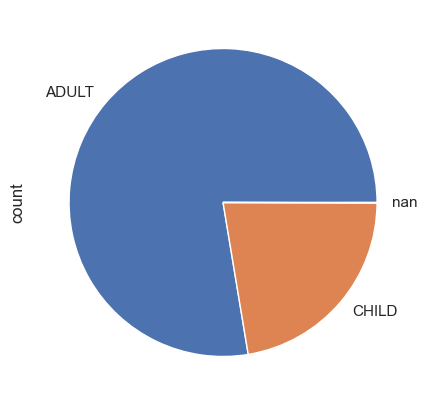

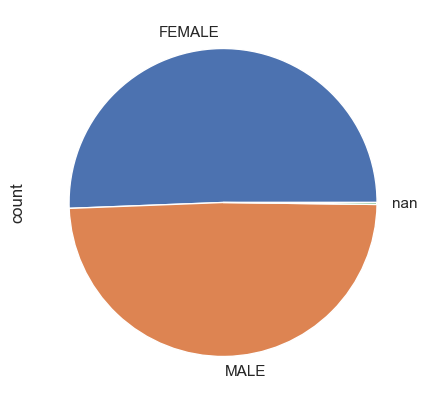

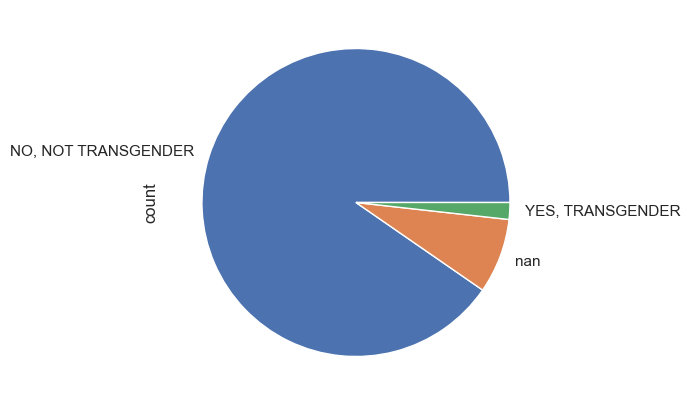

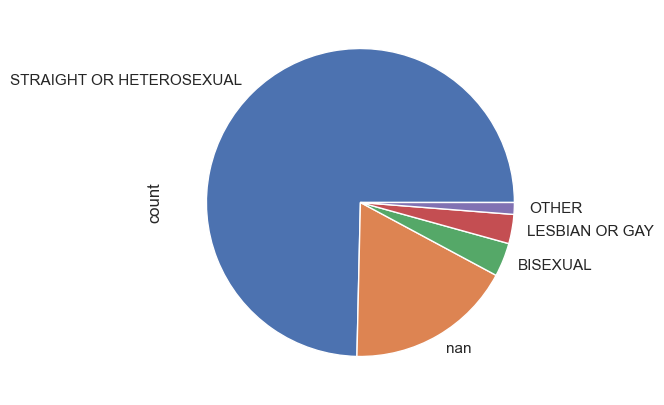

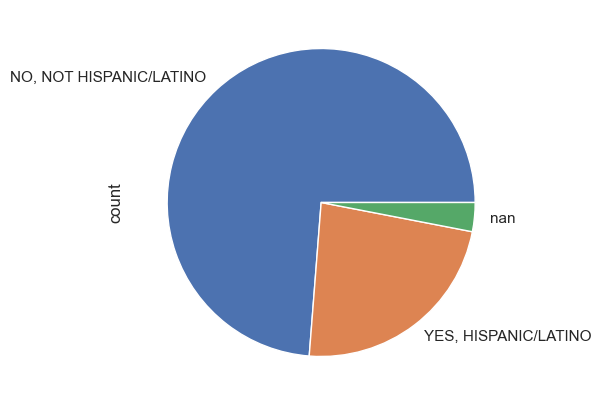

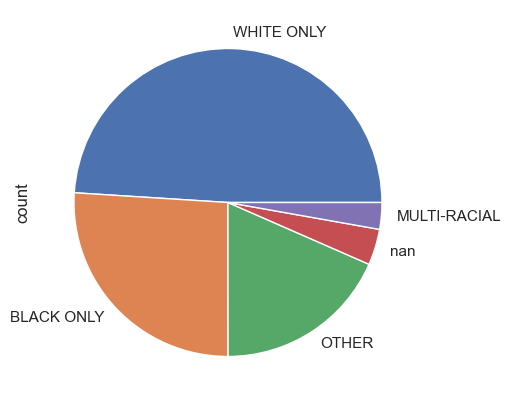

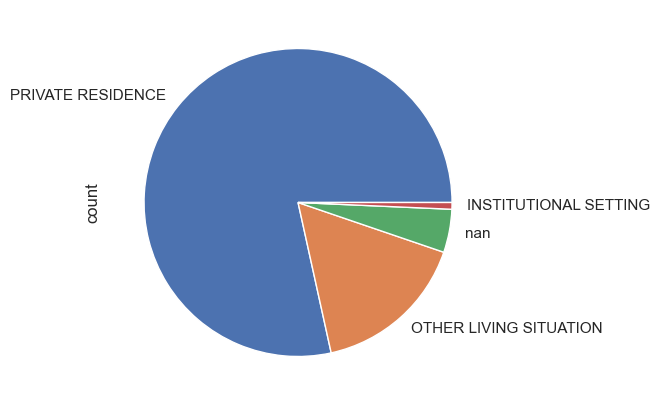

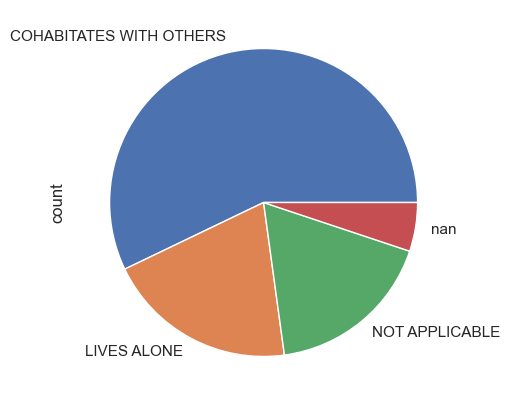

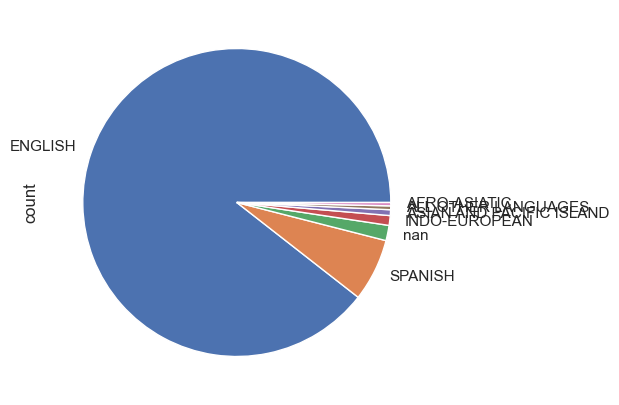

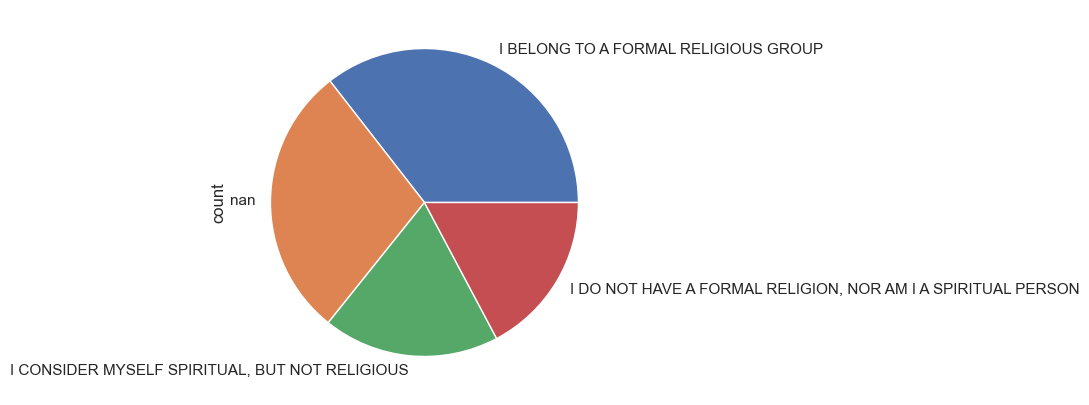

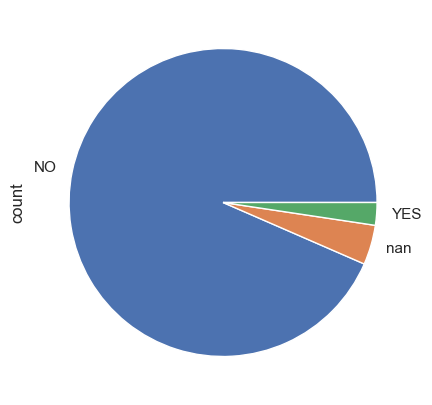

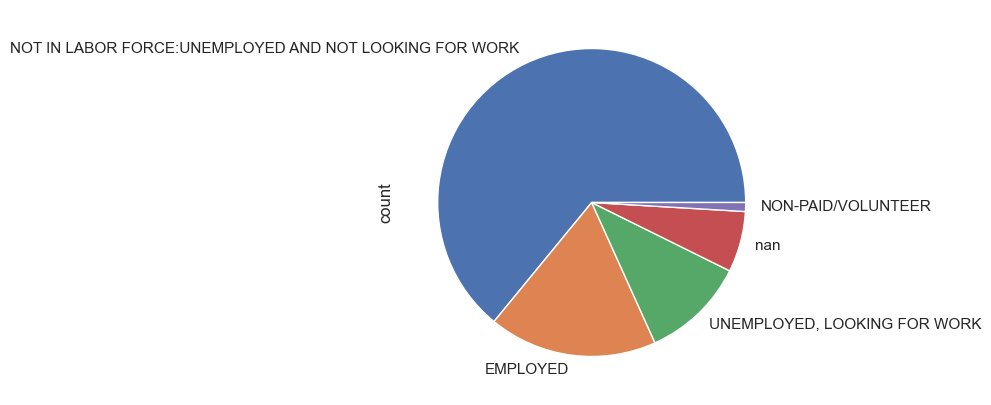

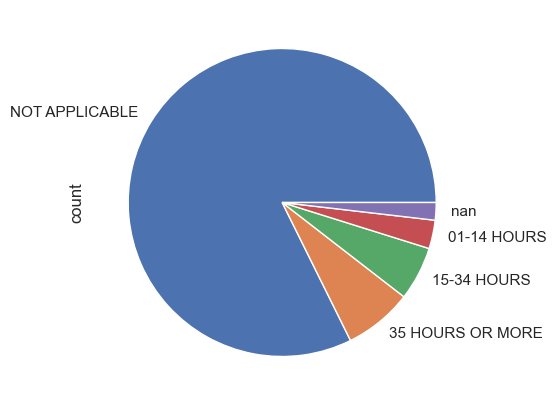

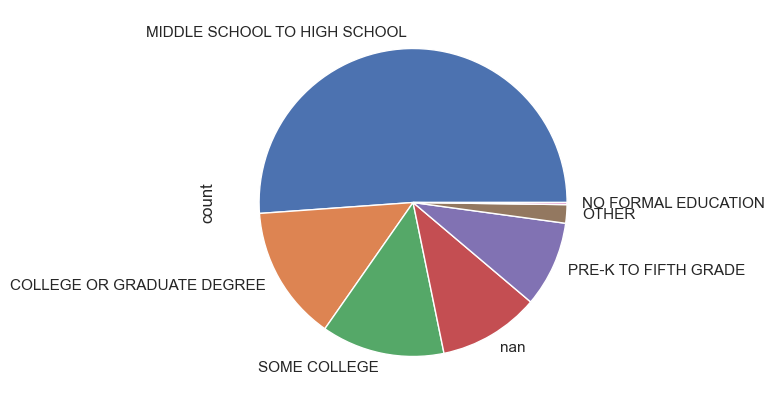

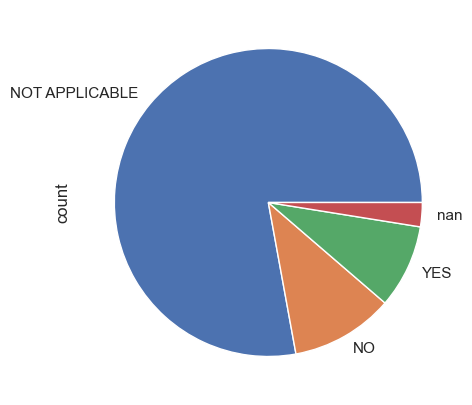

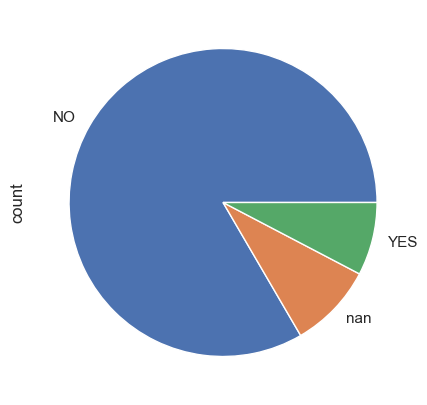

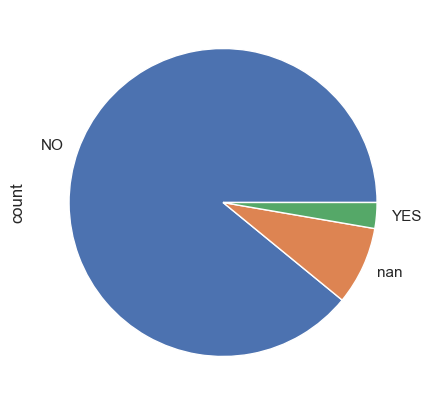

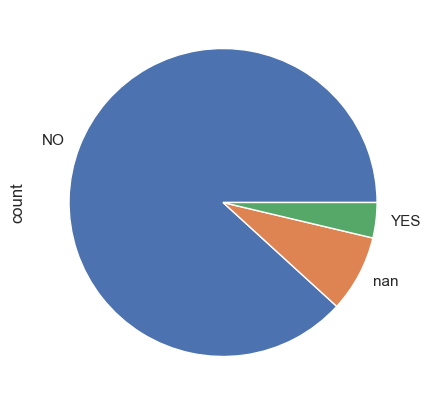

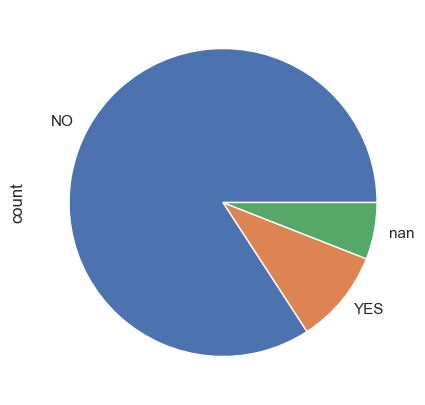

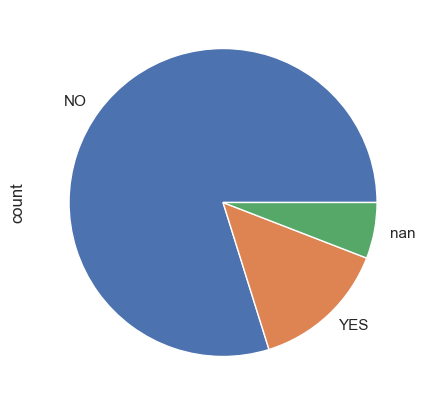

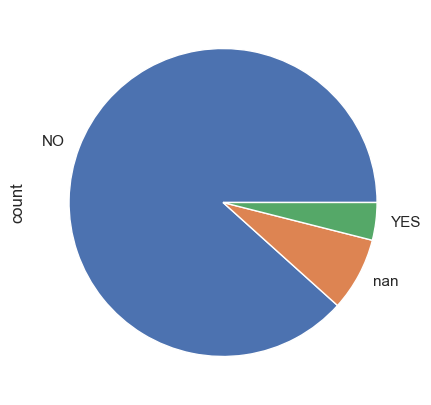

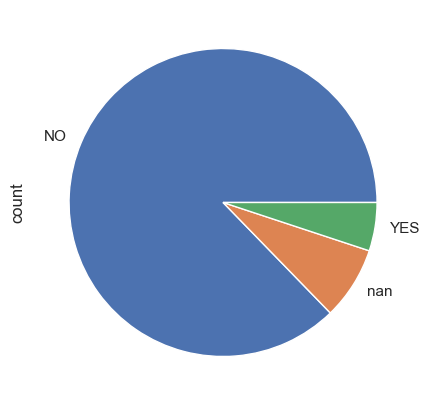

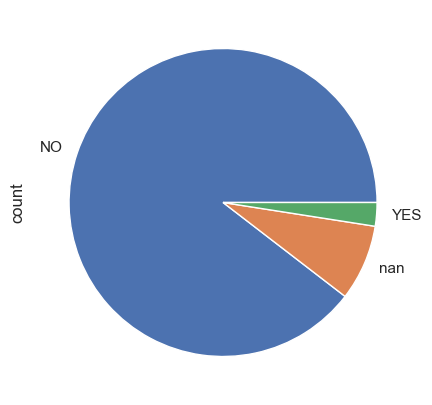

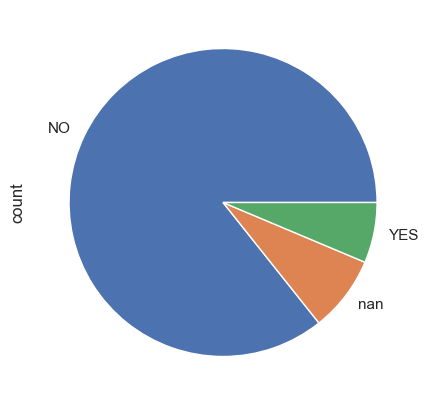

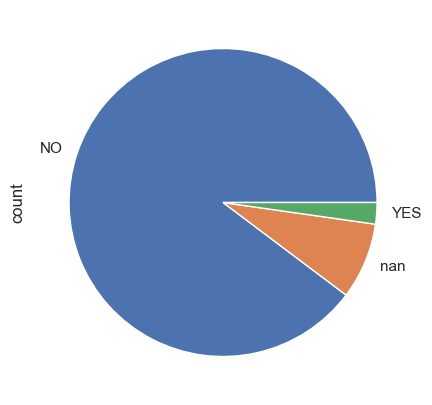

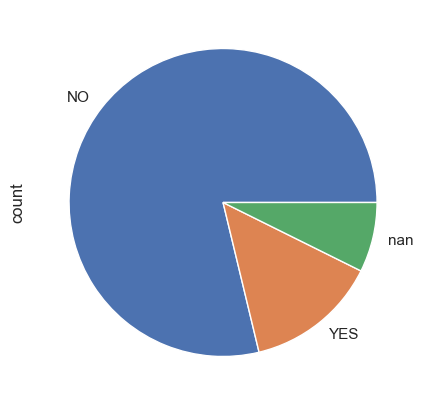

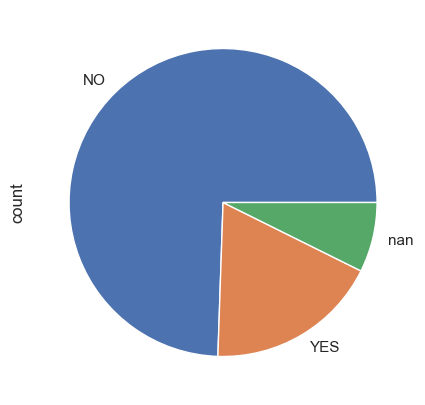

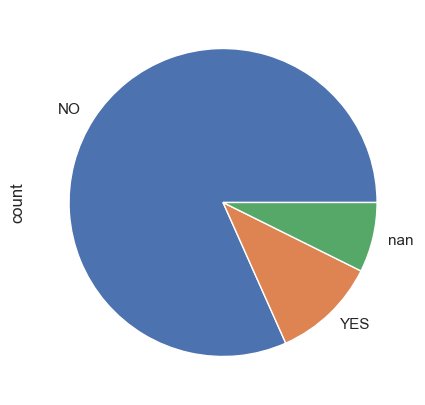

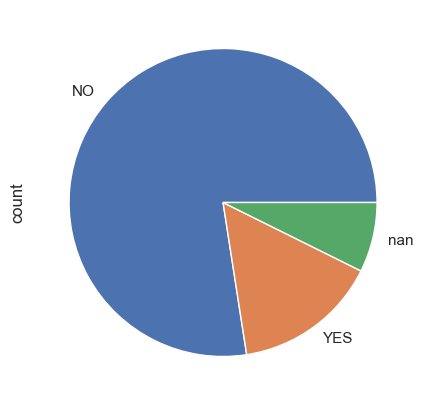

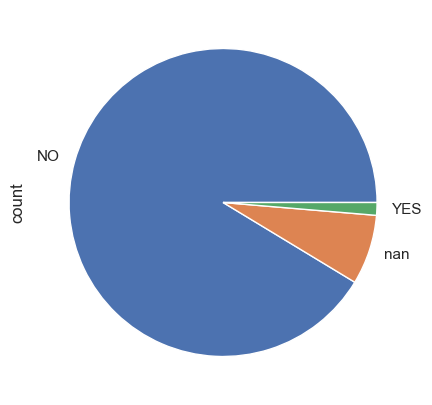

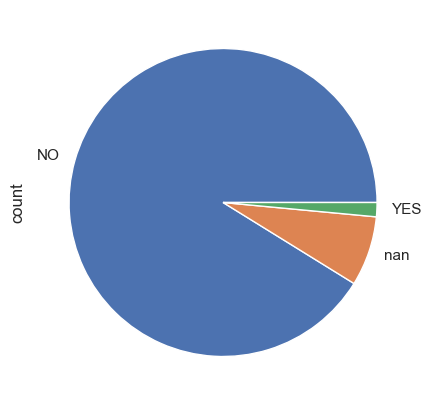

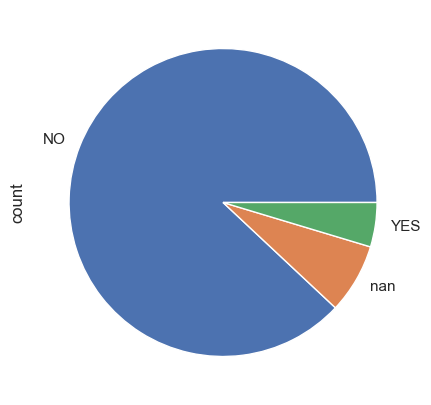

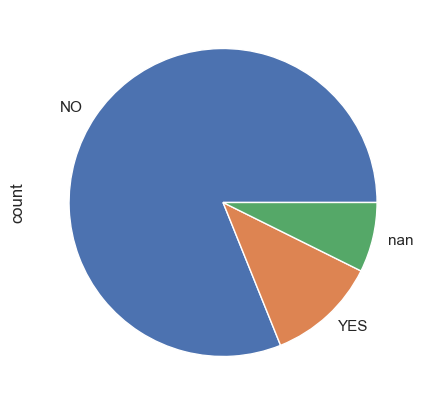

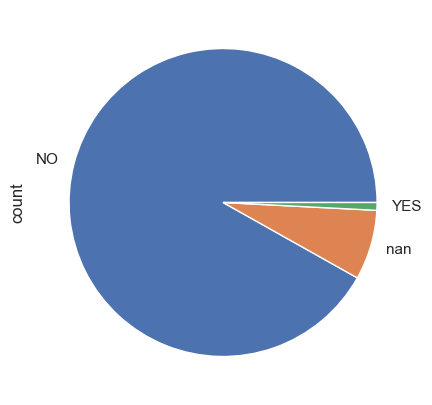

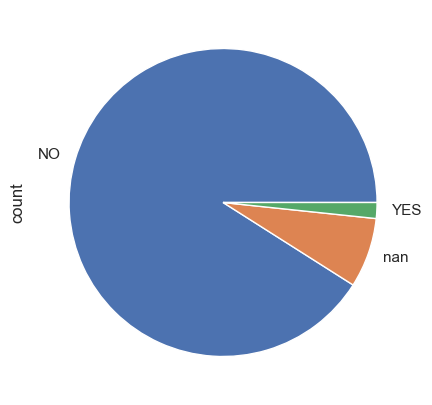

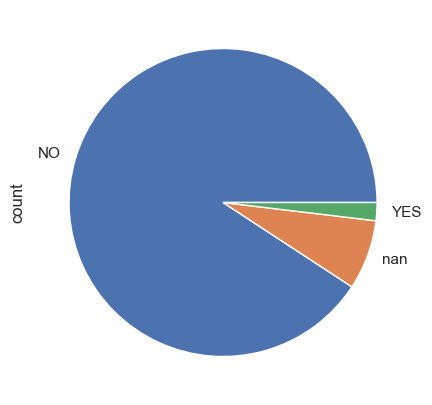

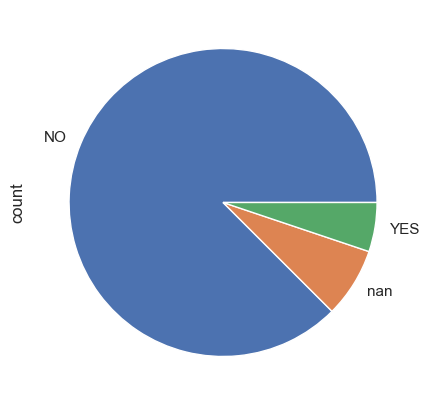

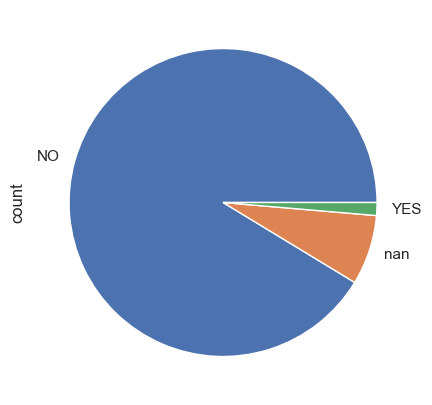

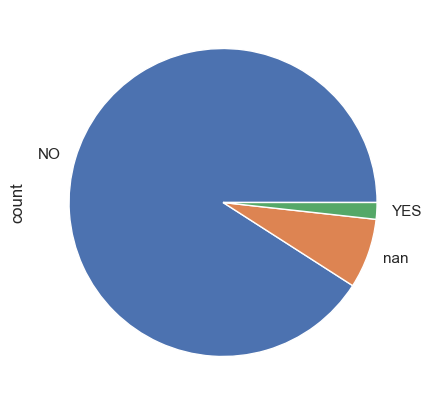

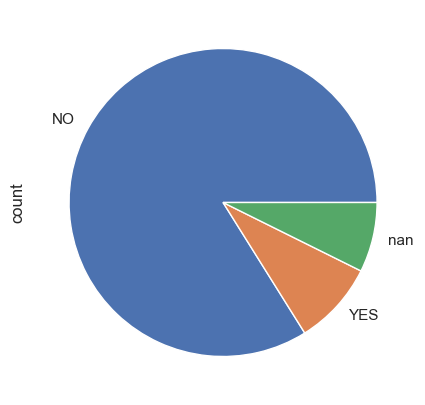

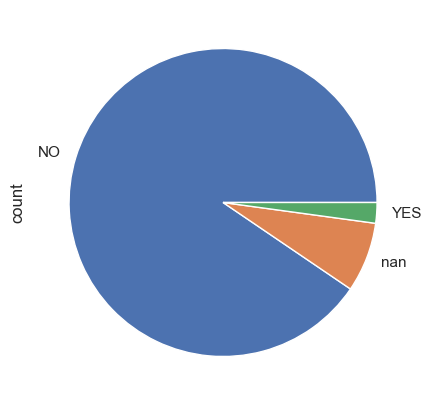

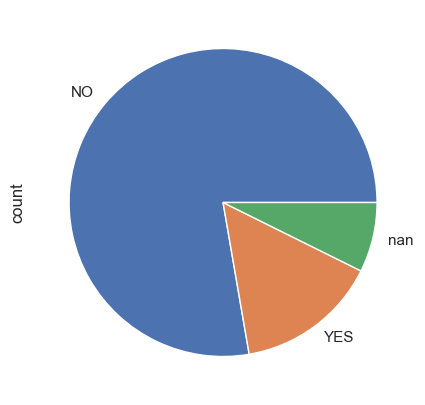

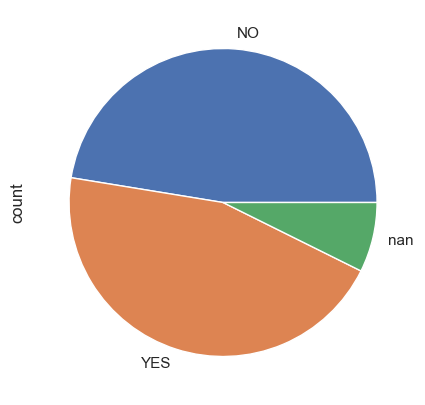

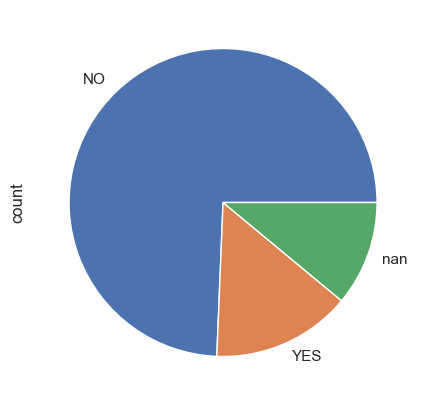

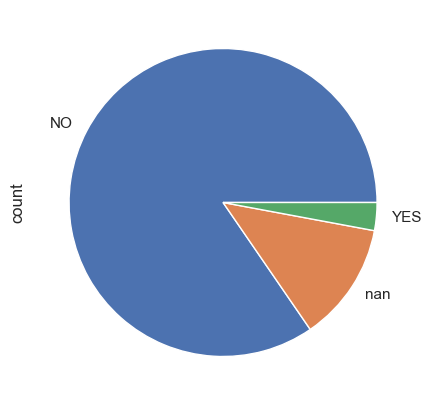

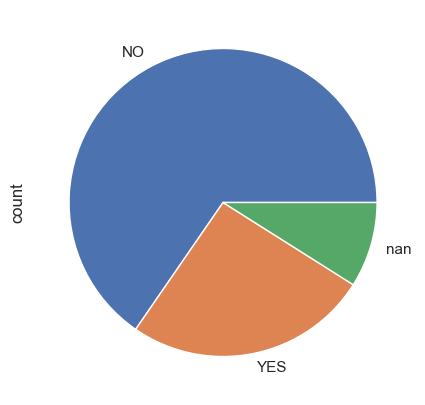

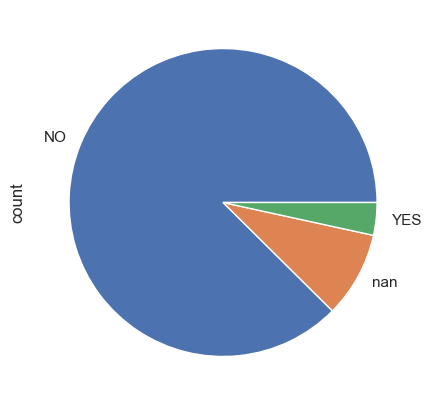

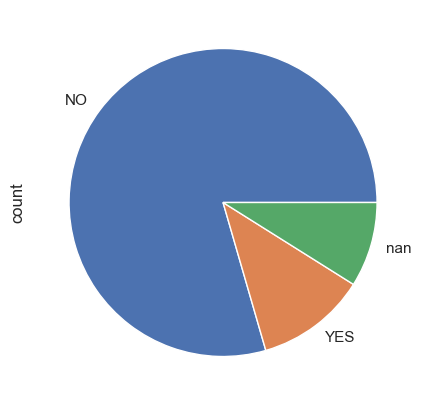

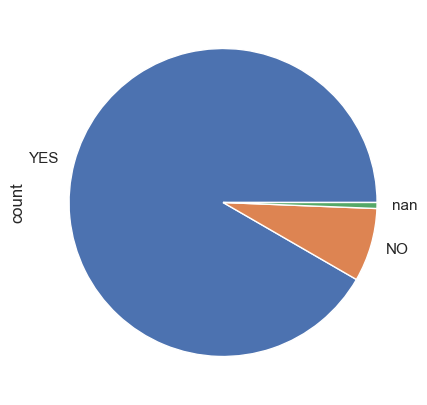

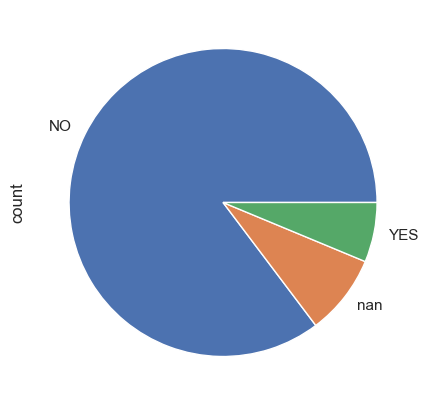

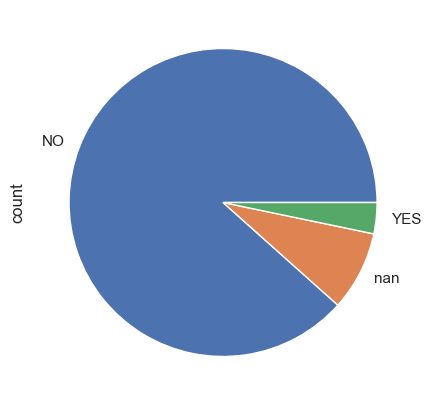

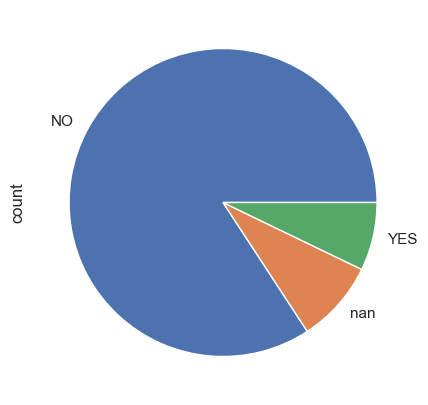

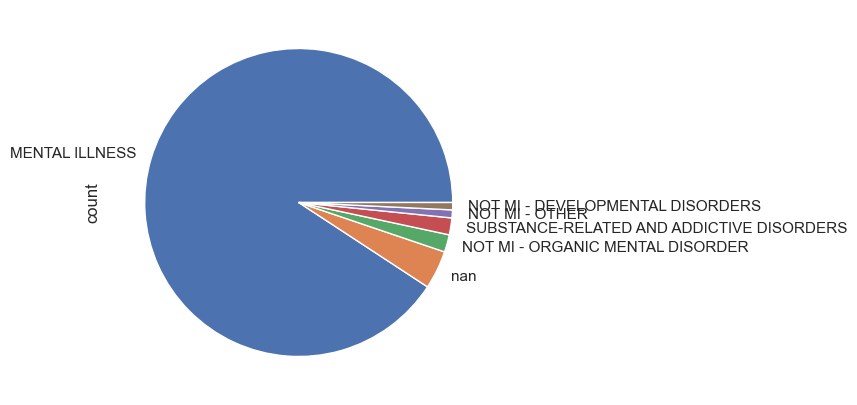

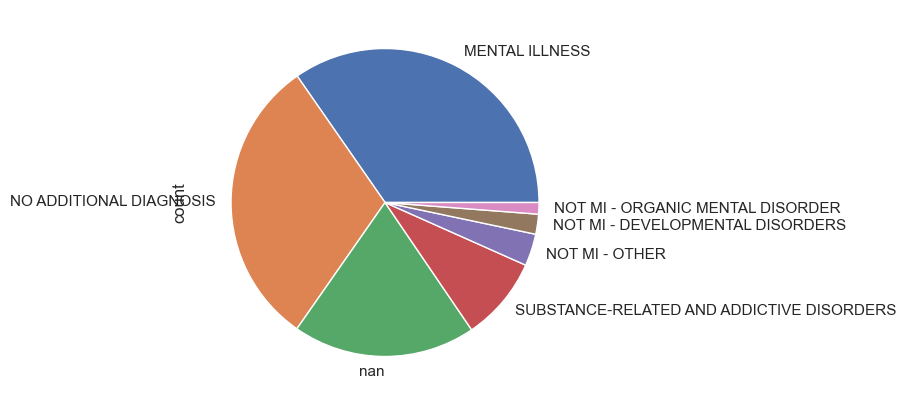

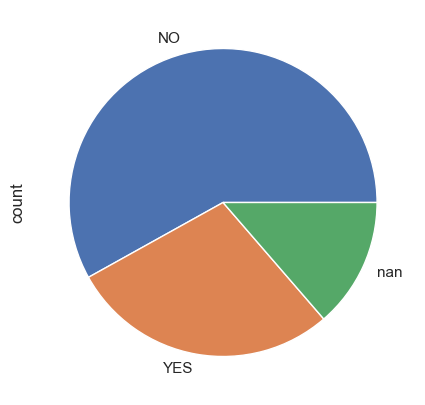

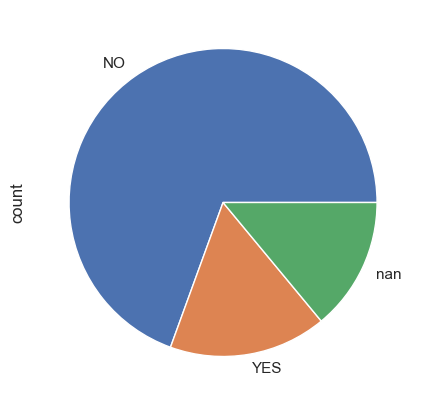

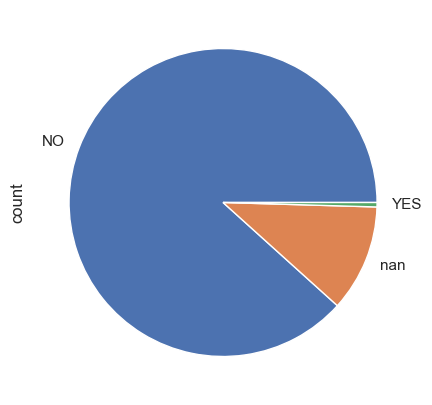

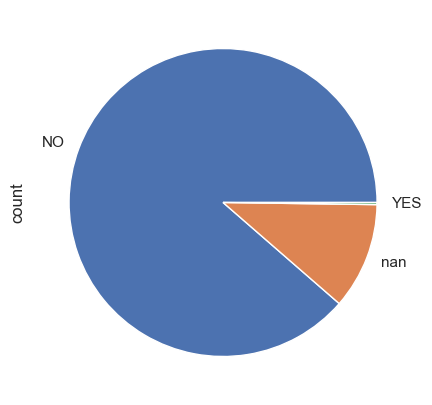

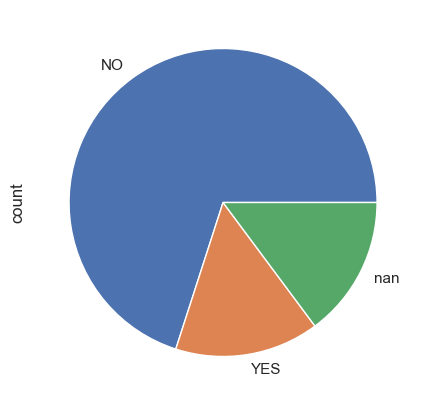

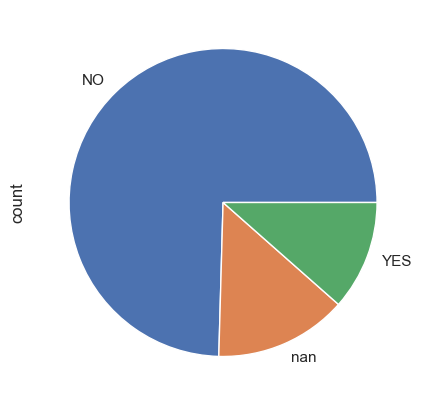

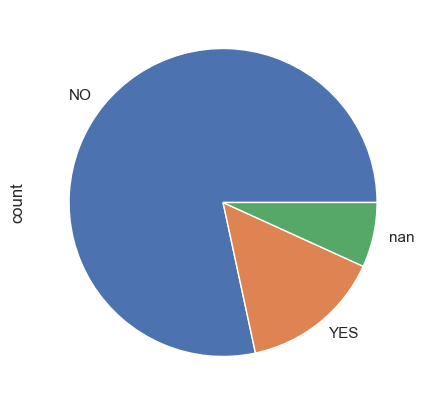

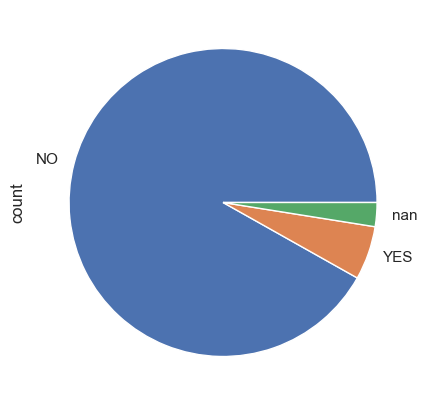

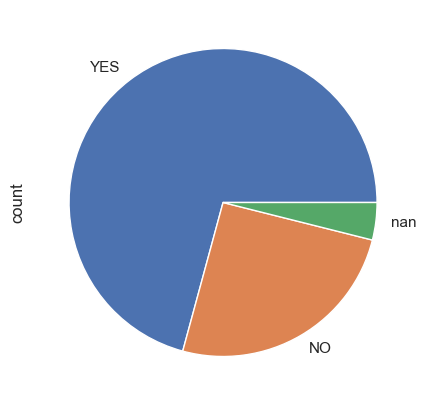

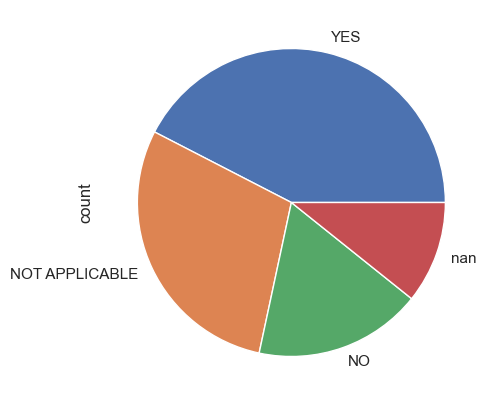

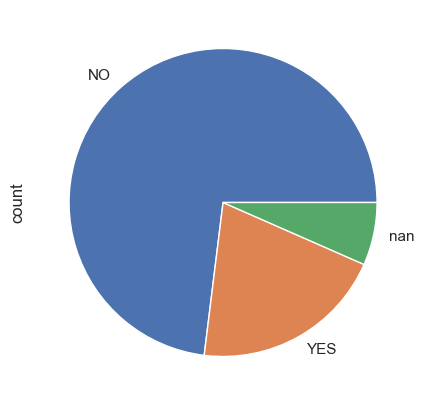

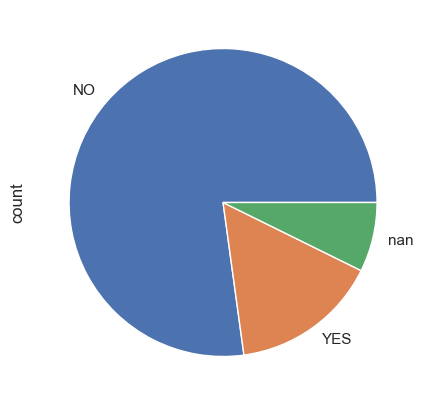

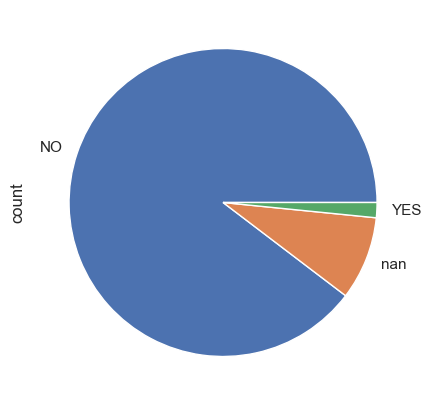

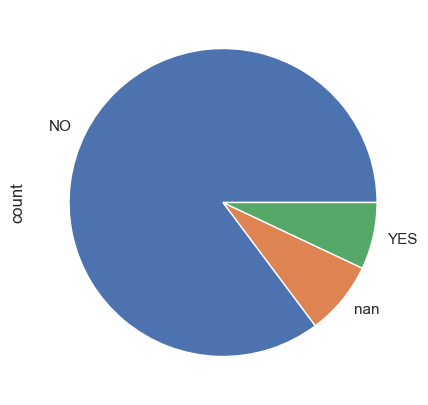

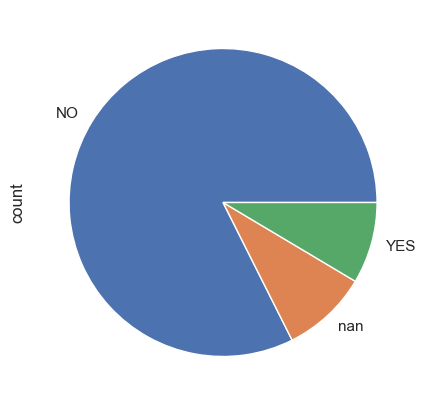

In [408]:
for col in df.select_dtypes('object') :
    plt.figure(figsize=(5, 5))
    df[col].value_counts(dropna=False).plot.pie()
    plt.show()

In [409]:
for col in df.select_dtypes('bool') :
  print(f'{col:-<50}, {df[col].unique()}')

Unknown Chronic Med Condition---------------------, [False  True]
Unknown Insurance Coverage------------------------, [False  True]


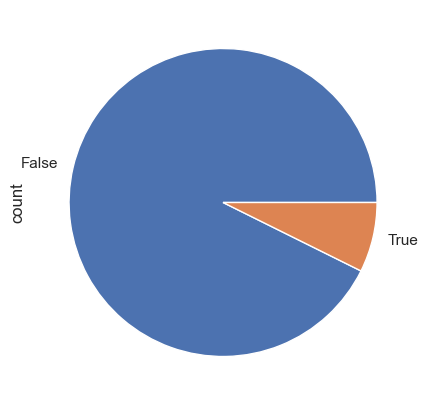

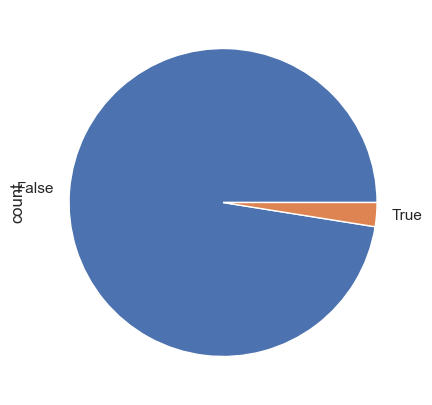

In [410]:
for col in df.select_dtypes('bool') :
    plt.figure(figsize=(5, 5))
    df[col].value_counts(dropna=False).plot.pie()
    plt.show()


Distributions après imputation
------------------------------

Program Category — Valeurs absolues
Program Category
OUTPATIENT     133197
RESIDENTIAL     30145
SUPPORT         20413
INPATIENT        8960
EMERGENCY        3387
Name: count, dtype: int64

Program Category — Pourcentages
Program Category
OUTPATIENT     67.92
RESIDENTIAL    15.37
SUPPORT        10.41
INPATIENT       4.57
EMERGENCY       1.73
Name: proportion, dtype: float64


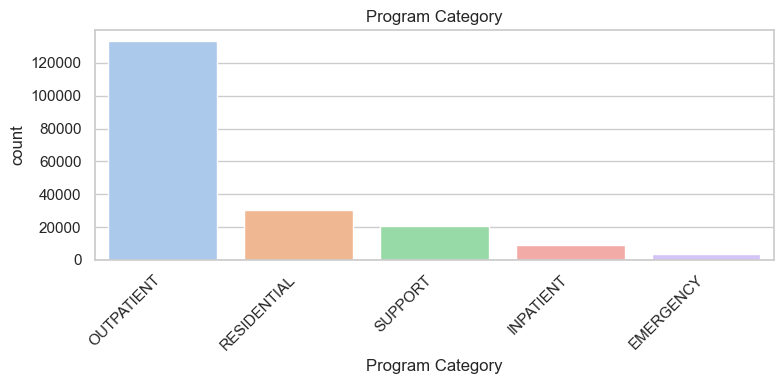


Region Served — Valeurs absolues
Region Served
NEW YORK CITY REGION    96643
WESTERN REGION          34524
HUDSON RIVER REGION     27369
CENTRAL NY REGION       22264
LONG ISLAND REGION      15302
Name: count, dtype: int64

Region Served — Pourcentages
Region Served
NEW YORK CITY REGION    49.28
WESTERN REGION          17.61
HUDSON RIVER REGION     13.96
CENTRAL NY REGION       11.35
LONG ISLAND REGION       7.80
Name: proportion, dtype: float64


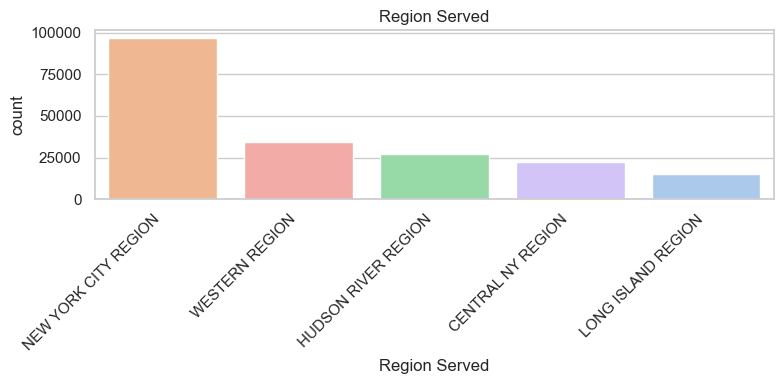


Age Group — Valeurs absolues
Age Group
ADULT    152202
CHILD     43820
NaN          80
Name: count, dtype: int64

Age Group — Pourcentages
Age Group
ADULT    77.61
CHILD    22.35
NaN       0.04
Name: proportion, dtype: float64


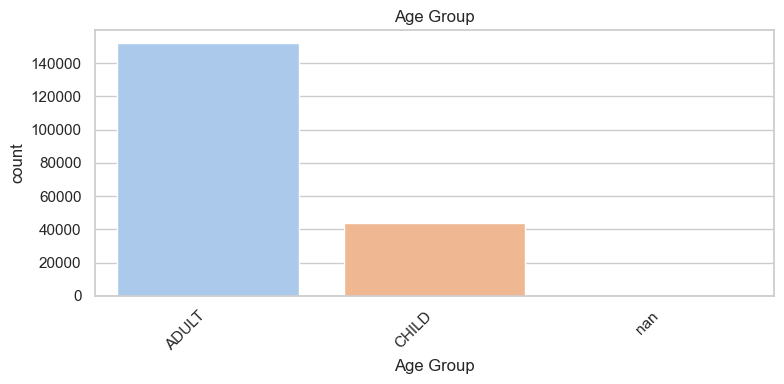


Sex — Valeurs absolues
Sex
FEMALE    99244
MALE      96463
NaN         395
Name: count, dtype: int64

Sex — Pourcentages
Sex
FEMALE    50.61
MALE      49.19
NaN        0.20
Name: proportion, dtype: float64


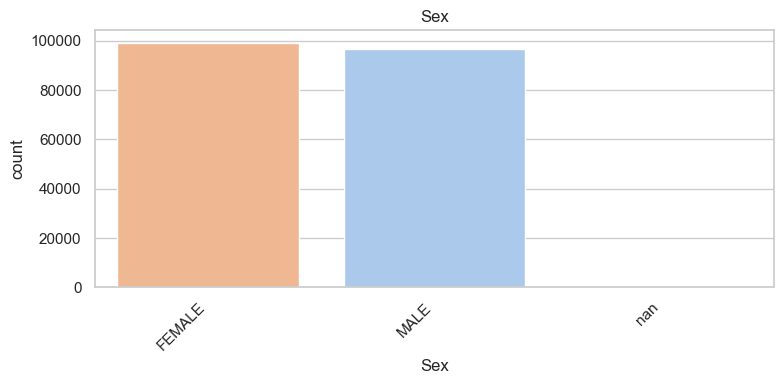


Transgender — Valeurs absolues
Transgender
NO, NOT TRANSGENDER    177222
NaN                     15426
YES, TRANSGENDER         3454
Name: count, dtype: int64

Transgender — Pourcentages
Transgender
NO, NOT TRANSGENDER    90.37
NaN                     7.87
YES, TRANSGENDER        1.76
Name: proportion, dtype: float64


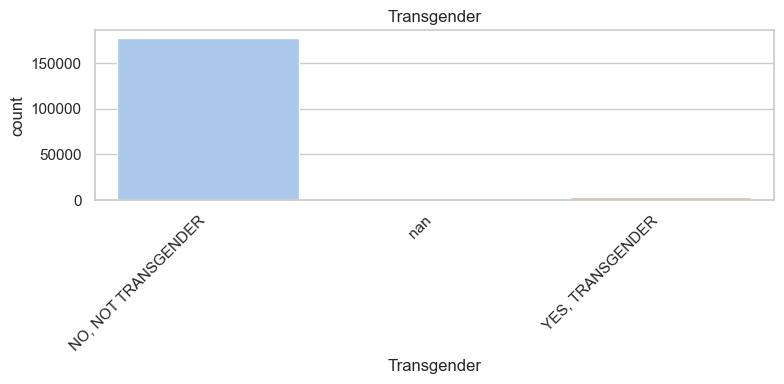


Sexual Orientation — Valeurs absolues
Sexual Orientation
STRAIGHT OR HETEROSEXUAL    146368
NaN                          34358
BISEXUAL                      6940
LESBIAN OR GAY                6014
OTHER                         2422
Name: count, dtype: int64

Sexual Orientation — Pourcentages
Sexual Orientation
STRAIGHT OR HETEROSEXUAL    74.64
NaN                         17.52
BISEXUAL                     3.54
LESBIAN OR GAY               3.07
OTHER                        1.24
Name: proportion, dtype: float64


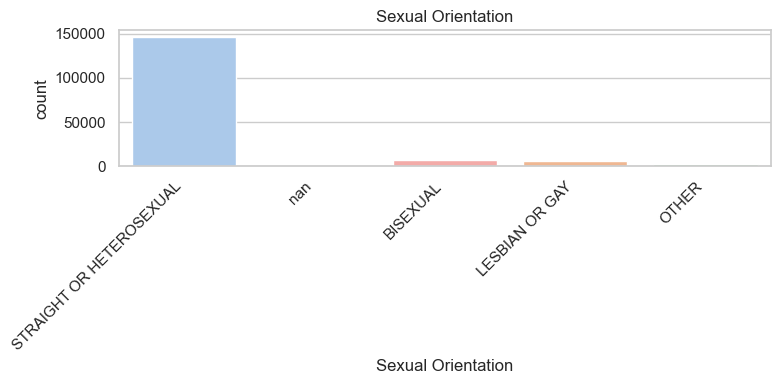


Hispanic Ethnicity — Valeurs absolues
Hispanic Ethnicity
NO, NOT HISPANIC/LATINO    144650
YES, HISPANIC/LATINO        45487
NaN                          5965
Name: count, dtype: int64

Hispanic Ethnicity — Pourcentages
Hispanic Ethnicity
NO, NOT HISPANIC/LATINO    73.76
YES, HISPANIC/LATINO       23.20
NaN                         3.04
Name: proportion, dtype: float64


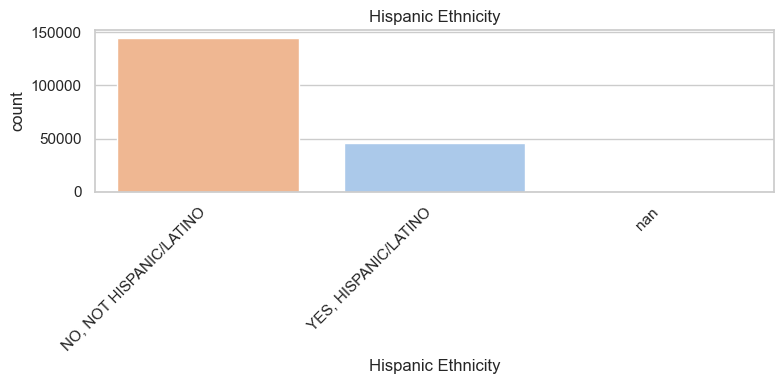


Race — Valeurs absolues
Race
WHITE ONLY      96075
BLACK ONLY      51022
OTHER           36117
NaN              7403
MULTI-RACIAL     5485
Name: count, dtype: int64

Race — Pourcentages
Race
WHITE ONLY      48.99
BLACK ONLY      26.02
OTHER           18.42
NaN              3.78
MULTI-RACIAL     2.80
Name: proportion, dtype: float64


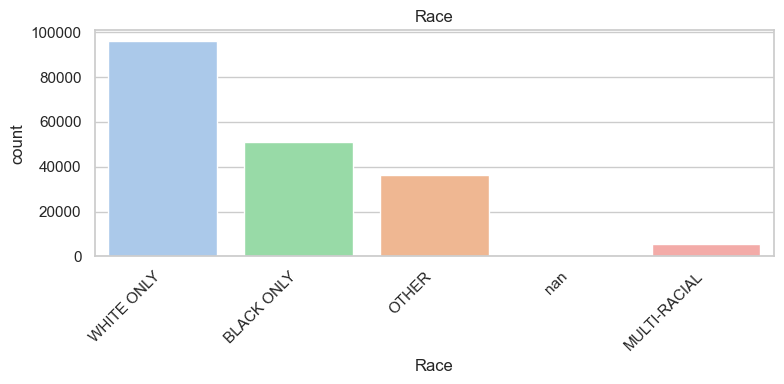


Living Situation — Valeurs absolues
Living Situation
PRIVATE RESIDENCE         153849
OTHER LIVING SITUATION     31985
NaN                         8893
INSTITUTIONAL SETTING       1375
Name: count, dtype: int64

Living Situation — Pourcentages
Living Situation
PRIVATE RESIDENCE         78.45
OTHER LIVING SITUATION    16.31
NaN                        4.53
INSTITUTIONAL SETTING      0.70
Name: proportion, dtype: float64


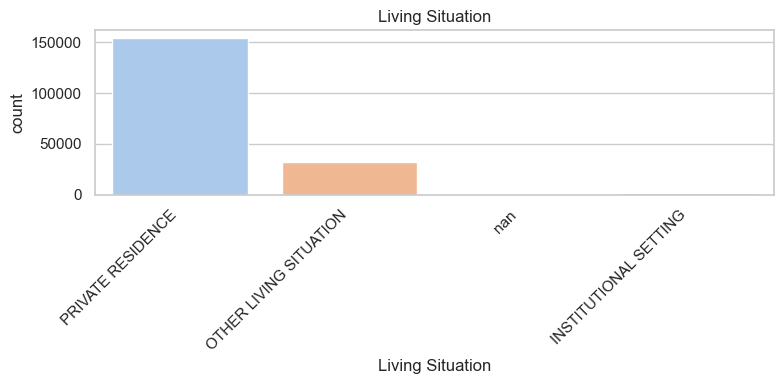


Household Composition — Valeurs absolues
Household Composition
COHABITATES WITH OTHERS    112019
LIVES ALONE                 39295
NOT APPLICABLE              34750
NaN                         10038
Name: count, dtype: int64

Household Composition — Pourcentages
Household Composition
COHABITATES WITH OTHERS    57.12
LIVES ALONE                20.04
NOT APPLICABLE             17.72
NaN                         5.12
Name: proportion, dtype: float64


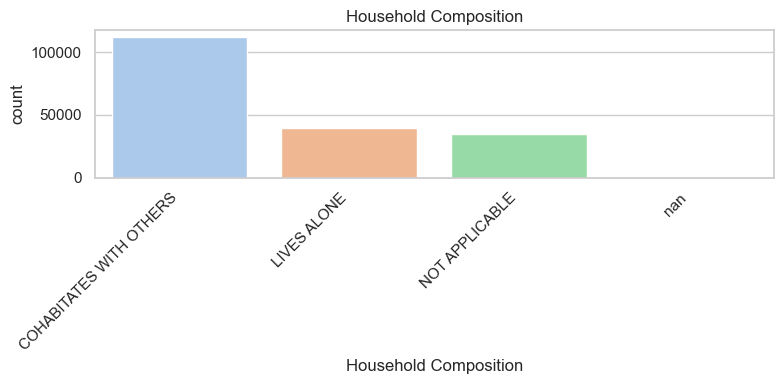


Preferred Language — Valeurs absolues
Preferred Language
ENGLISH                     175409
SPANISH                      12884
NaN                           3143
INDO-EUROPEAN                 2008
ASIAN AND PACIFIC ISLAND      1190
ALL OTHER LANGUAGES            783
AFRO-ASIATIC                   685
Name: count, dtype: int64

Preferred Language — Pourcentages
Preferred Language
ENGLISH                     89.45
SPANISH                      6.57
NaN                          1.60
INDO-EUROPEAN                1.02
ASIAN AND PACIFIC ISLAND     0.61
ALL OTHER LANGUAGES          0.40
AFRO-ASIATIC                 0.35
Name: proportion, dtype: float64


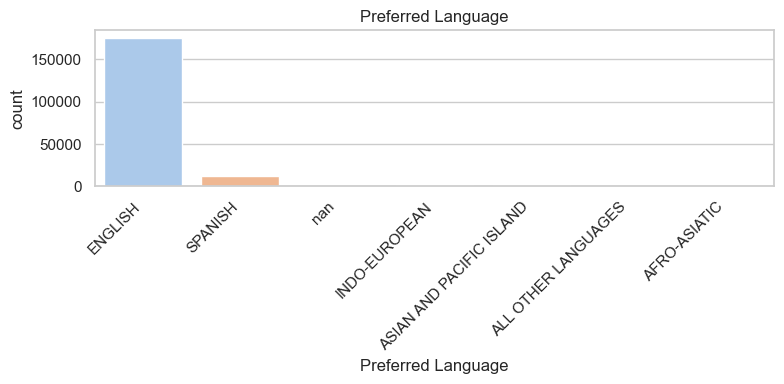


Religious Preference — Valeurs absolues
Religious Preference
I BELONG TO A FORMAL RELIGIOUS GROUP                            69657
NaN                                                             56347
I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS                  36303
I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON    33795
Name: count, dtype: int64

Religious Preference — Pourcentages
Religious Preference
I BELONG TO A FORMAL RELIGIOUS GROUP                            35.52
NaN                                                             28.73
I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS                  18.51
I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON    17.23
Name: proportion, dtype: float64


C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\2600055465.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


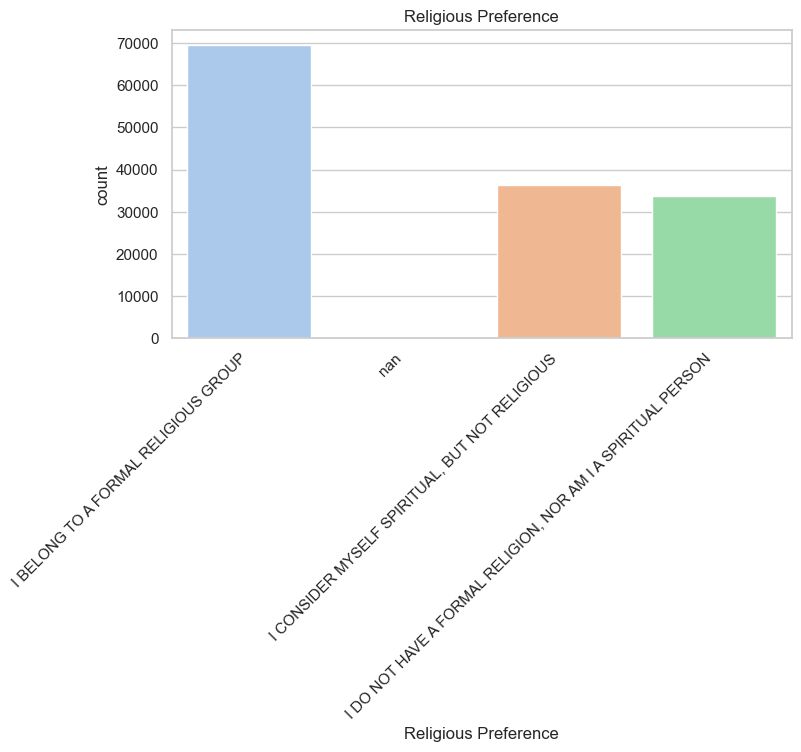


Veteran Status — Valeurs absolues
Veteran Status
NO     183286
NaN      8164
YES      4652
Name: count, dtype: int64

Veteran Status — Pourcentages
Veteran Status
NO     93.46
NaN     4.16
YES     2.37
Name: proportion, dtype: float64


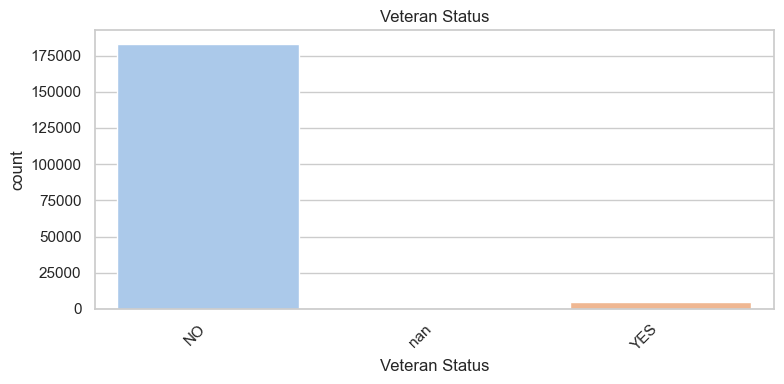


Employment Status — Valeurs absolues
Employment Status
NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK    125629
EMPLOYED                                                   34674
UNEMPLOYED, LOOKING FOR WORK                               21445
NaN                                                        12518
NON-PAID/VOLUNTEER                                          1836
Name: count, dtype: int64

Employment Status — Pourcentages
Employment Status
NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK    64.06
EMPLOYED                                                  17.68
UNEMPLOYED, LOOKING FOR WORK                              10.94
NaN                                                        6.38
NON-PAID/VOLUNTEER                                         0.94
Name: proportion, dtype: float64


C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\2600055465.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


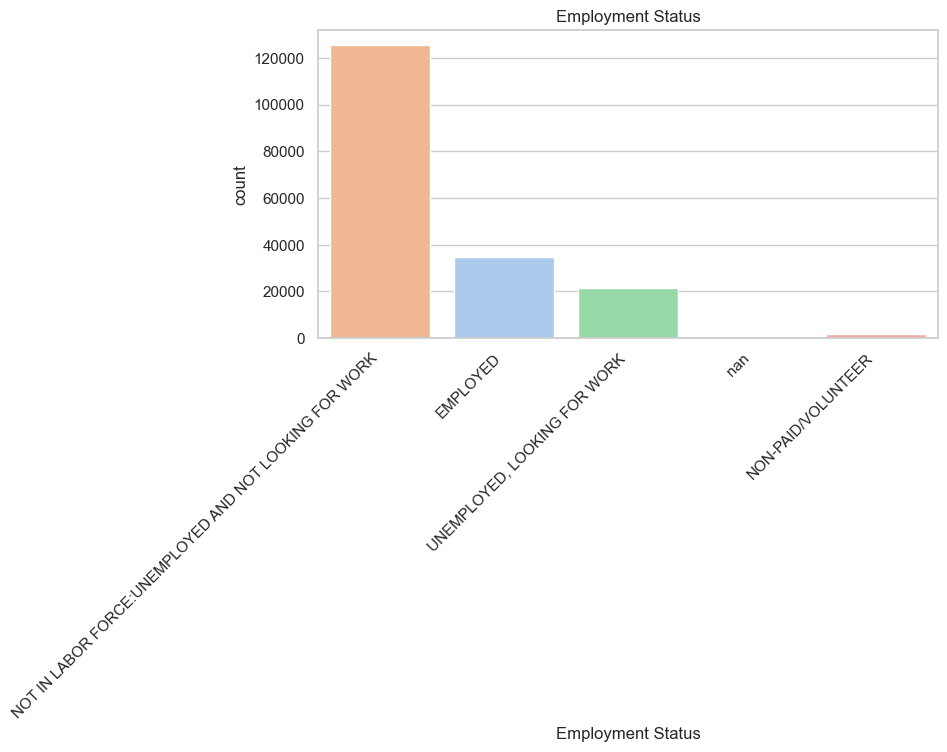


Number Of Hours Worked Each Week — Valeurs absolues
Number Of Hours Worked Each Week
NOT APPLICABLE      161428
35 HOURS OR MORE     14112
15-34 HOURS          11089
01-14 HOURS           5864
NaN                   3609
Name: count, dtype: int64

Number Of Hours Worked Each Week — Pourcentages
Number Of Hours Worked Each Week
NOT APPLICABLE      82.32
35 HOURS OR MORE     7.20
15-34 HOURS          5.65
01-14 HOURS          2.99
NaN                  1.84
Name: proportion, dtype: float64


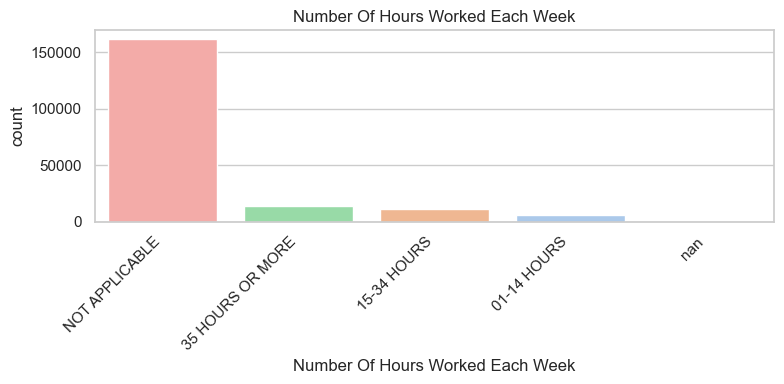


Education Status — Valeurs absolues
Education Status
MIDDLE SCHOOL TO HIGH SCHOOL    100276
COLLEGE OR GRADUATE DEGREE       27769
SOME COLLEGE                     25349
NaN                              20799
PRE-K TO FIFTH GRADE             17679
OTHER                             3798
NO FORMAL EDUCATION                432
Name: count, dtype: int64

Education Status — Pourcentages
Education Status
MIDDLE SCHOOL TO HIGH SCHOOL    51.13
COLLEGE OR GRADUATE DEGREE      14.16
SOME COLLEGE                    12.93
NaN                             10.61
PRE-K TO FIFTH GRADE             9.02
OTHER                            1.94
NO FORMAL EDUCATION              0.22
Name: proportion, dtype: float64


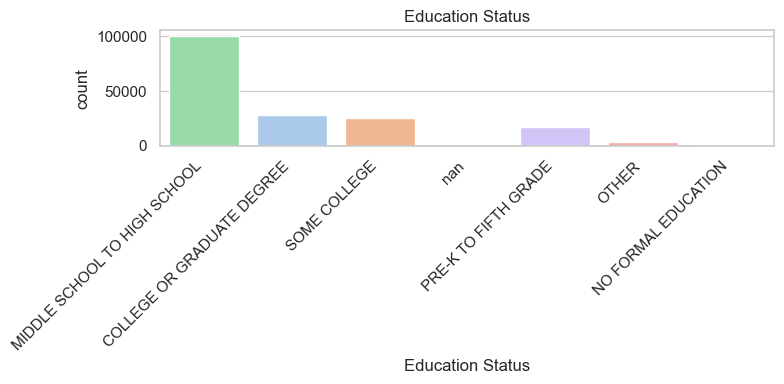


Special Education Services — Valeurs absolues
Special Education Services
NOT APPLICABLE    152709
NO                 21204
YES                17219
NaN                 4970
Name: count, dtype: int64

Special Education Services — Pourcentages
Special Education Services
NOT APPLICABLE    77.87
NO                10.81
YES                8.78
NaN                2.53
Name: proportion, dtype: float64


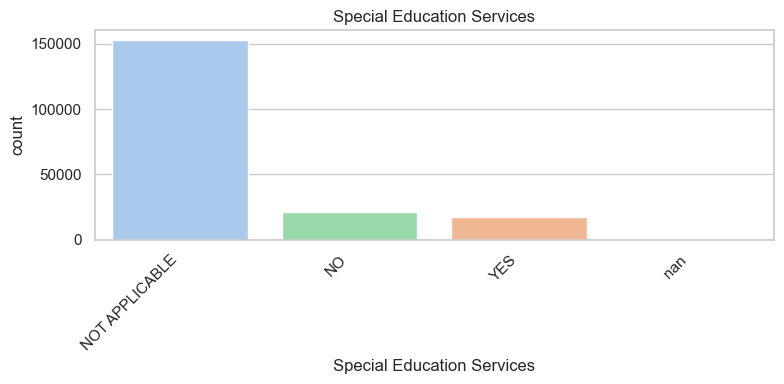


Intellectual Disability — Valeurs absolues
Intellectual Disability
NO     163561
NaN     17491
YES     15050
Name: count, dtype: int64

Intellectual Disability — Pourcentages
Intellectual Disability
NO     83.41
NaN     8.92
YES     7.67
Name: proportion, dtype: float64


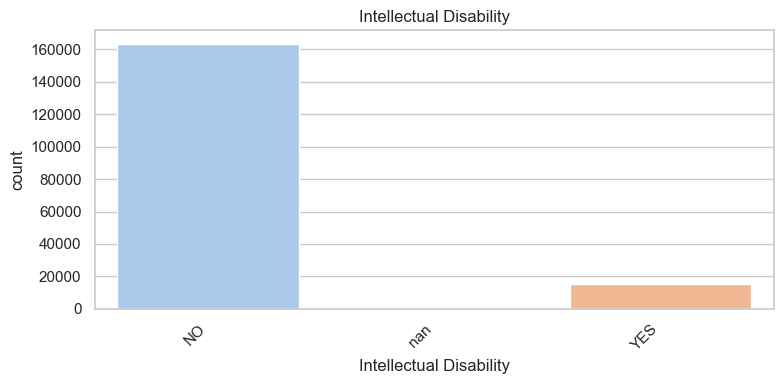


Autism Spectrum — Valeurs absolues
Autism Spectrum
NO     174681
NaN     16106
YES      5315
Name: count, dtype: int64

Autism Spectrum — Pourcentages
Autism Spectrum
NO     89.08
NaN     8.21
YES     2.71
Name: proportion, dtype: float64


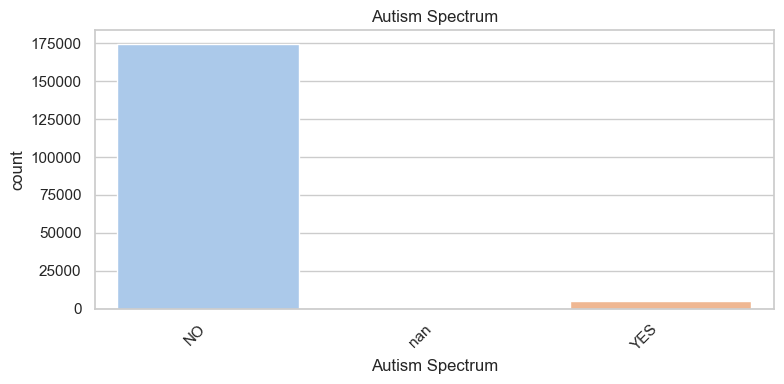


Other Developmental Disability — Valeurs absolues
Other Developmental Disability
NO     172995
NaN     15844
YES      7263
Name: count, dtype: int64

Other Developmental Disability — Pourcentages
Other Developmental Disability
NO     88.22
NaN     8.08
YES     3.70
Name: proportion, dtype: float64


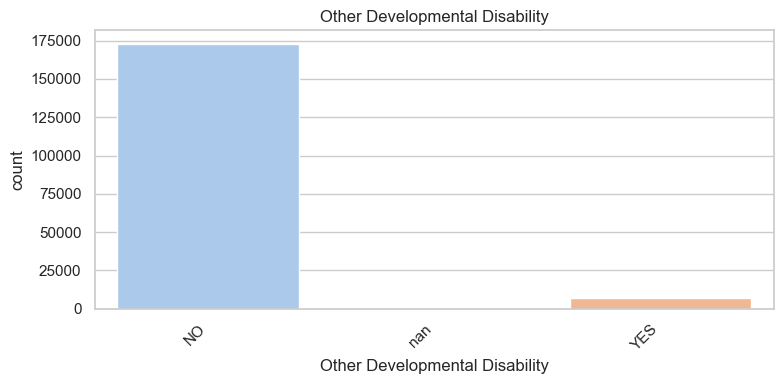


Alcohol Related Disorder — Valeurs absolues
Alcohol Related Disorder
NO     165083
YES     19334
NaN     11685
Name: count, dtype: int64

Alcohol Related Disorder — Pourcentages
Alcohol Related Disorder
NO     84.18
YES     9.86
NaN     5.96
Name: proportion, dtype: float64


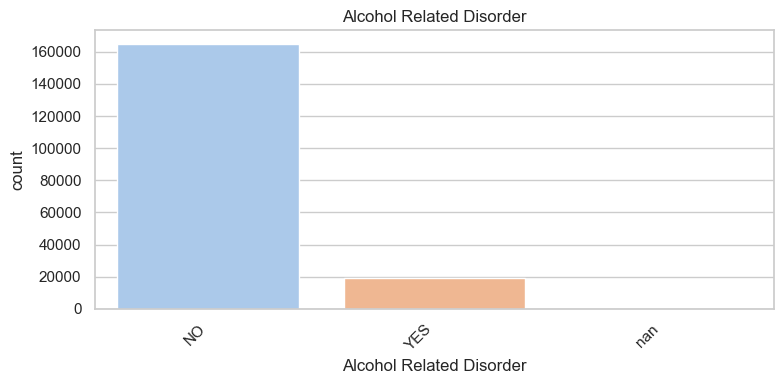


Drug Substance Disorder — Valeurs absolues
Drug Substance Disorder
NO     156531
YES     28045
NaN     11526
Name: count, dtype: int64

Drug Substance Disorder — Pourcentages
Drug Substance Disorder
NO     79.82
YES    14.30
NaN     5.88
Name: proportion, dtype: float64


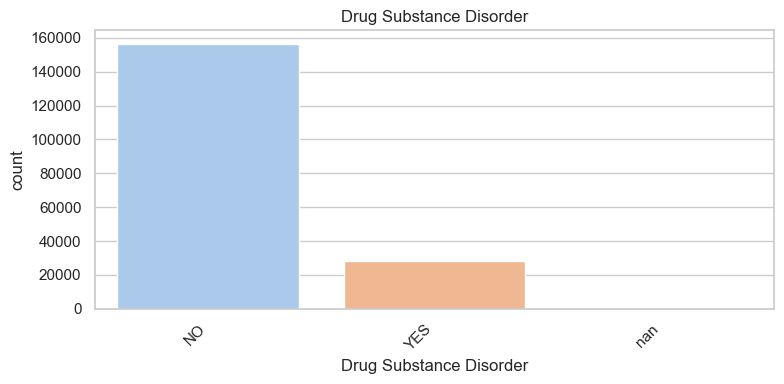


Opioid Related Disorder — Valeurs absolues
Opioid Related Disorder
NO     173235
NaN     15131
YES      7736
Name: count, dtype: int64

Opioid Related Disorder — Pourcentages
Opioid Related Disorder
NO     88.34
NaN     7.72
YES     3.94
Name: proportion, dtype: float64


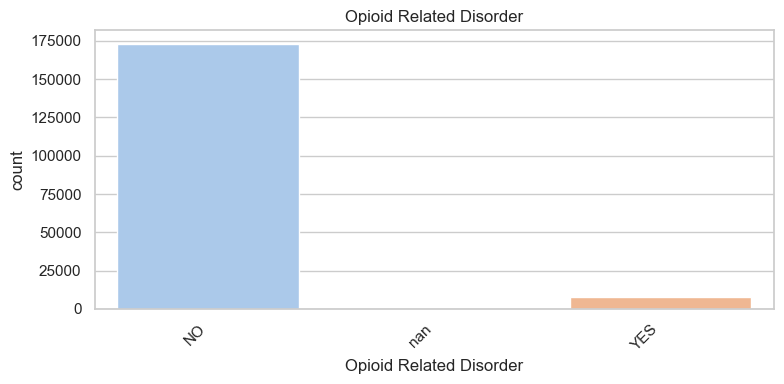


Mobility Impairment Disorder — Valeurs absolues
Mobility Impairment Disorder
NO     171129
NaN     15016
YES      9957
Name: count, dtype: int64

Mobility Impairment Disorder — Pourcentages
Mobility Impairment Disorder
NO     87.27
NaN     7.66
YES     5.08
Name: proportion, dtype: float64


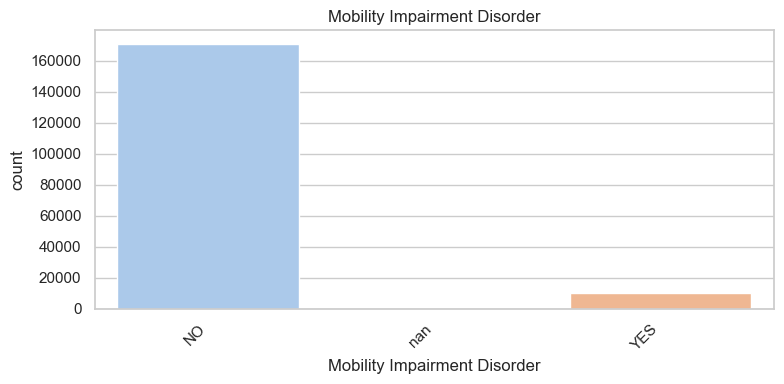


Hearing Impairment — Valeurs absolues
Hearing Impairment
NO     175632
NaN     15626
YES      4844
Name: count, dtype: int64

Hearing Impairment — Pourcentages
Hearing Impairment
NO     89.56
NaN     7.97
YES     2.47
Name: proportion, dtype: float64


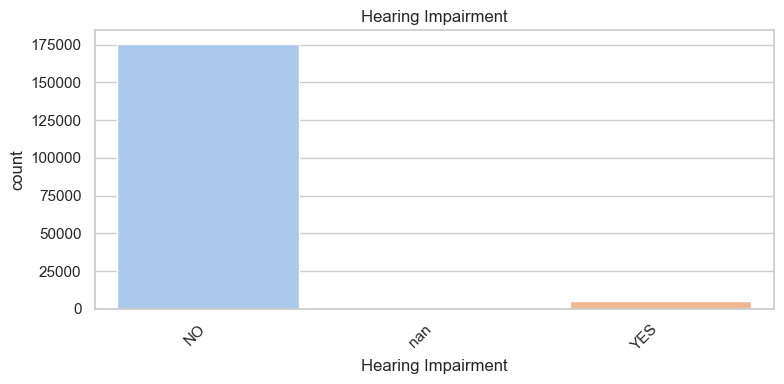


Visual Impairment — Valeurs absolues
Visual Impairment
NO     168056
NaN     15608
YES     12438
Name: count, dtype: int64

Visual Impairment — Pourcentages
Visual Impairment
NO     85.70
NaN     7.96
YES     6.34
Name: proportion, dtype: float64


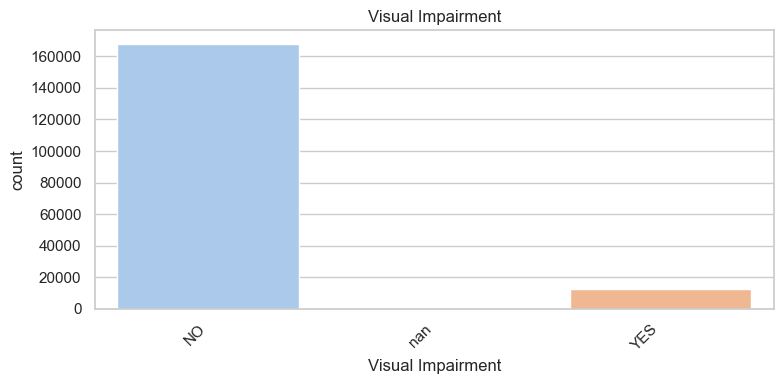


Speech Impairment — Valeurs absolues
Speech Impairment
NO     175971
NaN     15713
YES      4418
Name: count, dtype: int64

Speech Impairment — Pourcentages
Speech Impairment
NO     89.73
NaN     8.01
YES     2.25
Name: proportion, dtype: float64


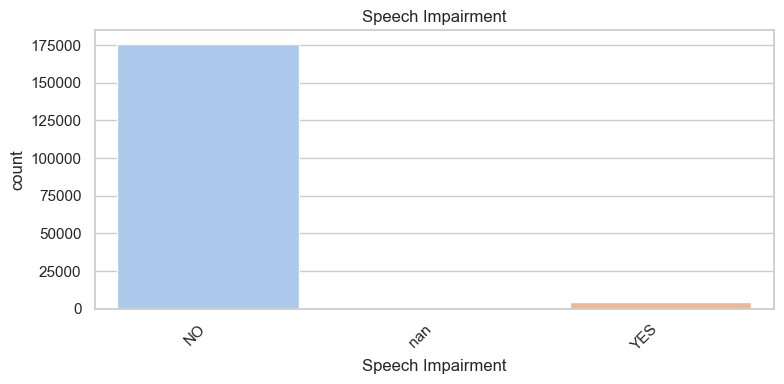


Hyperlipidemia — Valeurs absolues
Hyperlipidemia
NO     154444
YES     27282
NaN     14376
Name: count, dtype: int64

Hyperlipidemia — Pourcentages
Hyperlipidemia
NO     78.76
YES    13.91
NaN     7.33
Name: proportion, dtype: float64


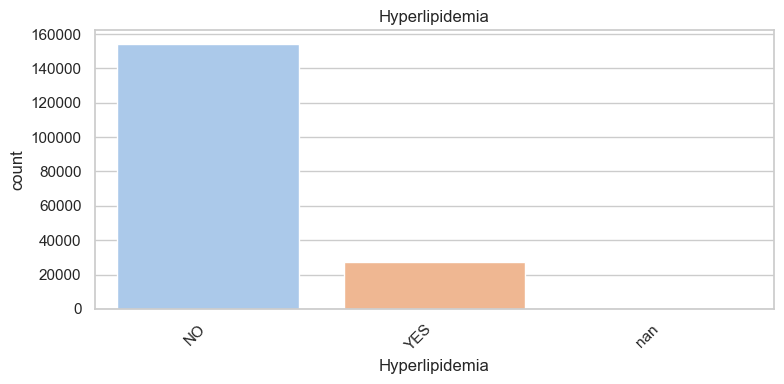


High Blood Pressure — Valeurs absolues
High Blood Pressure
NO     146025
YES     35701
NaN     14376
Name: count, dtype: int64

High Blood Pressure — Pourcentages
High Blood Pressure
NO     74.46
YES    18.21
NaN     7.33
Name: proportion, dtype: float64


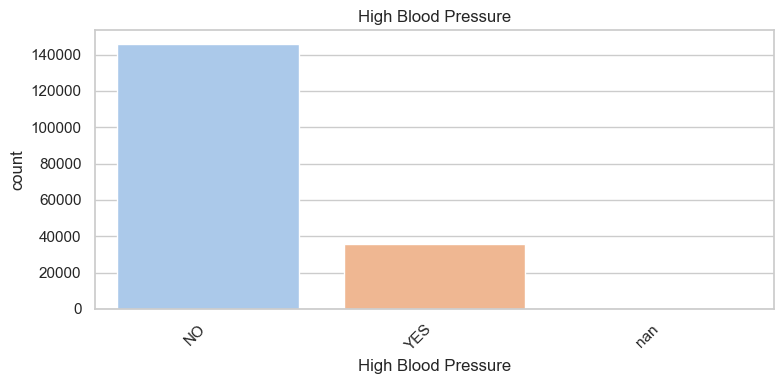


Diabetes — Valeurs absolues
Diabetes
NO     160161
YES     21565
NaN     14376
Name: count, dtype: int64

Diabetes — Pourcentages
Diabetes
NO     81.67
YES    11.00
NaN     7.33
Name: proportion, dtype: float64


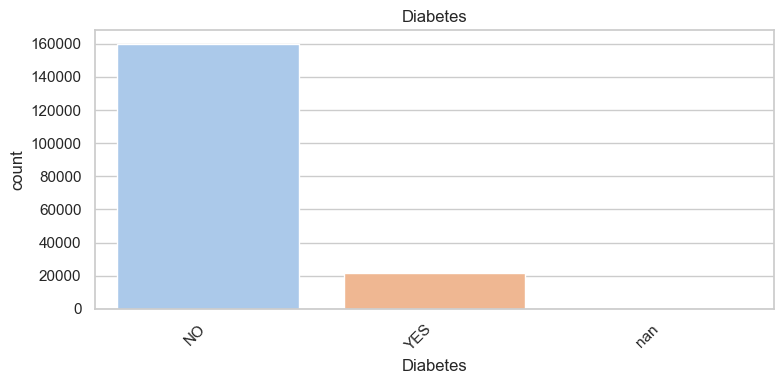


Obesity — Valeurs absolues
Obesity
NO     151886
YES     29840
NaN     14376
Name: count, dtype: int64

Obesity — Pourcentages
Obesity
NO     77.45
YES    15.22
NaN     7.33
Name: proportion, dtype: float64


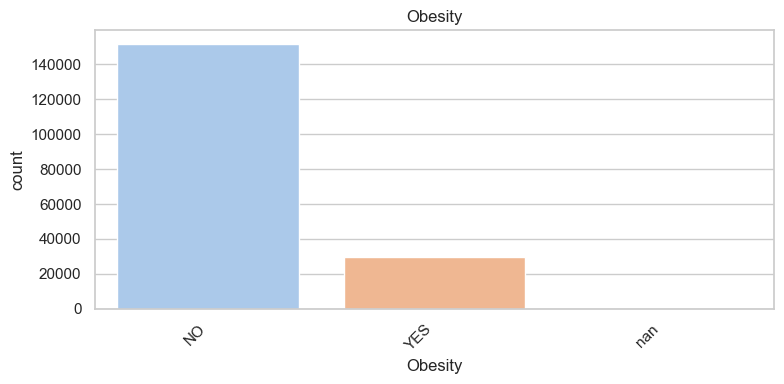


Heart Attack — Valeurs absolues
Heart Attack
NO     179115
NaN     14376
YES      2611
Name: count, dtype: int64

Heart Attack — Pourcentages
Heart Attack
NO     91.34
NaN     7.33
YES     1.33
Name: proportion, dtype: float64


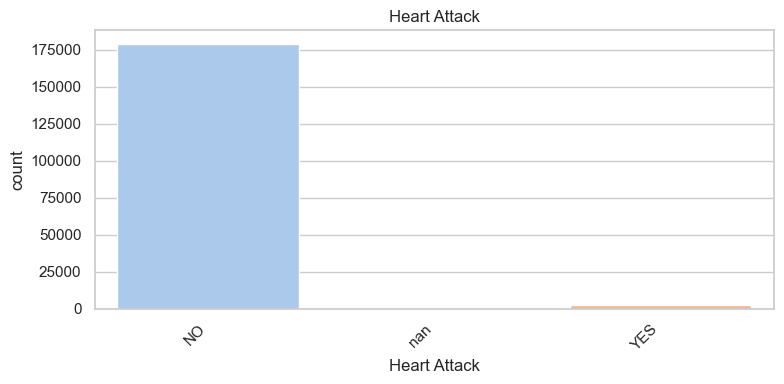


Stroke — Valeurs absolues
Stroke
NO     178812
NaN     14376
YES      2914
Name: count, dtype: int64

Stroke — Pourcentages
Stroke
NO     91.18
NaN     7.33
YES     1.49
Name: proportion, dtype: float64


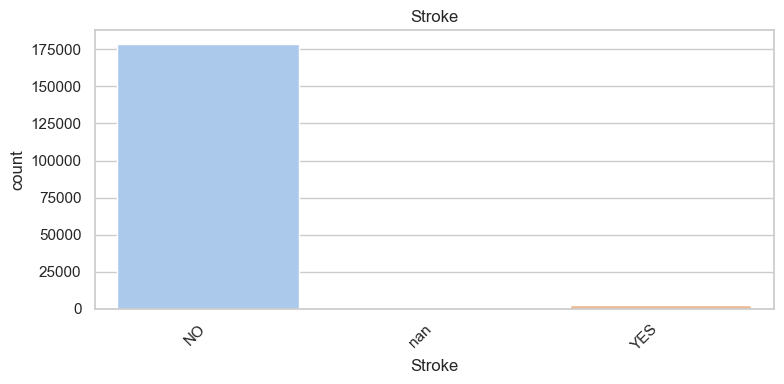


Other Cardiac — Valeurs absolues
Other Cardiac
NO     172600
NaN     14376
YES      9126
Name: count, dtype: int64

Other Cardiac — Pourcentages
Other Cardiac
NO     88.02
NaN     7.33
YES     4.65
Name: proportion, dtype: float64


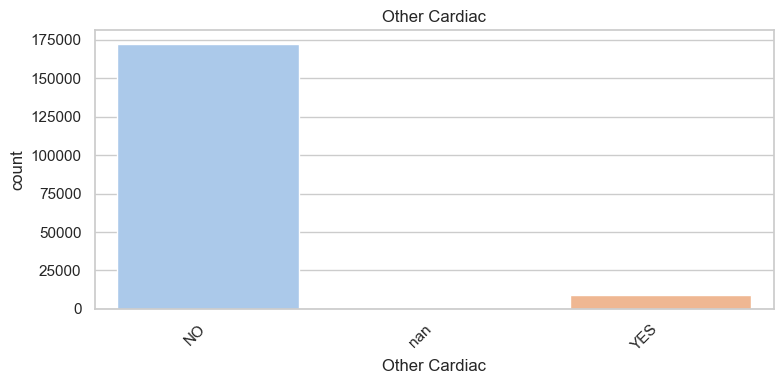


Pulmonary Asthma — Valeurs absolues
Pulmonary Asthma
NO     159022
YES     22704
NaN     14376
Name: count, dtype: int64

Pulmonary Asthma — Pourcentages
Pulmonary Asthma
NO     81.09
YES    11.58
NaN     7.33
Name: proportion, dtype: float64


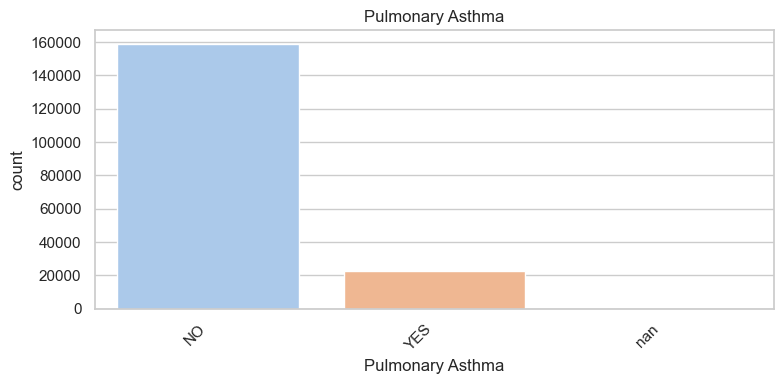


Alzheimer or Dementia — Valeurs absolues
Alzheimer or Dementia
NO     180134
NaN     14376
YES      1592
Name: count, dtype: int64

Alzheimer or Dementia — Pourcentages
Alzheimer or Dementia
NO     91.86
NaN     7.33
YES     0.81
Name: proportion, dtype: float64


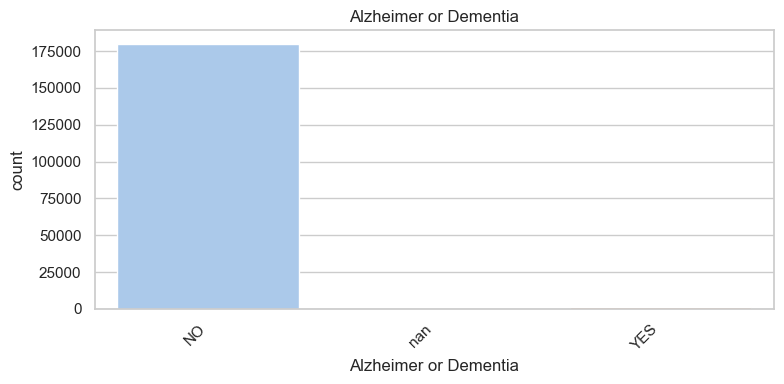


Kidney Disease — Valeurs absolues
Kidney Disease
NO     178461
NaN     14376
YES      3265
Name: count, dtype: int64

Kidney Disease — Pourcentages
Kidney Disease
NO     91.00
NaN     7.33
YES     1.66
Name: proportion, dtype: float64


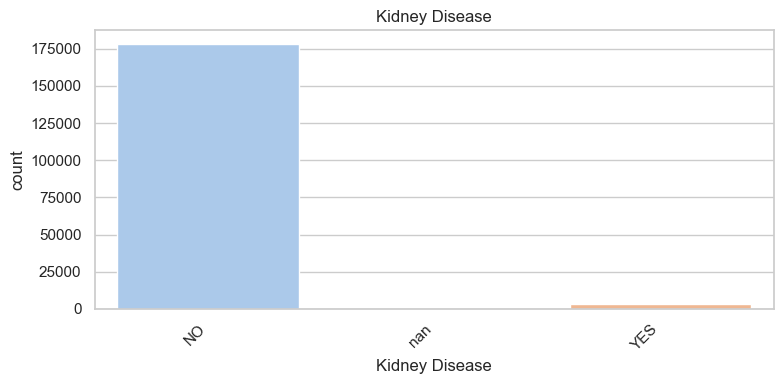


Liver Disease — Valeurs absolues
Liver Disease
NO     178010
NaN     14376
YES      3716
Name: count, dtype: int64

Liver Disease — Pourcentages
Liver Disease
NO     90.77
NaN     7.33
YES     1.89
Name: proportion, dtype: float64


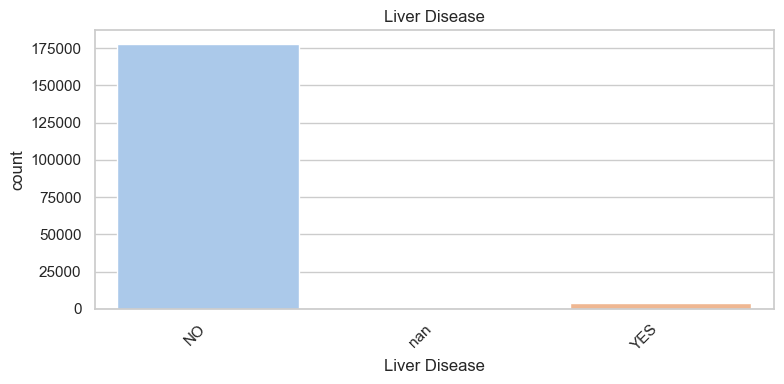


Endocrine Condition — Valeurs absolues
Endocrine Condition
NO     171606
NaN     14376
YES     10120
Name: count, dtype: int64

Endocrine Condition — Pourcentages
Endocrine Condition
NO     87.51
NaN     7.33
YES     5.16
Name: proportion, dtype: float64


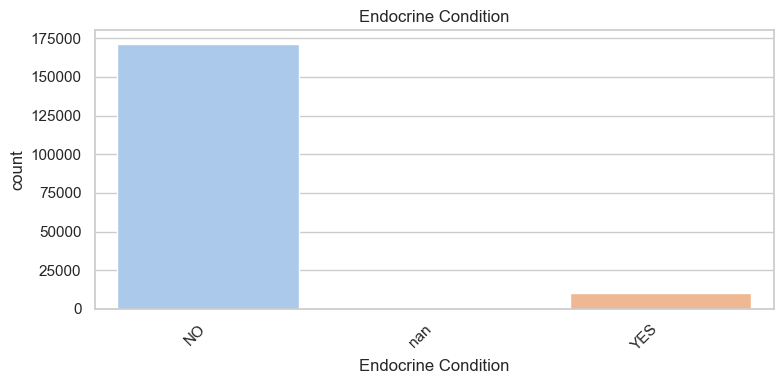


Neurological Condition — Valeurs absolues
Neurological Condition
NO     179071
NaN     14376
YES      2655
Name: count, dtype: int64

Neurological Condition — Pourcentages
Neurological Condition
NO     91.32
NaN     7.33
YES     1.35
Name: proportion, dtype: float64


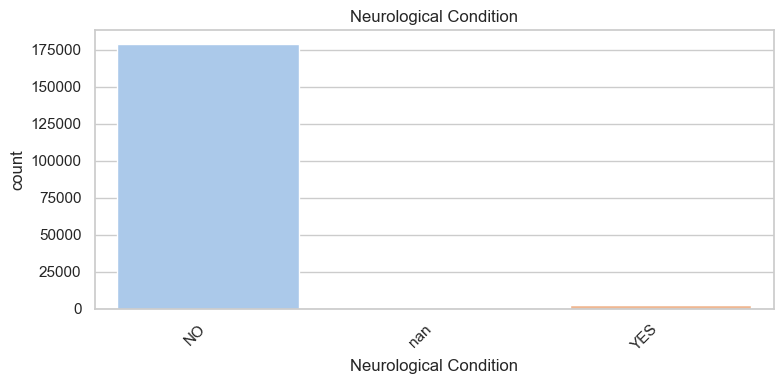


Traumatic Brain Injury — Valeurs absolues
Traumatic Brain Injury
NO     178302
NaN     14376
YES      3424
Name: count, dtype: int64

Traumatic Brain Injury — Pourcentages
Traumatic Brain Injury
NO     90.92
NaN     7.33
YES     1.75
Name: proportion, dtype: float64


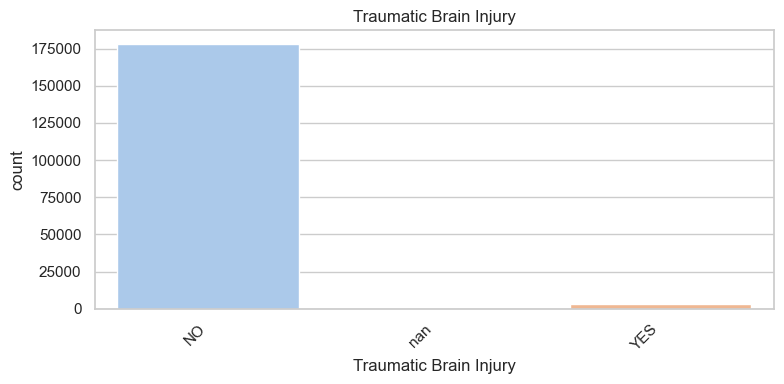


Joint Disease — Valeurs absolues
Joint Disease
NO     164532
YES     17194
NaN     14376
Name: count, dtype: int64

Joint Disease — Pourcentages
Joint Disease
NO     83.90
YES     8.77
NaN     7.33
Name: proportion, dtype: float64


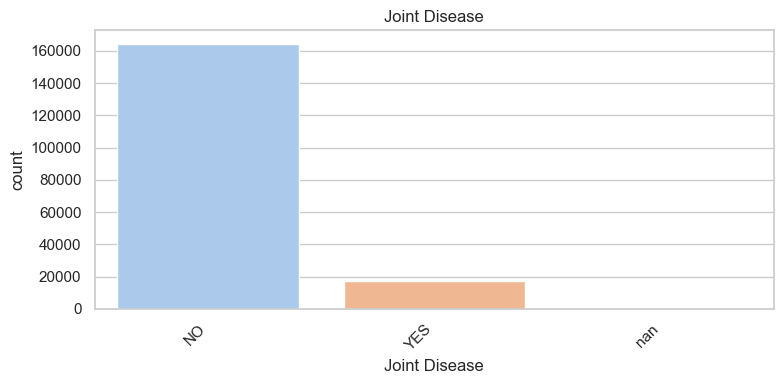


Cancer — Valeurs absolues
Cancer
NO     177489
NaN     14376
YES      4237
Name: count, dtype: int64

Cancer — Pourcentages
Cancer
NO     90.51
NaN     7.33
YES     2.16
Name: proportion, dtype: float64


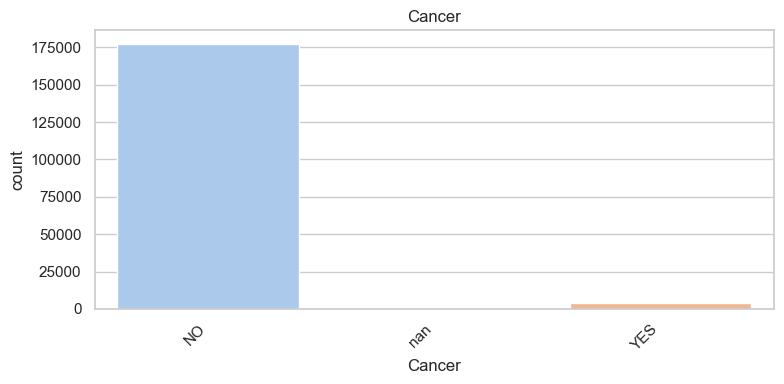


Other Chronic Med Condition — Valeurs absolues
Other Chronic Med Condition
NO     152400
YES     29326
NaN     14376
Name: count, dtype: int64

Other Chronic Med Condition — Pourcentages
Other Chronic Med Condition
NO     77.71
YES    14.95
NaN     7.33
Name: proportion, dtype: float64


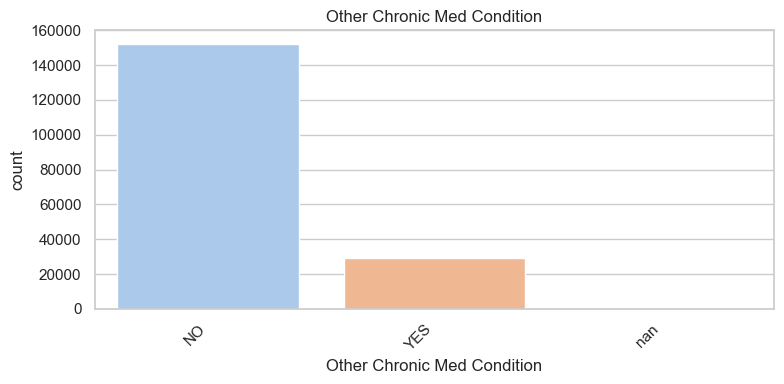


No Chronic Med Condition — Valeurs absolues
No Chronic Med Condition
NO     93000
YES    88726
NaN    14376
Name: count, dtype: int64

No Chronic Med Condition — Pourcentages
No Chronic Med Condition
NO     47.42
YES    45.24
NaN     7.33
Name: proportion, dtype: float64


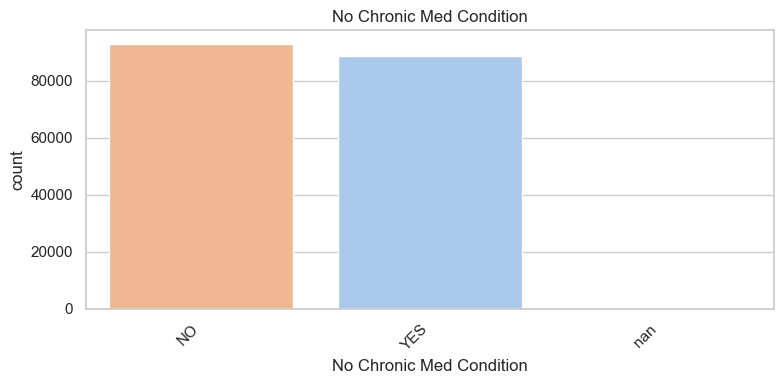


Cannabis Recreational Use — Valeurs absolues
Cannabis Recreational Use
NO     145808
YES     28692
NaN     21602
Name: count, dtype: int64

Cannabis Recreational Use — Pourcentages
Cannabis Recreational Use
NO     74.35
YES    14.63
NaN    11.02
Name: proportion, dtype: float64


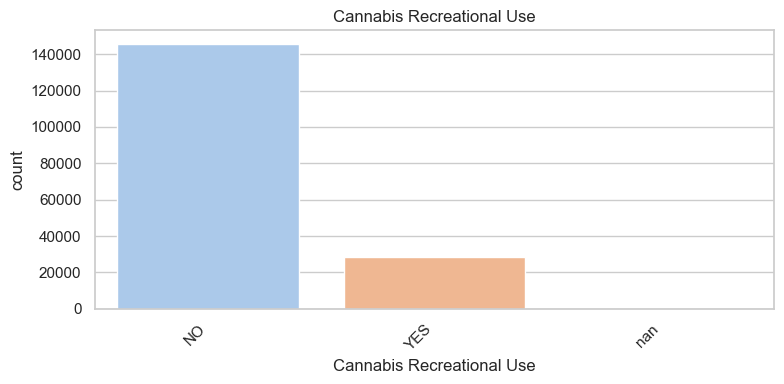


Cannabis Medicinal Use — Valeurs absolues
Cannabis Medicinal Use
NO     165863
NaN     24492
YES      5747
Name: count, dtype: int64

Cannabis Medicinal Use — Pourcentages
Cannabis Medicinal Use
NO     84.58
NaN    12.49
YES     2.93
Name: proportion, dtype: float64


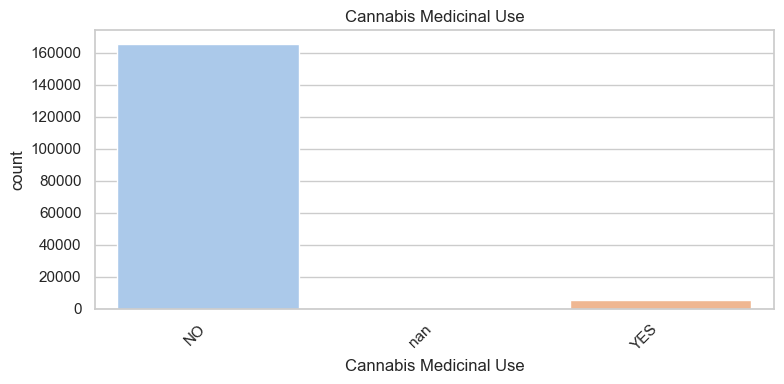


Smokes — Valeurs absolues
Smokes
NO     128247
YES     50276
NaN     17579
Name: count, dtype: int64

Smokes — Pourcentages
Smokes
NO     65.40
YES    25.64
NaN     8.96
Name: proportion, dtype: float64


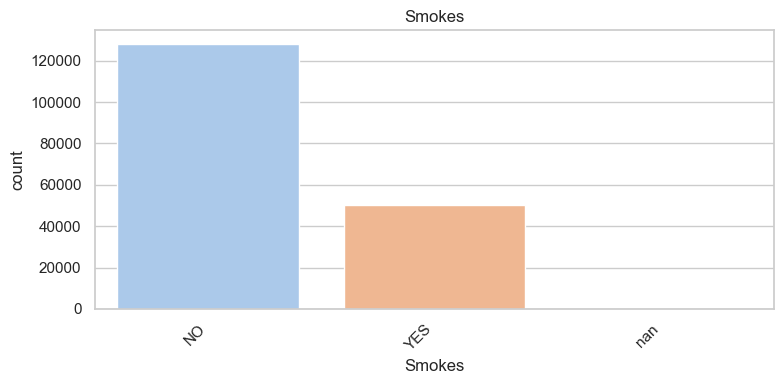


Received Smoking Medication — Valeurs absolues
Received Smoking Medication
NO     171725
NaN     17662
YES      6715
Name: count, dtype: int64

Received Smoking Medication — Pourcentages
Received Smoking Medication
NO     87.57
NaN     9.01
YES     3.42
Name: proportion, dtype: float64


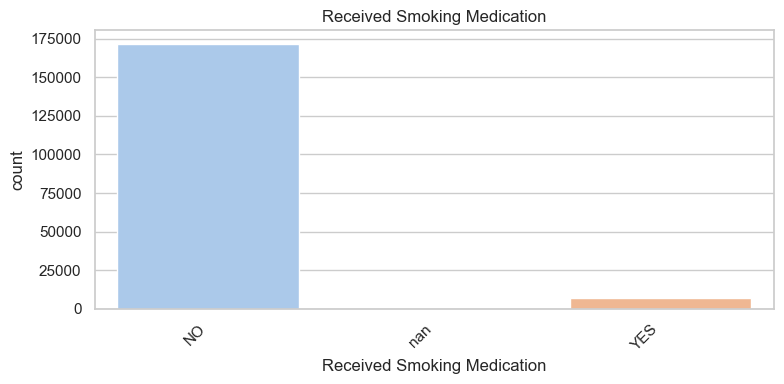


Received Smoking Counseling — Valeurs absolues
Received Smoking Counseling
NO     155860
YES     22738
NaN     17504
Name: count, dtype: int64

Received Smoking Counseling — Pourcentages
Received Smoking Counseling
NO     79.48
YES    11.59
NaN     8.93
Name: proportion, dtype: float64


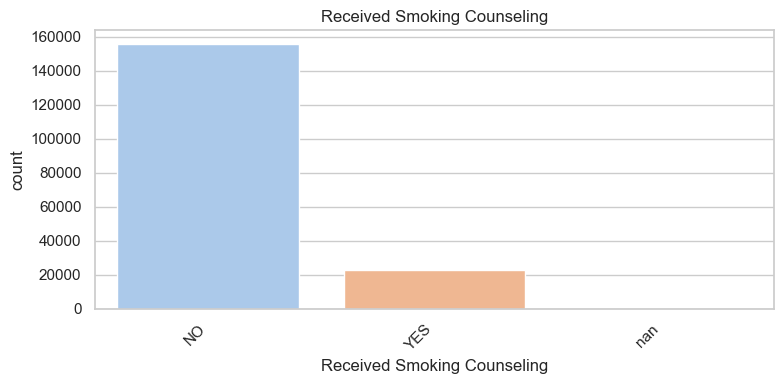


Serious Mental Illness — Valeurs absolues
Serious Mental Illness
YES    179758
NO      15123
NaN      1221
Name: count, dtype: int64

Serious Mental Illness — Pourcentages
Serious Mental Illness
YES    91.67
NO      7.71
NaN     0.62
Name: proportion, dtype: float64


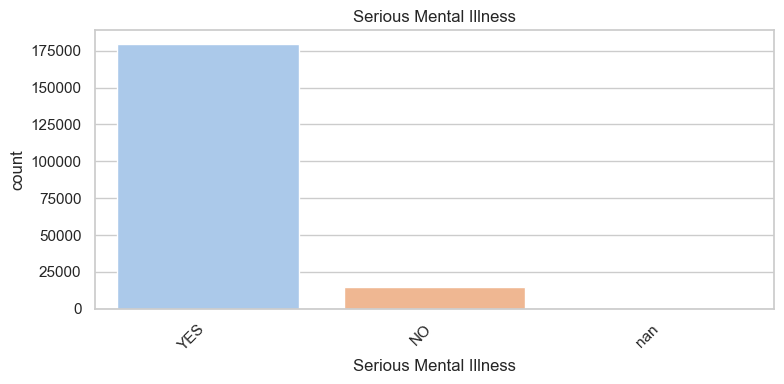


Alcohol 12m Service — Valeurs absolues
Alcohol 12m Service
NO     167248
NaN     16564
YES     12290
Name: count, dtype: int64

Alcohol 12m Service — Pourcentages
Alcohol 12m Service
NO     85.29
NaN     8.45
YES     6.27
Name: proportion, dtype: float64


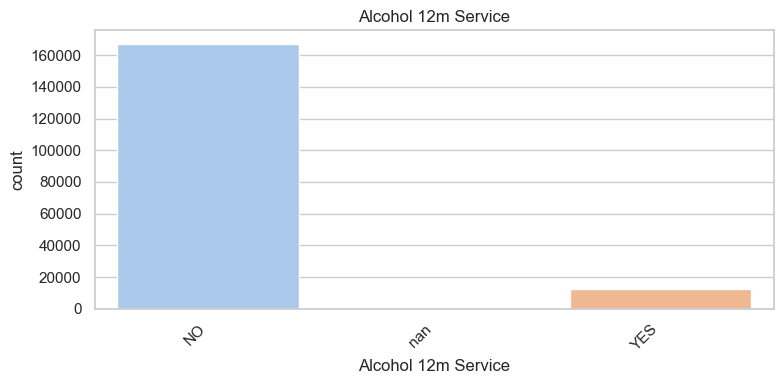


Opioid 12m Service — Valeurs absolues
Opioid 12m Service
NO     173330
NaN     16365
YES      6407
Name: count, dtype: int64

Opioid 12m Service — Pourcentages
Opioid 12m Service
NO     88.39
NaN     8.35
YES     3.27
Name: proportion, dtype: float64


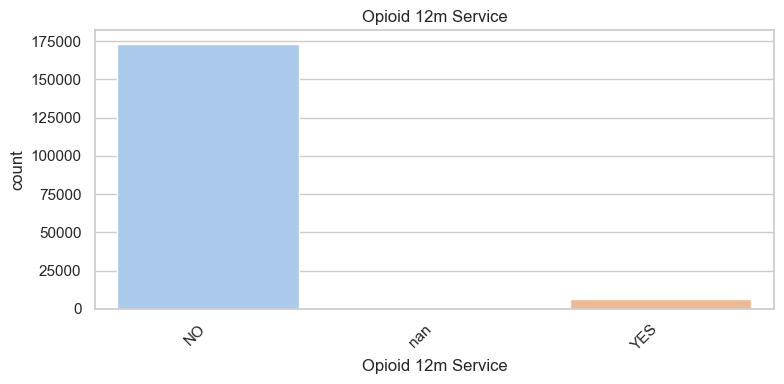


Drug/Substance 12m Service — Valeurs absolues
Drug/Substance 12m Service
NO     165147
NaN     16917
YES     14038
Name: count, dtype: int64

Drug/Substance 12m Service — Pourcentages
Drug/Substance 12m Service
NO     84.21
NaN     8.63
YES     7.16
Name: proportion, dtype: float64


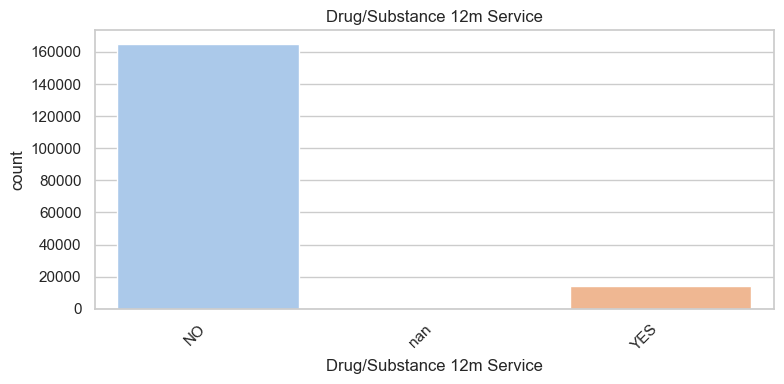


Principal Diagnosis Class — Valeurs absolues
Principal Diagnosis Class
MENTAL ILLNESS                               178002
NaN                                            7908
NOT MI - ORGANIC MENTAL DISORDER               3586
SUBSTANCE-RELATED AND ADDICTIVE DISORDERS      3470
NOT MI - OTHER                                 1633
NOT MI - DEVELOPMENTAL DISORDERS               1503
Name: count, dtype: int64

Principal Diagnosis Class — Pourcentages
Principal Diagnosis Class
MENTAL ILLNESS                               90.77
NaN                                           4.03
NOT MI - ORGANIC MENTAL DISORDER              1.83
SUBSTANCE-RELATED AND ADDICTIVE DISORDERS     1.77
NOT MI - OTHER                                0.83
NOT MI - DEVELOPMENTAL DISORDERS              0.77
Name: proportion, dtype: float64


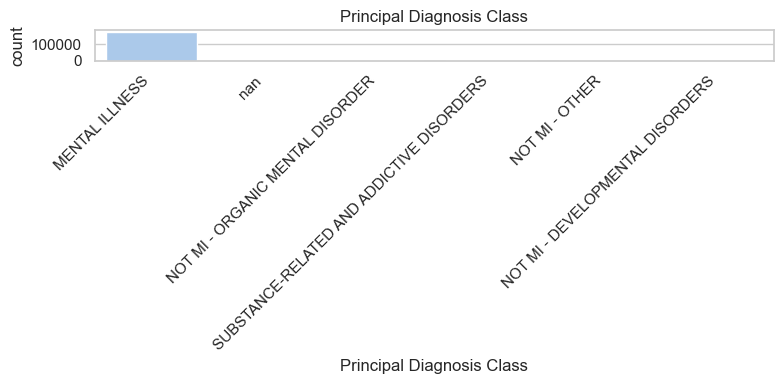


Additional Diagnosis Class — Valeurs absolues
Additional Diagnosis Class
MENTAL ILLNESS                               67975
NO ADDITIONAL DIAGNOSIS                      60084
NaN                                          37666
SUBSTANCE-RELATED AND ADDICTIVE DISORDERS    17295
NOT MI - OTHER                                6598
NOT MI - DEVELOPMENTAL DISORDERS              4108
NOT MI - ORGANIC MENTAL DISORDER              2376
Name: count, dtype: int64

Additional Diagnosis Class — Pourcentages
Additional Diagnosis Class
MENTAL ILLNESS                               34.66
NO ADDITIONAL DIAGNOSIS                      30.64
NaN                                          19.21
SUBSTANCE-RELATED AND ADDICTIVE DISORDERS     8.82
NOT MI - OTHER                                3.36
NOT MI - DEVELOPMENTAL DISORDERS              2.09
NOT MI - ORGANIC MENTAL DISORDER              1.21
Name: proportion, dtype: float64


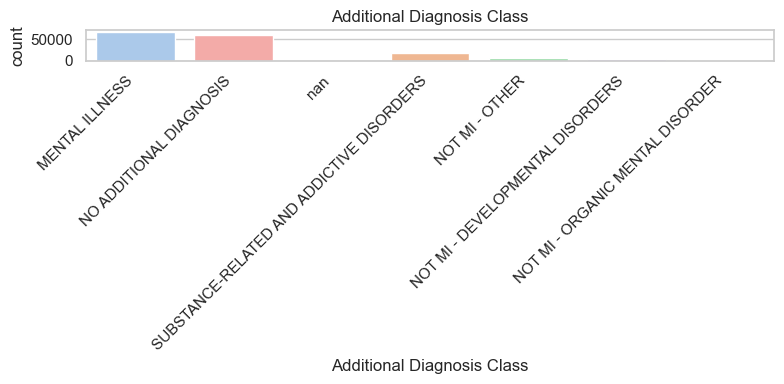


SSI Cash Assistance — Valeurs absolues
SSI Cash Assistance
NO     113888
YES     55442
NaN     26772
Name: count, dtype: int64

SSI Cash Assistance — Pourcentages
SSI Cash Assistance
NO     58.08
YES    28.27
NaN    13.65
Name: proportion, dtype: float64


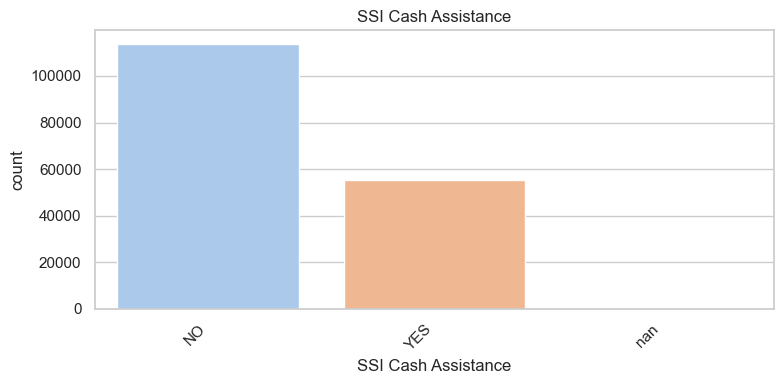


SSDI Cash Assistance — Valeurs absolues
SSDI Cash Assistance
NO     136201
YES     32466
NaN     27435
Name: count, dtype: int64

SSDI Cash Assistance — Pourcentages
SSDI Cash Assistance
NO     69.45
YES    16.56
NaN    13.99
Name: proportion, dtype: float64


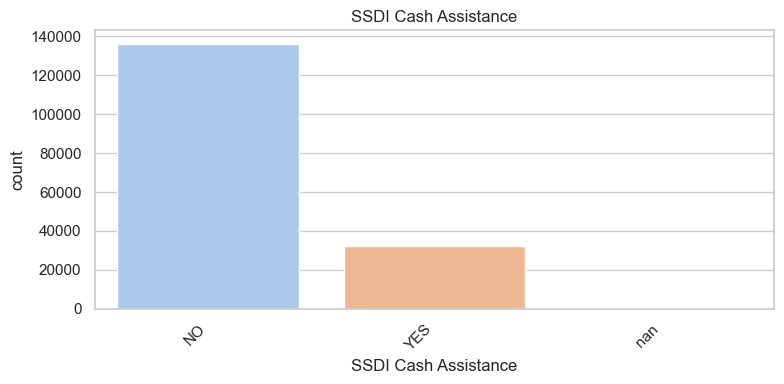


Veterans Disability Benefits — Valeurs absolues
Veterans Disability Benefits
NO     173188
NaN     22008
YES       906
Name: count, dtype: int64

Veterans Disability Benefits — Pourcentages
Veterans Disability Benefits
NO     88.32
NaN    11.22
YES     0.46
Name: proportion, dtype: float64


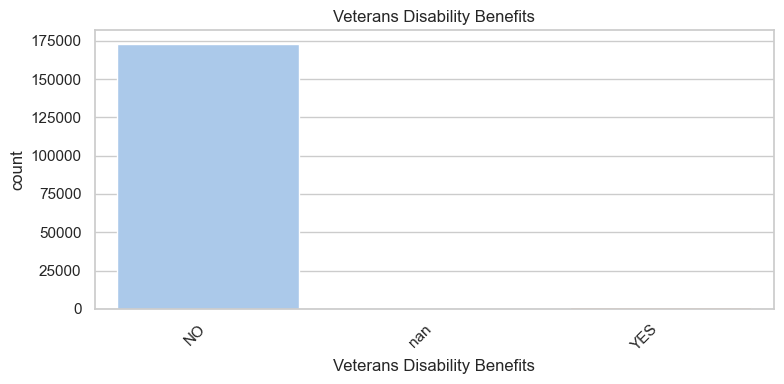


Veterans Cash Assistance — Valeurs absolues
Veterans Cash Assistance
NO     173756
NaN     21915
YES       431
Name: count, dtype: int64

Veterans Cash Assistance — Pourcentages
Veterans Cash Assistance
NO     88.60
NaN    11.18
YES     0.22
Name: proportion, dtype: float64


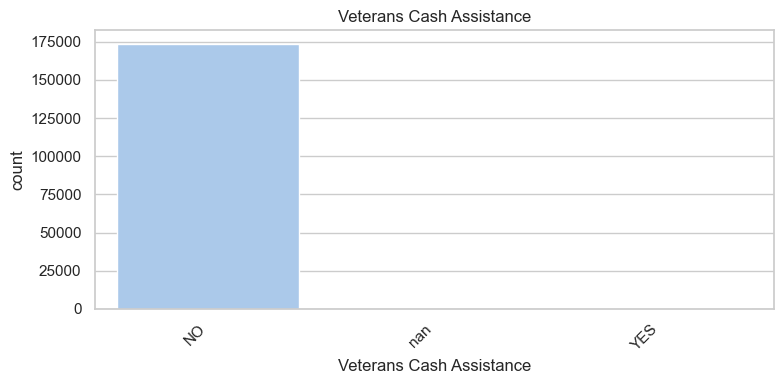


Public Assistance Cash Program — Valeurs absolues
Public Assistance Cash Program
NO     137341
YES     29703
NaN     29058
Name: count, dtype: int64

Public Assistance Cash Program — Pourcentages
Public Assistance Cash Program
NO     70.04
YES    15.15
NaN    14.82
Name: proportion, dtype: float64


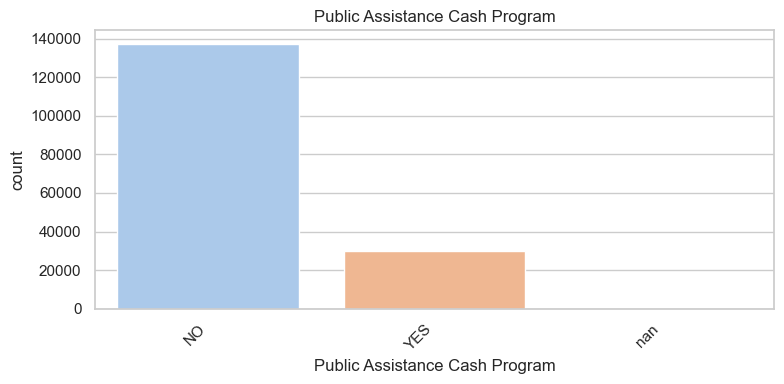


Other Cash Benefits — Valeurs absolues
Other Cash Benefits
NO     146212
NaN     27313
YES     22577
Name: count, dtype: int64

Other Cash Benefits — Pourcentages
Other Cash Benefits
NO     74.56
NaN    13.93
YES    11.51
Name: proportion, dtype: float64


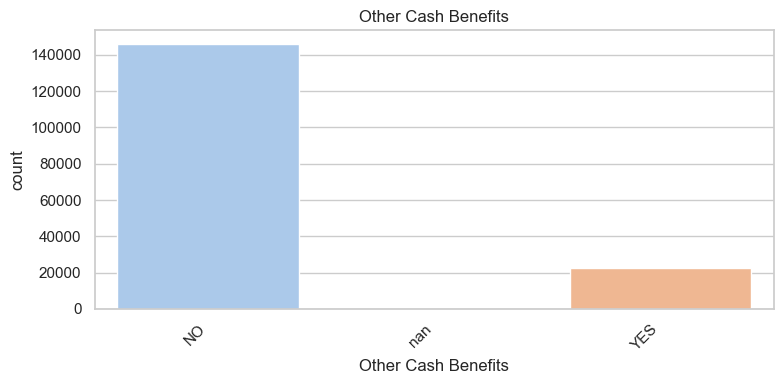


Medicaid and Medicare Insurance — Valeurs absolues
Medicaid and Medicare Insurance
NO     153695
YES     29072
NaN     13335
Name: count, dtype: int64

Medicaid and Medicare Insurance — Pourcentages
Medicaid and Medicare Insurance
NO     78.38
YES    14.82
NaN     6.80
Name: proportion, dtype: float64


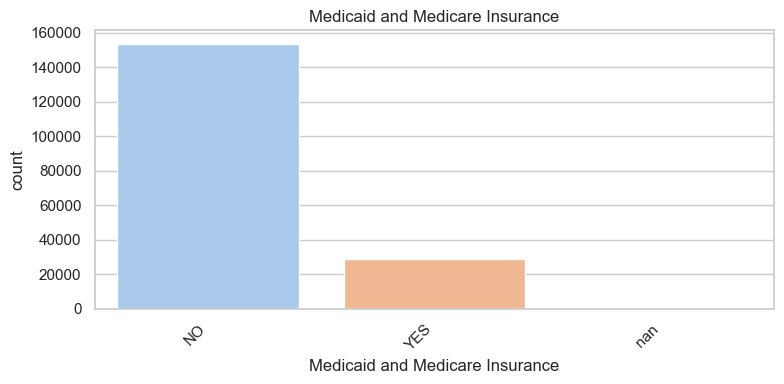


No Insurance — Valeurs absolues
No Insurance
NO     180118
YES     11046
NaN      4938
Name: count, dtype: int64

No Insurance — Pourcentages
No Insurance
NO     91.85
YES     5.63
NaN     2.52
Name: proportion, dtype: float64


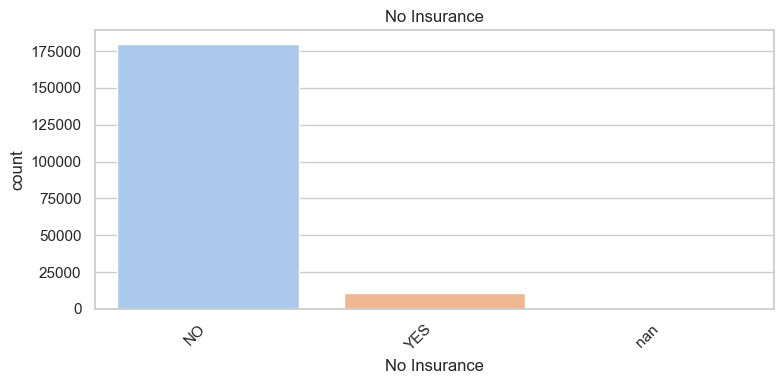


Medicaid Insurance — Valeurs absolues
Medicaid Insurance
YES    138806
NO      49606
NaN      7690
Name: count, dtype: int64

Medicaid Insurance — Pourcentages
Medicaid Insurance
YES    70.78
NO     25.30
NaN     3.92
Name: proportion, dtype: float64


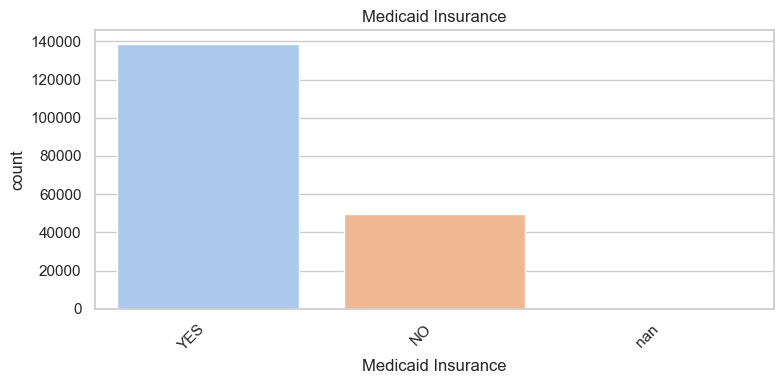


Medicaid Managed Insurance — Valeurs absolues
Medicaid Managed Insurance
YES               83196
NOT APPLICABLE    57296
NO                34550
NaN               21060
Name: count, dtype: int64

Medicaid Managed Insurance — Pourcentages
Medicaid Managed Insurance
YES               42.42
NOT APPLICABLE    29.22
NO                17.62
NaN               10.74
Name: proportion, dtype: float64


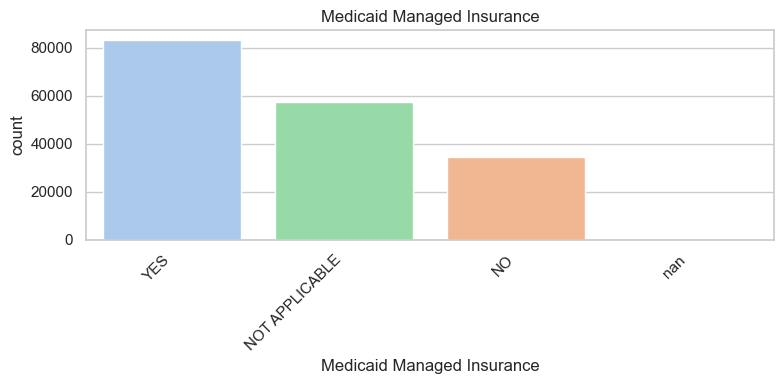


Medicare Insurance — Valeurs absolues
Medicare Insurance
NO     143239
YES     39939
NaN     12924
Name: count, dtype: int64

Medicare Insurance — Pourcentages
Medicare Insurance
NO     73.04
YES    20.37
NaN     6.59
Name: proportion, dtype: float64


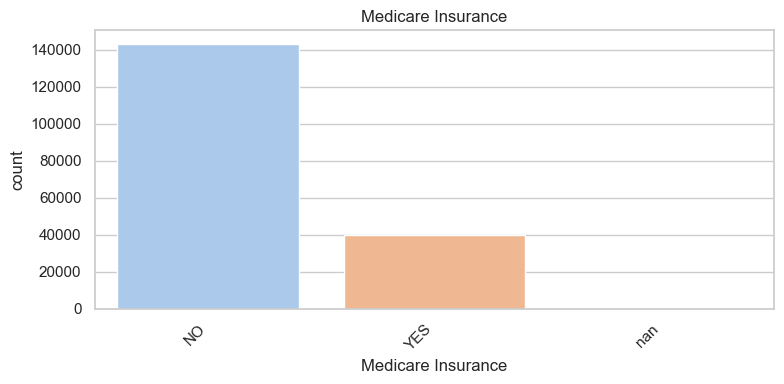


Private Insurance — Valeurs absolues
Private Insurance
NO     151323
YES     30477
NaN     14302
Name: count, dtype: int64

Private Insurance — Pourcentages
Private Insurance
NO     77.17
YES    15.54
NaN     7.29
Name: proportion, dtype: float64


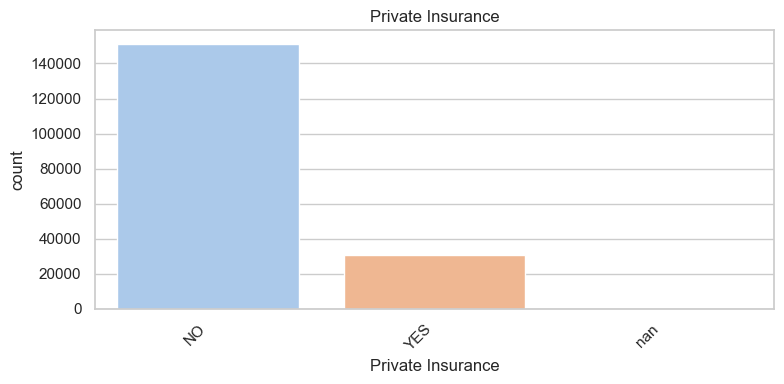


Child Health Plus Insurance — Valeurs absolues
Child Health Plus Insurance
NO     175808
NaN     17187
YES      3107
Name: count, dtype: int64

Child Health Plus Insurance — Pourcentages
Child Health Plus Insurance
NO     89.65
NaN     8.76
YES     1.58
Name: proportion, dtype: float64


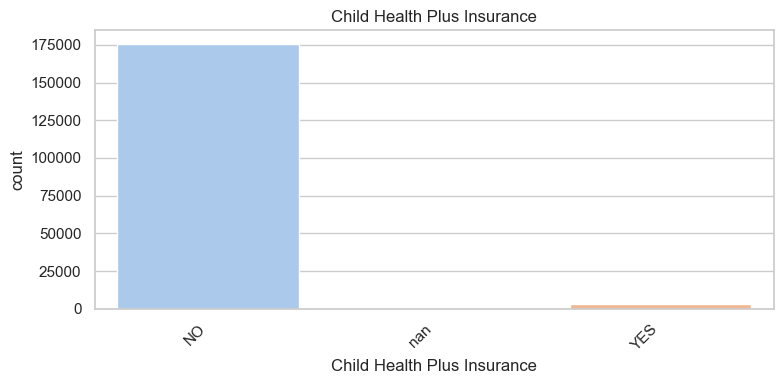


Other Insurance — Valeurs absolues
Other Insurance
NO     167138
NaN     15212
YES     13752
Name: count, dtype: int64

Other Insurance — Pourcentages
Other Insurance
NO     85.23
NaN     7.76
YES     7.01
Name: proportion, dtype: float64


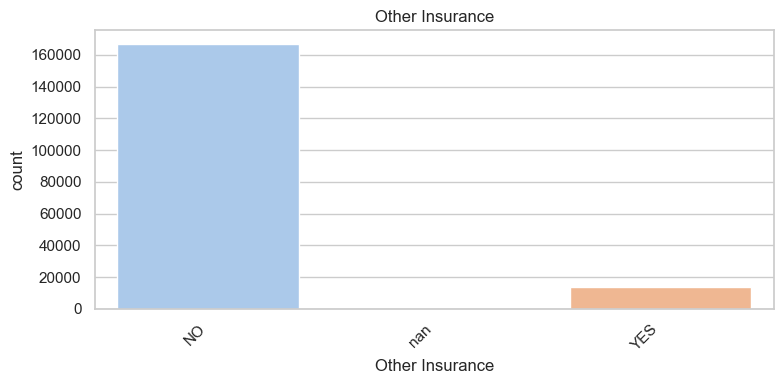


Criminal Justice Status — Valeurs absolues
Criminal Justice Status
NO     161589
NaN     17742
YES     16771
Name: count, dtype: int64

Criminal Justice Status — Pourcentages
Criminal Justice Status
NO     82.40
NaN     9.05
YES     8.55
Name: proportion, dtype: float64


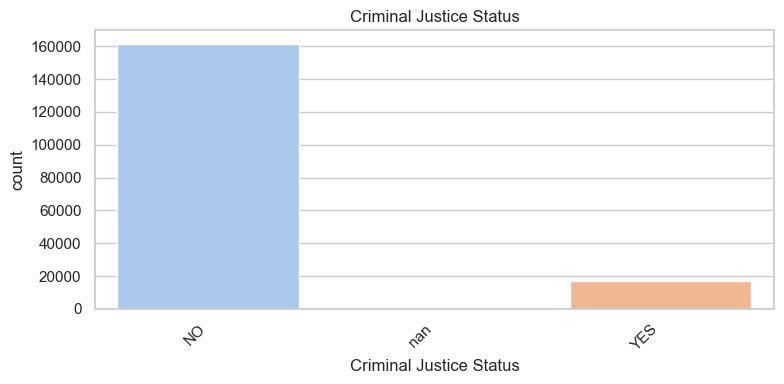

In [411]:
def afficher_distribution(colonnes, titre_bloc=None):
    """Affiche les valeurs absolues, les pourcentages et un graphique"""

    if titre_bloc:
        print("\n" + titre_bloc)
        print("-" * len(titre_bloc))

    for col in colonnes:
        print(f"\n{col} — Valeurs absolues")
        print(df[col].value_counts(dropna=False))

        print(f"\n{col} — Pourcentages")
        print(round(df[col].value_counts(normalize=True, dropna=False) * 100, 2))

        # Graphique
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts(dropna=False).index, hue=col, palette="pastel", legend=False)
        plt.title(col)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Liste des colonnes qu'on veut visualiser
colonnes_objet = df.select_dtypes(include='object').columns

# Appel de la fonction
afficher_distribution(colonnes_objet, "Distributions après imputation")

Creation of thematic sets:

In [413]:
#ensemble socio-demographique
socio_cols = [
    'Age Group', 'Sex', 'Transgender', 'Sexual Orientation',
    'Hispanic Ethnicity', 'Race', 'Preferred Language',
    'Religious Preference', 'Region Served'
    ]

In [414]:
#ensemble travail/etude
stuwork_cols = [ 'Education Status', 'Special Education Services',
    'Employment Status', 'Number Of Hours Worked Each Week' ]


In [415]:
#Ensemble troubles neuro
neurodev_cols =['Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Neurological Condition',
    'Speech Impairment', 'Hearing Impairment', 'Visual Impairment',
    'Mobility Impairment Disorder', 'Traumatic Brain Injury']

In [416]:
#ensemble addictions
addiction_cols =['Alcohol Related Disorder', 'Drug Substance Disorder',
    'Opioid Related Disorder' ,'Cannabis Medicinal Use', 'Smokes']

In [417]:
#ensemble pathologie
chronic_disease_cols = [
    'Obesity', 'Diabetes', 'Cancer'
]

In [418]:
#statut judiciaire
justice_cols = ['Criminal Justice Status']

In [419]:
#Ensemble sociodémographique

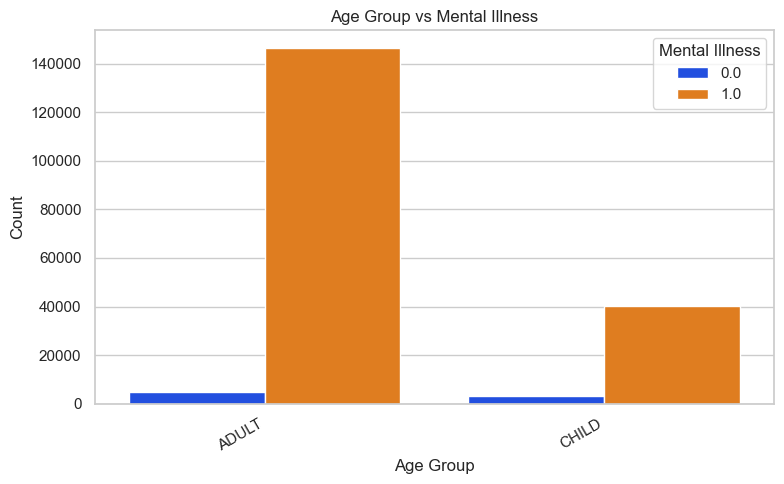

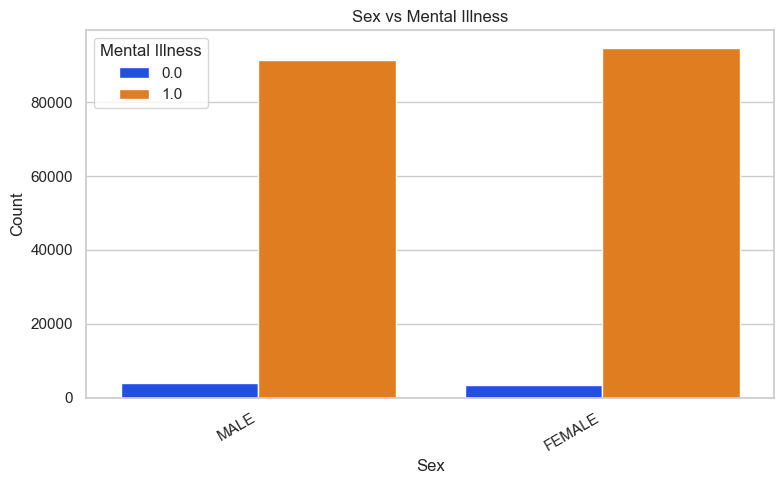

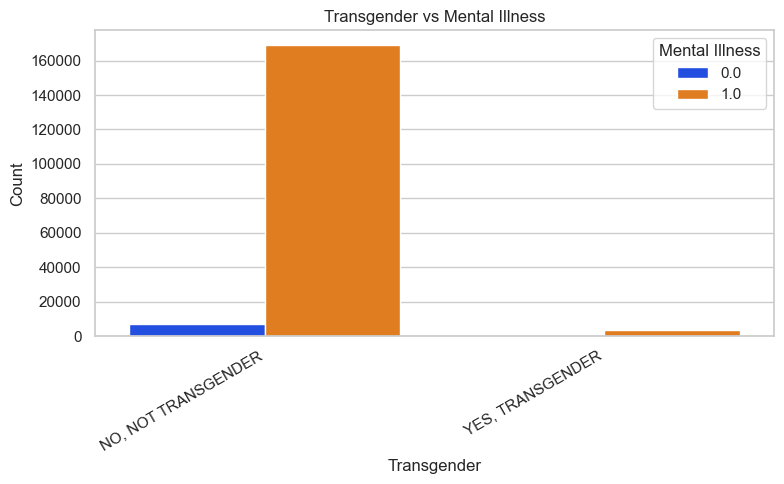

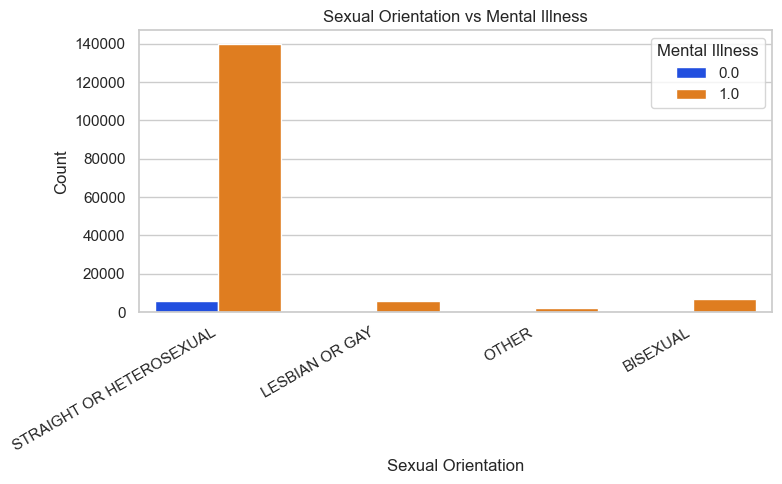

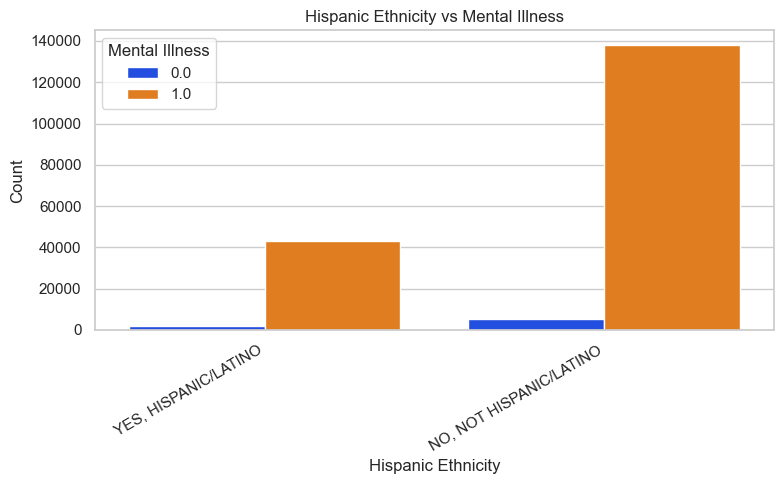

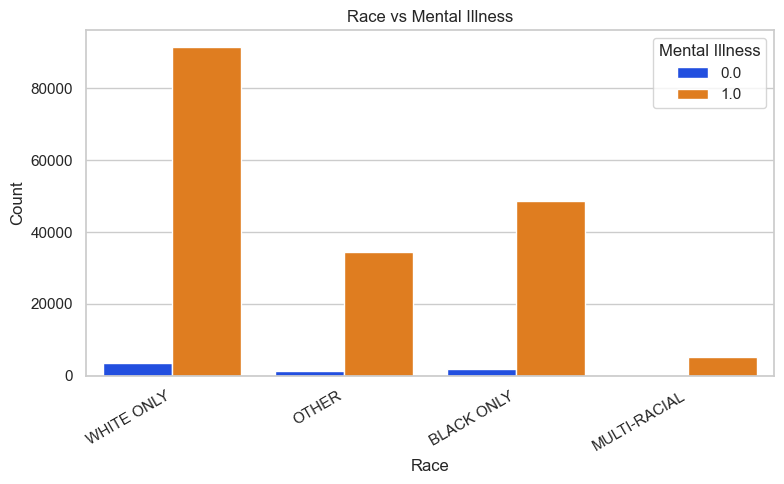

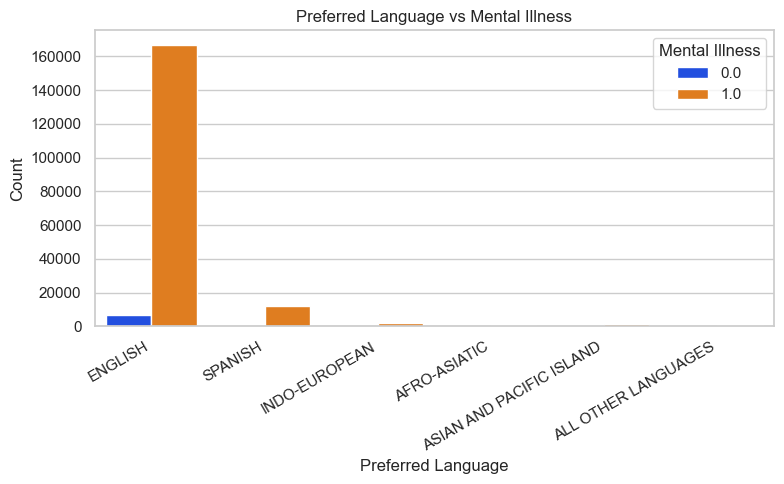

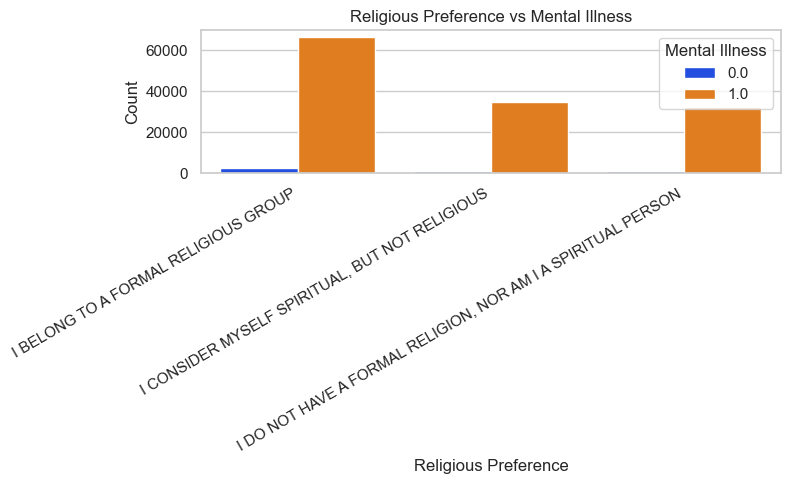

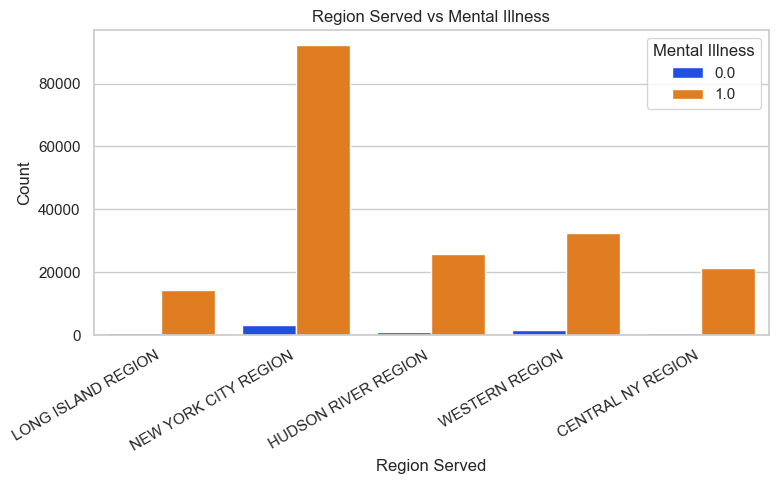

In [420]:
for col in socio_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Mental Illness', data=df, palette='bright')
    plt.title(f'{col} vs Mental Illness')
    plt.xticks(rotation=30, ha='right')  # éviter l'écrasement du texte
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Mental Illness')
    plt.tight_layout()
    plt.show()

In [421]:
#Ensemble Situation (etude/travail)

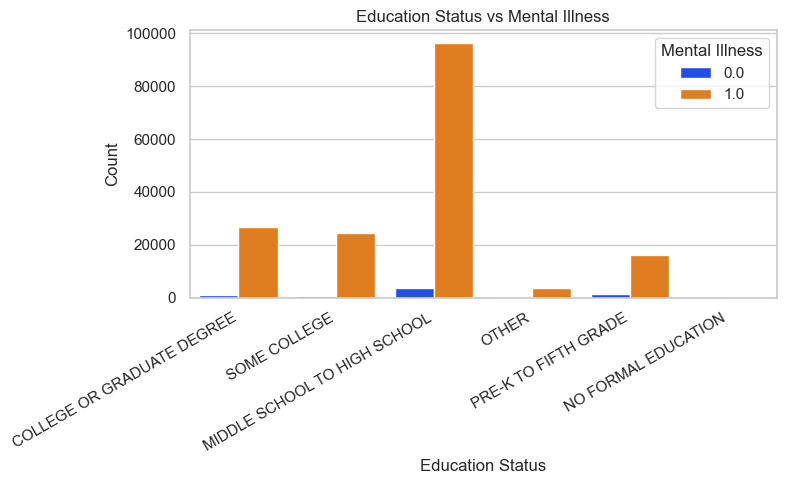

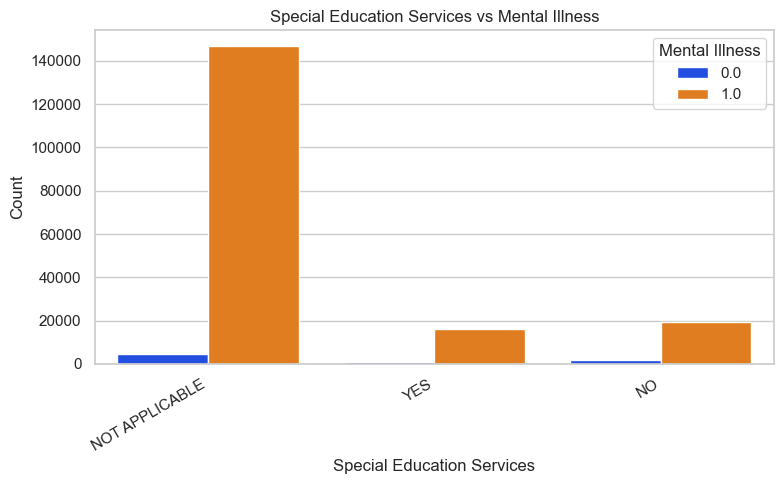

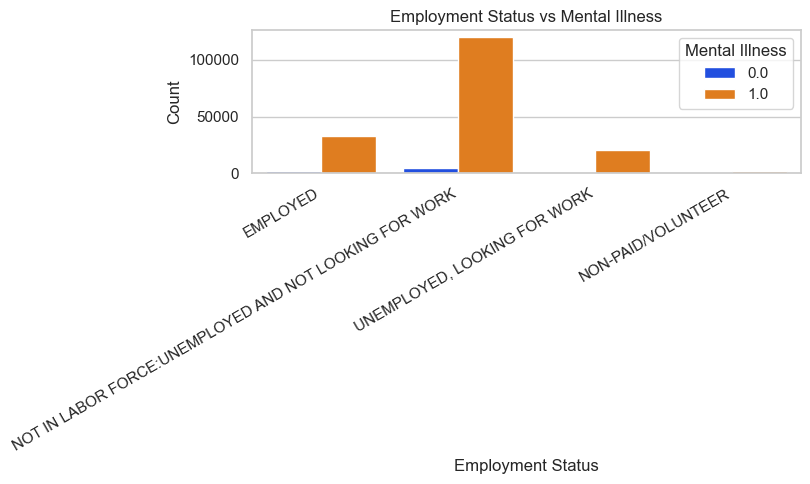

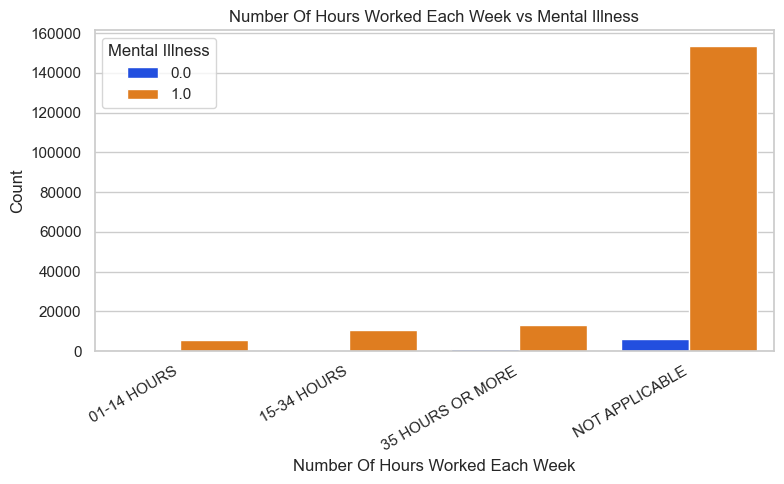

In [422]:
for col in stuwork_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Mental Illness', data=df, palette='bright')
    plt.title(f'{col} vs Mental Illness')
    plt.xticks(rotation=30, ha='right')  # éviter l'écrasement du texte
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Mental Illness')
    plt.tight_layout()
    plt.show()

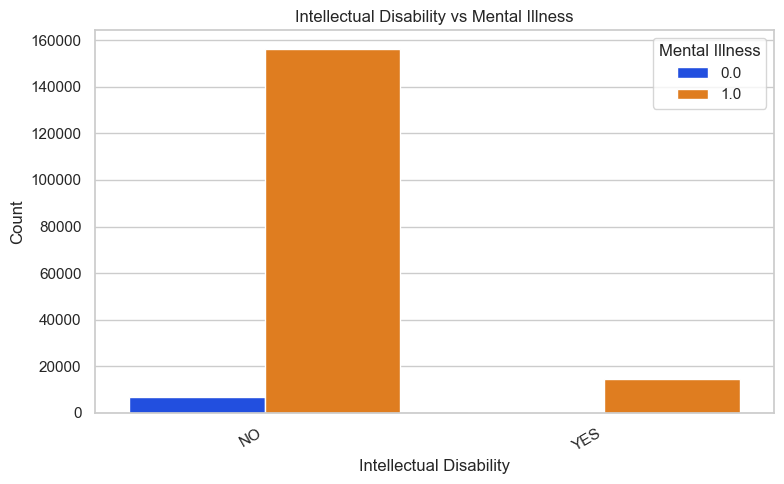

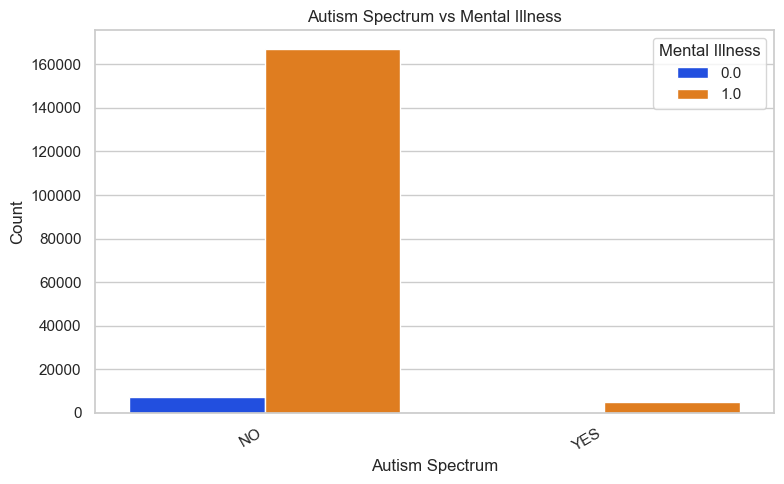

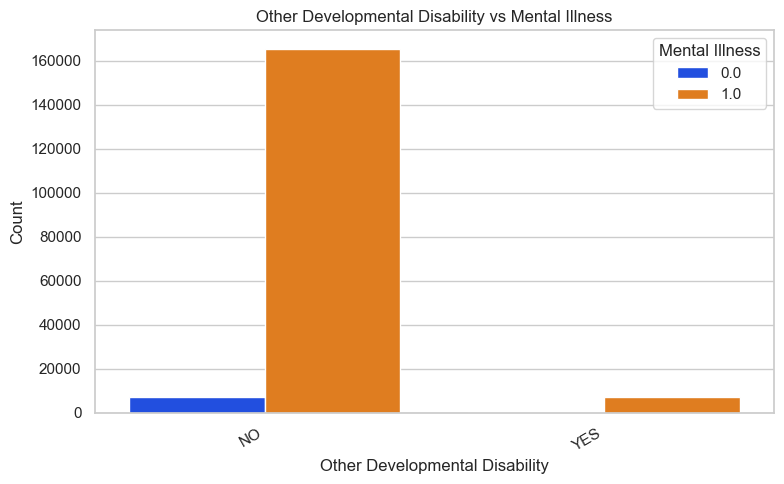

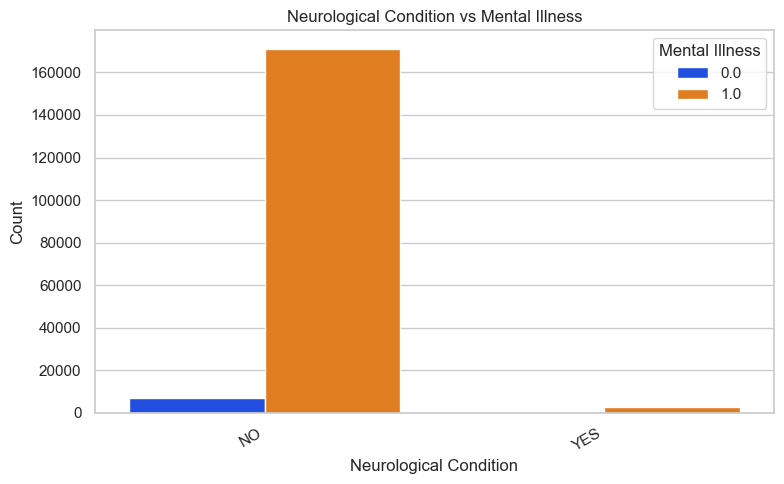

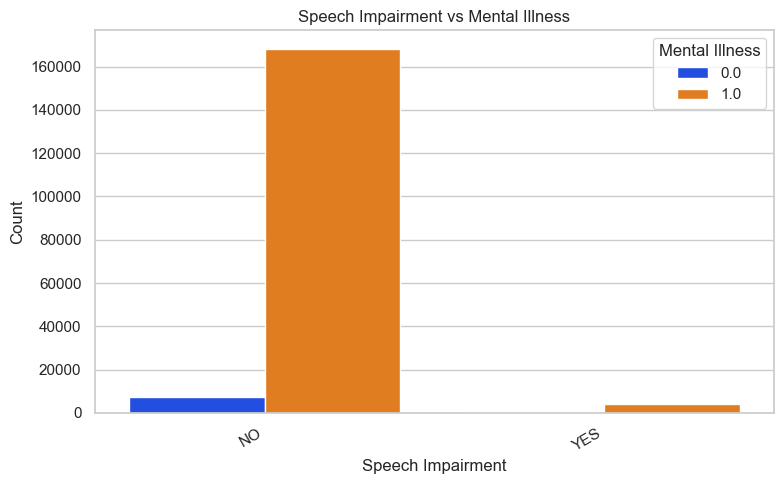

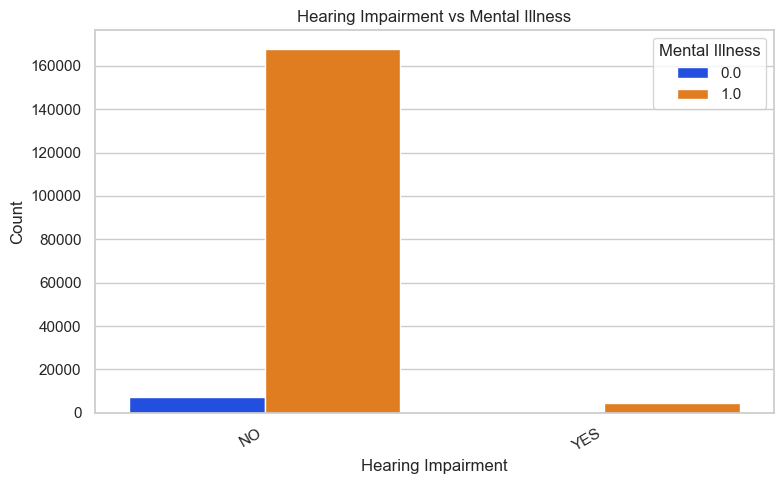

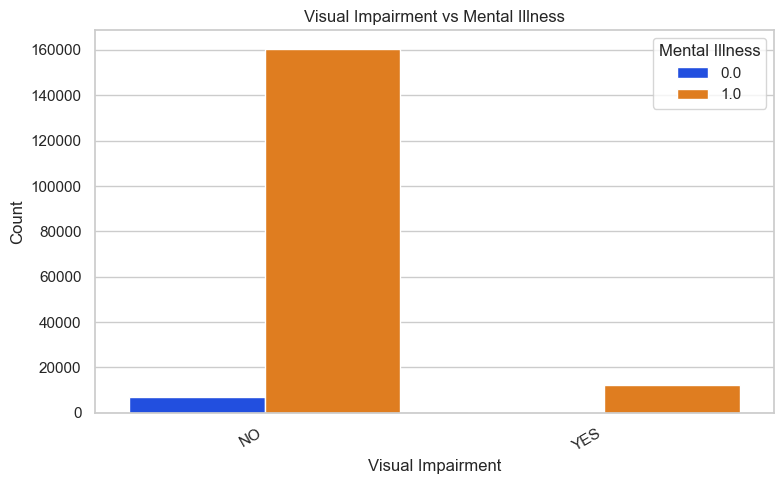

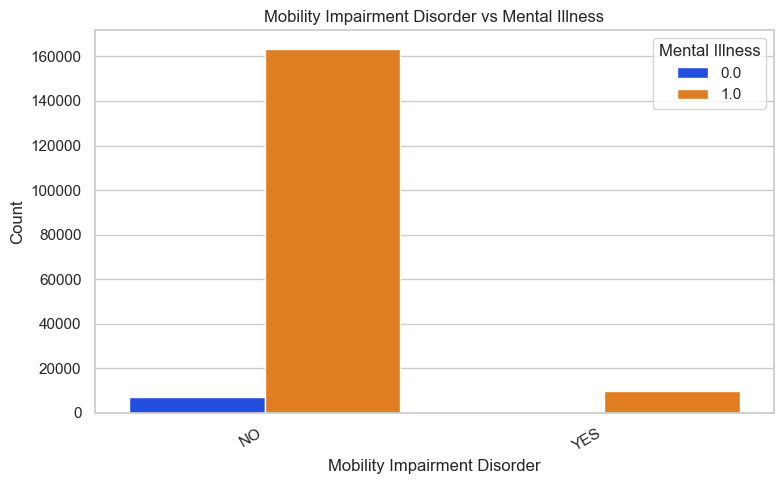

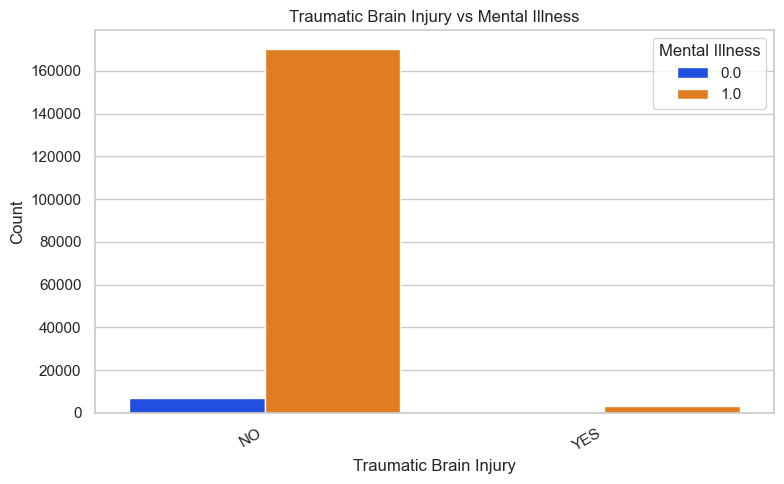

In [423]:
for col in neurodev_cols :
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Mental Illness', data=df, palette='bright')
    plt.title(f'{col} vs Mental Illness')
    plt.xticks(rotation=30, ha='right')  # éviter l'écrasement du texte
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Mental Illness')
    plt.tight_layout()
    plt.show()

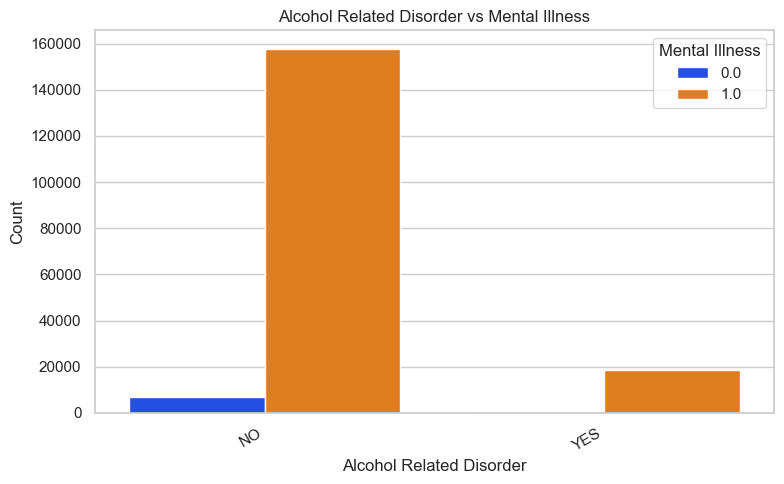

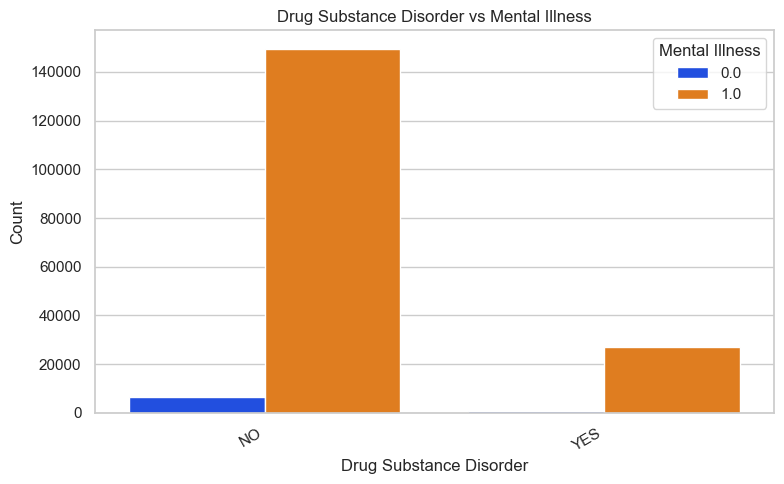

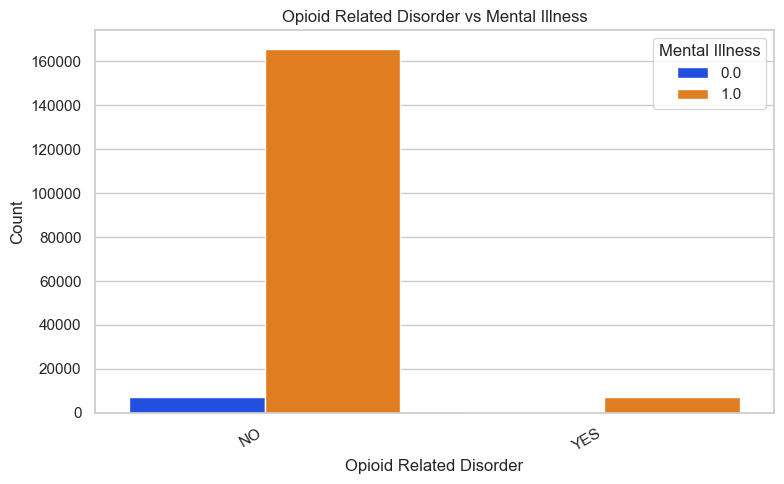

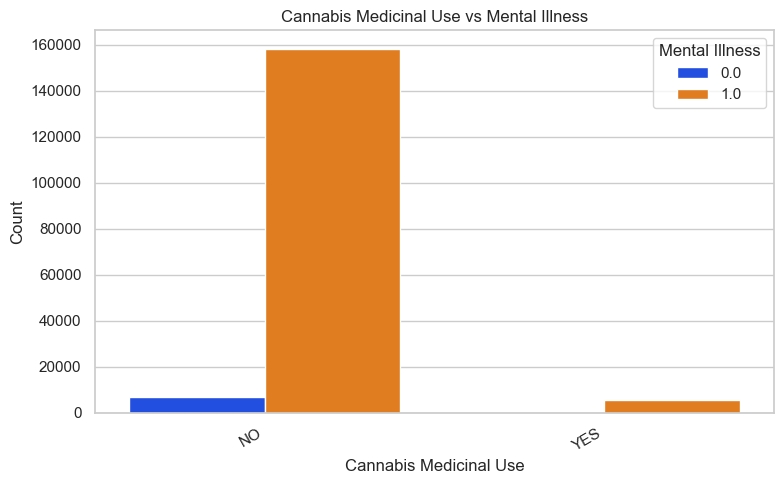

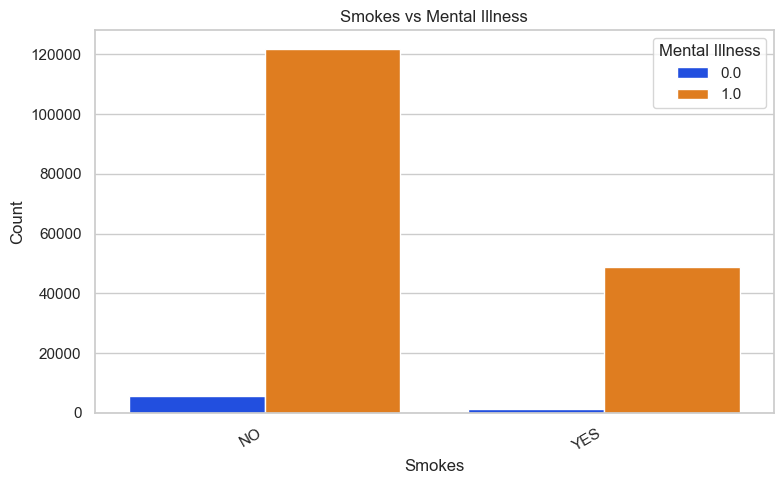

In [424]:
for col in addiction_cols :
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Mental Illness', data=df, palette='bright')
    plt.title(f'{col} vs Mental Illness')
    plt.xticks(rotation=30, ha='right')  # éviter l'écrasement du texte
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Mental Illness')
    plt.tight_layout()
    plt.show()

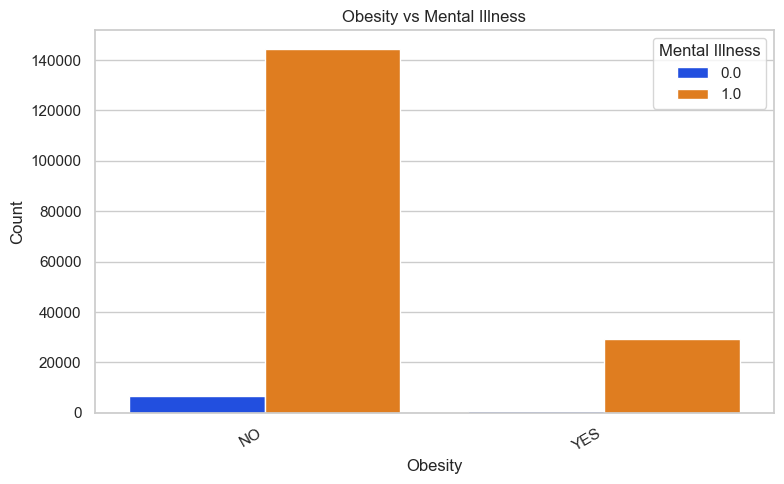

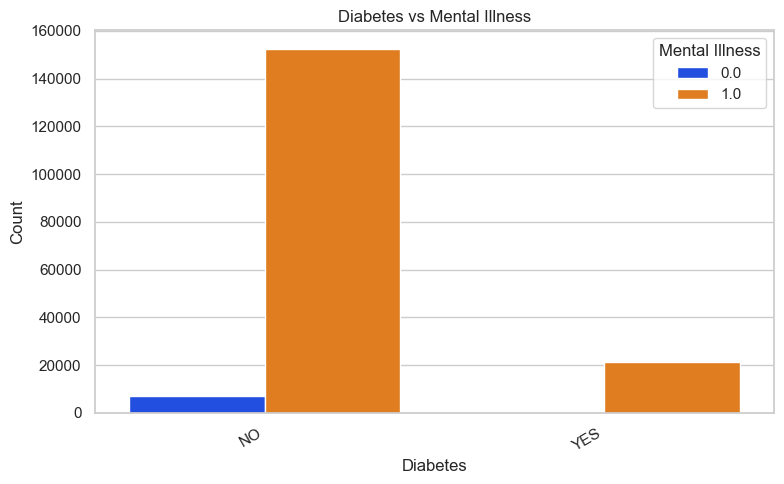

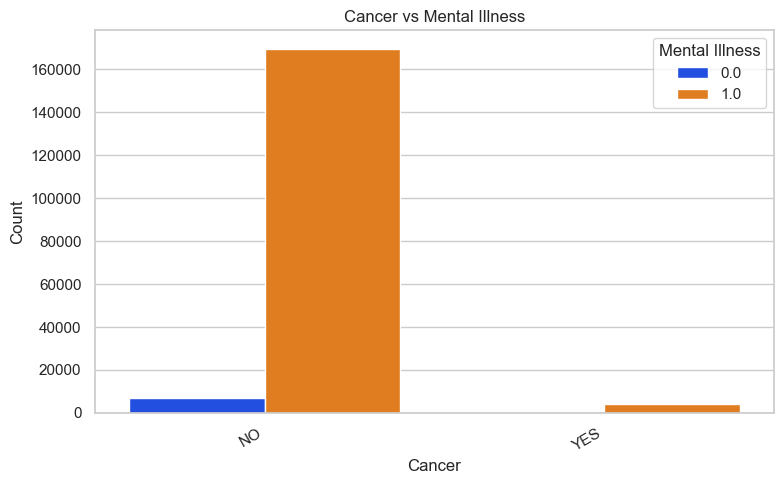

In [425]:
for col in chronic_disease_cols :
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Mental Illness', data=df, palette='bright')
    plt.title(f'{col} vs Mental Illness')
    plt.xticks(rotation=30, ha='right')  # éviter l'écrasement du texte
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Mental Illness')
    plt.tight_layout()
    plt.show()

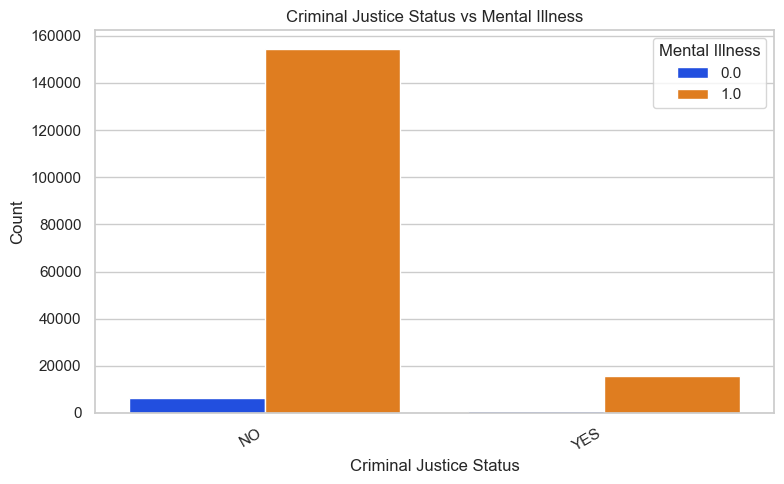

In [426]:
for col in justice_cols :
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Mental Illness', data=df, palette='bright')
    plt.title(f'{col} vs Mental Illness')
    plt.xticks(rotation=30, ha='right')  # éviter l'écrasement du texte
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Mental Illness')
    plt.tight_layout()
    plt.show()

# III- HANDLING MISSING VALUES

In [428]:
#Eviter les bug
df.replace(['NAN', 'NaN', 'nan', 'None', 'NONE', '[nan]'], np.nan, inplace=True)

STEP 1: Simple imputation by mode (very few NaNs)

In [430]:
cols_faible_nan = ['Sex', 'Age Group', 'Preferred Language']
for col in cols_faible_nan:
    mode_val = df[col].mode(dropna=True)[0]
    df[col] = df[col].fillna(mode_val)
    print(f"{col} imputé par mode : {mode_val}")

Sex imputé par mode : FEMALE
Age Group imputé par mode : ADULT
Preferred Language imputé par mode : ENGLISH


STEP 2: Logical grouping imputation function


In [432]:
def imputer_par_groupe(df, col, group_cols):
    df_copy = df.copy()
    # Créer une table avec les valeurs les plus fréquentes par groupe
    group_df = df_copy.dropna(subset=[col]).groupby(group_cols)[col].agg(lambda x: x.value_counts().index[0]).reset_index()
    group_df.rename(columns={col: 'valeur_majoritaire'}, inplace=True)

    # Joindre pour récupérer la valeur imputée
    df_copy = df_copy.merge(group_df, on=group_cols, how='left')

    # Remplacer les NaN avec la valeur du groupe
    mask = df_copy[col].isna() & df_copy['valeur_majoritaire'].notna()
    df_copy.loc[mask, col] = df_copy.loc[mask, 'valeur_majoritaire']

    # Nettoyage
    df_copy.drop(columns='valeur_majoritaire', inplace=True)
    print(f"{col} imputé par groupe {group_cols} — {mask.sum()} valeurs remplies, reste {df_copy[col].isna().sum()} NaN")
    return df_copy


STEP 3: Columns imputed by logical group

In [434]:
grouped_imputations = {
    'Sexual Orientation': ['Age Group', 'Sex', 'Region Served'],
    'Employment Status': ['Education Status', 'Age Group'],
    'Obesity': ['Age Group', 'Sex', 'Diabetes'],
    'Transgender': ['Sex'],
    'Race': ['Region Served', 'Hispanic Ethnicity'],
    'Cannabis Medicinal Use': ['Age Group', 'Alcohol Related Disorder'],
    'Religious Preference': ['Age Group', 'Sex'],
    'Living Situation': ['Region Served'],
    'Household Composition': ['Living Situation', 'Age Group'],
}

for col, grp in grouped_imputations.items():
    df = imputer_par_groupe(df, col, grp)

Sexual Orientation imputé par groupe ['Age Group', 'Sex', 'Region Served'] — 34358 valeurs remplies, reste 0 NaN
Employment Status imputé par groupe ['Education Status', 'Age Group'] — 7100 valeurs remplies, reste 5418 NaN
Obesity imputé par groupe ['Age Group', 'Sex', 'Diabetes'] — 0 valeurs remplies, reste 14376 NaN
Transgender imputé par groupe ['Sex'] — 15426 valeurs remplies, reste 0 NaN
Race imputé par groupe ['Region Served', 'Hispanic Ethnicity'] — 4718 valeurs remplies, reste 2685 NaN
Cannabis Medicinal Use imputé par groupe ['Age Group', 'Alcohol Related Disorder'] — 16734 valeurs remplies, reste 7758 NaN
Religious Preference imputé par groupe ['Age Group', 'Sex'] — 56347 valeurs remplies, reste 0 NaN
Living Situation imputé par groupe ['Region Served'] — 8893 valeurs remplies, reste 0 NaN
Household Composition imputé par groupe ['Living Situation', 'Age Group'] — 10038 valeurs remplies, reste 0 NaN


STEP 4: Smart Cascade Imputation

In [436]:
def imputation_en_cascade(df, col, groupings):
    df_copy = df.copy()
    total_filled = 0
    for group_cols in groupings:
        table = df_copy.dropna(subset=[col]).groupby(group_cols)[col].agg(lambda x: x.value_counts().index[0]).reset_index()
        table.rename(columns={col: 'valeur_majoritaire'}, inplace=True)
        df_copy = df_copy.merge(table, on=group_cols, how='left')
        mask = df_copy[col].isna() & df_copy['valeur_majoritaire'].notna()
        df_copy.loc[mask, col] = df_copy.loc[mask, 'valeur_majoritaire']
        filled_now = mask.sum()
        total_filled += filled_now
        df_copy.drop(columns='valeur_majoritaire', inplace=True)
        print(f"{col} imputé par groupe {group_cols} — {filled_now} valeurs remplies, reste {df_copy[col].isna().sum()} NaN")
        if df_copy[col].isna().sum() == 0:
            break
    return df_copy

STEP 5: Columns to be processed by expanded cascade

In [438]:
cascading_imputations = {
    'Employment Status': [['Education Status', 'Age Group'], ['Age Group']],
    'Obesity': [['Age Group', 'Sex', 'Diabetes'], ['Age Group', 'Sex'], ['Age Group']],
    'Race': [['Region Served', 'Hispanic Ethnicity'], ['Region Served']],
    'Cannabis Medicinal Use': [['Age Group', 'Alcohol Related Disorder'], ['Age Group']]
}

for col, cascades in cascading_imputations.items():
    df = imputation_en_cascade(df, col, cascades)

Employment Status imputé par groupe ['Education Status', 'Age Group'] — 0 valeurs remplies, reste 5418 NaN
Employment Status imputé par groupe ['Age Group'] — 5418 valeurs remplies, reste 0 NaN
Obesity imputé par groupe ['Age Group', 'Sex', 'Diabetes'] — 0 valeurs remplies, reste 14376 NaN
Obesity imputé par groupe ['Age Group', 'Sex'] — 14376 valeurs remplies, reste 0 NaN
Race imputé par groupe ['Region Served', 'Hispanic Ethnicity'] — 0 valeurs remplies, reste 2685 NaN
Race imputé par groupe ['Region Served'] — 2685 valeurs remplies, reste 0 NaN
Cannabis Medicinal Use imputé par groupe ['Age Group', 'Alcohol Related Disorder'] — 0 valeurs remplies, reste 7758 NaN
Cannabis Medicinal Use imputé par groupe ['Age Group'] — 7758 valeurs remplies, reste 0 NaN


In [439]:
def imputation_en_cascade(df, col, groupings):
    df_copy = df.copy()
    total_filled = 0
    for group_cols in groupings:
        grouped = df_copy[df_copy[col].notna()].groupby(group_cols)[col].agg(pd.Series.mode).reset_index()
        grouped.rename(columns={col: 'valeur_majoritaire'}, inplace=True)
        df_copy = df_copy.merge(grouped, on=group_cols, how='left')
        mask = df_copy[col].isna() & df_copy['valeur_majoritaire'].notna()
        df_copy.loc[mask, col] = df_copy.loc[mask, 'valeur_majoritaire']
        filled_now = mask.sum()
        total_filled += filled_now
        df_copy.drop(columns='valeur_majoritaire', inplace=True)
        print(f"{col} imputé par groupe {group_cols} — {filled_now} valeurs remplies, reste {df_copy[col].isna().sum()} NaN")
        if df_copy[col].isna().sum() == 0:
            break
    return df_copy

In [440]:
cascading_imputations = {
    'Hispanic Ethnicity': [['Race', 'Region Served'], ['Region Served']],
    'Education Status': [['Age Group', 'Employment Status'], ['Age Group']],
    'Veteran Status': [['Age Group', 'Sex'], ['Age Group']],
    'Special Education Services': [['Education Status', 'Age Group'], ['Age Group']],
    'Number Of Hours Worked Each Week': [['Employment Status'], ['Age Group']],
    'Intellectual Disability': [['Age Group', 'Sex']],
    'Autism Spectrum': [['Age Group', 'Sex']],
    'Other Developmental Disability': [['Age Group', 'Sex']],
    'Alcohol Related Disorder': [['Age Group', 'Sex']],
    'Drug Substance Disorder': [['Age Group', 'Sex']],
    'Opioid Related Disorder': [['Age Group', 'Sex']],
    'Mobility Impairment Disorder': [['Age Group', 'Sex']],
    'Hearing Impairment': [['Age Group', 'Sex']],
    'Visual Impairment': [['Age Group', 'Sex']],
    'Speech Impairment': [['Age Group', 'Sex']],
    'Hyperlipidemia': [['Age Group', 'Sex']],
    'High Blood Pressure': [['Age Group', 'Sex']],
    'Diabetes': [['Age Group', 'Sex']],
    'Heart Attack': [['Age Group', 'Sex']],
    'Stroke': [['Age Group', 'Sex']],
    'Other Cardiac': [['Age Group', 'Sex']],
    'Pulmonary Asthma': [['Age Group', 'Sex']],
    'Alzheimer or Dementia': [['Age Group', 'Sex']],
    'Kidney Disease': [['Age Group', 'Sex']],
    'Liver Disease': [['Age Group', 'Sex']],
    'Endocrine Condition': [['Age Group', 'Sex']],
    'Neurological Condition': [['Age Group', 'Sex']],
    'Traumatic Brain Injury': [['Age Group', 'Sex']],
    'Joint Disease': [['Age Group', 'Sex']],
    'Cancer': [['Age Group', 'Sex']],
    'Other Chronic Med Condition': [['Age Group', 'Sex']],
    'No Chronic Med Condition': [['Age Group', 'Sex']],
    'Cannabis Recreational Use': [['Age Group', 'Drug Substance Disorder'], ['Age Group']],
    'Smokes': [['Age Group', 'Drug Substance Disorder'], ['Age Group']],
    'Received Smoking Medication': [['Age Group', 'Smokes']],
    'Received Smoking Counseling': [['Age Group', 'Smokes']],
    'Alcohol 12m Service': [['Age Group', 'Alcohol Related Disorder']],
    'Opioid 12m Service': [['Age Group', 'Opioid Related Disorder']],
    'Drug/Substance 12m Service': [['Age Group', 'Drug Substance Disorder']],
    'SSI Cash Assistance': [['Age Group', 'Employment Status']],
    'SSDI Cash Assistance': [['Age Group', 'Employment Status']],
    'Veterans Disability Benefits': [['Age Group', 'Veteran Status']],
    'Veterans Cash Assistance': [['Age Group', 'Veteran Status']],
    'Public Assistance Cash Program': [['Age Group', 'Employment Status']],
    'Other Cash Benefits': [['Age Group', 'Employment Status']],
    'Medicaid and Medicare Insurance': [['Age Group', 'Employment Status']],
    'No Insurance': [['Age Group', 'Employment Status']],
    'Medicaid Insurance': [['Age Group', 'Employment Status']],
    'Medicaid Managed Insurance': [['Age Group', 'Employment Status']],
    'Medicare Insurance': [['Age Group', 'Employment Status']],
    'Private Insurance': [['Age Group', 'Employment Status']],
    'Child Health Plus Insurance': [['Age Group', 'Employment Status']],
    'Other Insurance': [['Age Group', 'Employment Status']],
    'Criminal Justice Status': [['Age Group', 'Sex']]
}

# Application des imputations
for col, cascades in cascading_imputations.items():
    df = imputation_en_cascade(df, col, cascades)

Hispanic Ethnicity imputé par groupe ['Race', 'Region Served'] — 5965 valeurs remplies, reste 0 NaN
Education Status imputé par groupe ['Age Group', 'Employment Status'] — 20799 valeurs remplies, reste 0 NaN
Veteran Status imputé par groupe ['Age Group', 'Sex'] — 8164 valeurs remplies, reste 0 NaN
Special Education Services imputé par groupe ['Education Status', 'Age Group'] — 4970 valeurs remplies, reste 0 NaN
Number Of Hours Worked Each Week imputé par groupe ['Employment Status'] — 3609 valeurs remplies, reste 0 NaN
Intellectual Disability imputé par groupe ['Age Group', 'Sex'] — 17491 valeurs remplies, reste 0 NaN
Autism Spectrum imputé par groupe ['Age Group', 'Sex'] — 16106 valeurs remplies, reste 0 NaN
Other Developmental Disability imputé par groupe ['Age Group', 'Sex'] — 15844 valeurs remplies, reste 0 NaN
Alcohol Related Disorder imputé par groupe ['Age Group', 'Sex'] — 11685 valeurs remplies, reste 0 NaN
Drug Substance Disorder imputé par groupe ['Age Group', 'Sex'] — 11526 

STEP 6:Fix columns logicaly

In [442]:
#Addictions for Children
for col in addiction_cols :
    df.loc[(df['Age Group'] == 'CHILD') & (df[col].isna()), col] = 'NO'
#Work
df.loc[(df['Age Group'] == 'CHILD') &
(df['Employment Status'].isna()), 'Employment Status'] = 'NOT APPLICABLE'
df.loc[(df['Age Group'] == 'CHILD') &
(df['Number Of Hours Worked Each Week'].isna()), 'Number Of Hours Worked Each Week'] = 'NOT APPLICABLE'

#Social help
cols_aides = [
    'SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits',
    'Veterans Cash Assistance', 'Public Assistance Cash Program', 'Other Cash Benefits'
]
for col in cols_aides:
    df.loc[(df['Age Group'] == 'CHILD') &
    (df[col].isna()), col] = 'NO'

#Assurances
df.loc[(df['Age Group'] == 'CHILD') &
(df['Child Health Plus Insurance'].isna()), 'Child Health Plus Insurance'] = 'YES'
assurances = [
    'Medicaid and Medicare Insurance', 'No Insurance', 'Medicaid Insurance',
    'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance', 'Other Insurance'
]

for col in assurances:
    df.loc[(df['Age Group'] == 'CHILD') &
     (df[col].isna()), col] = 'NO'

#identity

df.loc[(df['Age Group'] == 'CHILD') &
  (df['Transgender'].isna()), 'Transgender'] = 'NO, NOT TRANSGENDER'

df.loc[(df['Age Group'] == 'CHILD') &
  (df['Sexual Orientation'].isna()), 'Sexual Orientation'] = 'OTHER'

df.loc[(df['Age Group'] == 'CHILD') &
  (df['Religious Preference'].isna()), 'Religious Preference'] = 'I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON'

In [443]:
for col in df.select_dtypes(include='bool').columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(False, inplace=True)
        print(f"'{col}' (bool) filled with False")

In [444]:
#use other columns

df['Serious Mental Illness'] = df['Serious Mental Illness'].astype(str).str.upper().str.strip()
df['Principal Diagnosis Class'] = df['Principal Diagnosis Class'].astype(str).str.upper().str.strip()
df['Additional Diagnosis Class'] = df['Additional Diagnosis Class'].astype(str).str.upper().str.strip()

# Imputer par 1
df.loc[
    df['Mental Illness'].isna() & (
        (df['Principal Diagnosis Class'] == 'MENTAL ILLNESS') |
        (df['Additional Diagnosis Class'] == 'MENTAL ILLNESS') |
        (df['Serious Mental Illness'] == 'YES')
    ),
    'Mental Illness'
] = 1

# Imputer par NO
df.loc[
    df['Mental Illness'].isna() & (
        df['Principal Diagnosis Class'].str.startswith('NOT MI') |
        df['Additional Diagnosis Class'].str.startswith('NOT MI') |
        (df['Serious Mental Illness'] == 'NO')
    ),
    'Mental Illness'
] = 0 

# Pour les derniers cas ambigus, on choisit par défaut NO
df['Mental Illness'] = df['Mental Illness'].fillna(0)

In [445]:
print(df['Mental Illness'].value_counts(dropna=False))

Mental Illness
1    186957
0      9145
Name: count, dtype: Int64


In [446]:
#Drop 'Prefered Langage' Columns
if 'Preferred Language' in df.columns:
    df.drop(columns=['Preferred Language'], inplace=True)
    print("Preferred Language Deleted")

Preferred Language Deleted


In [447]:
# List of columns affected by incorrectly encoded multiple values (e.g. '[NO, YES]')
colonnes_multiples = [
    'SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits',
    'Veterans Cash Assistance', 'Public Assistance Cash Program', 'Other Cash Benefits'
]

# Cleaning function
for col in colonnes_multiples:
    df[col] = df[col].apply(lambda x: x if isinstance(x, str) and x in ['YES', 'NO'] else np.nan)
    print(f"{col} — Valeurs corrigées")

# Simple imputation by mode 
for col in colonnes_multiples:
    mode_val = df[col].mode(dropna=True)[0]
    df[col] = df[col].fillna(mode_val)  # Pas de inplace ici
    print(f"{col} rempli par le mode : {mode_val}")

SSI Cash Assistance — Valeurs corrigées
SSDI Cash Assistance — Valeurs corrigées
Veterans Disability Benefits — Valeurs corrigées
Veterans Cash Assistance — Valeurs corrigées
Public Assistance Cash Program — Valeurs corrigées
Other Cash Benefits — Valeurs corrigées
SSI Cash Assistance rempli par le mode : NO
SSDI Cash Assistance rempli par le mode : NO
Veterans Disability Benefits rempli par le mode : NO
Veterans Cash Assistance rempli par le mode : NO
Public Assistance Cash Program rempli par le mode : NO
Other Cash Benefits rempli par le mode : NO


In [448]:
#Avoid bugs
df.replace(['NAN', 'NaN', 'nan', 'None', 'NONE', '[nan]'], np.nan, inplace=True)

In [449]:
# Final alignment of consistency between the 3 diagnostic columns

# If Primary = Mental Illness or Additional = Mental Illness → Mental = 1
df.loc[
    (df['Mental Illness'].isna()) &
    (
        (df['Principal Diagnosis Class'] == 'MENTAL ILLNESS') |
        (df['Additional Diagnosis Class'] == 'MENTAL ILLNESS')
    ),
    'Mental Illness'
] = 1

# If Principal starts with NOT MI or Additional starts with NOT MI → Mental = 0
df.loc[
    (df['Mental Illness'].isna()) &
    (
        df['Principal Diagnosis Class'].str.startswith('NOT MI', na=False) |
        df['Additional Diagnosis Class'].str.startswith('NOT MI', na=False)
    ),
    'Mental Illness'
] = 0

# If Mental = 1 and Serious is NaN → Serious = YES
df.loc[(df['Mental Illness'] == 1) & (df['Serious Mental Illness'].isna()), 'Serious Mental Illness'] = 'YES'
# Si Mental = 0 et Serious est NaN → Serious = NO
df.loc[(df['Mental Illness'] == 0) & (df['Serious Mental Illness'].isna()), 'Serious Mental Illness'] = 'NO'

# If Mental = 1 and Principal is NaN → Principal = MENTAL ILLNESS
df.loc[(df['Mental Illness'] == 1) & (df['Principal Diagnosis Class'].isna()), 'Principal Diagnosis Class'] = 'MENTAL ILLNESS'
# If Mental = 0 and Principal is NaN → Principal = NOT MI - OTHER
df.loc[(df['Mental Illness'] == 0) & (df['Principal Diagnosis Class'].isna()), 'Principal Diagnosis Class'] = 'NOT MI - OTHER'

# If Mental = 1 and Additional is NaN → Additional = MENTAL ILLNESS
df.loc[(df['Mental Illness'] == 1) & (df['Additional Diagnosis Class'].isna()), 'Additional Diagnosis Class'] = 'MENTAL ILLNESS'
# If Mental = 0 and Additional is NaN → Additional = NO ADDITIONAL DIAGNOSIS
df.loc[(df['Mental Illness'] == 0) & (df['Additional Diagnosis Class'].isna()), 'Additional Diagnosis Class'] = 'NO ADDITIONAL DIAGNOSIS'


In [450]:
#Check missing values
print(df.isna().sum())

Program Category                    0
Region Served                       0
Age Group                           0
Sex                                 0
Transgender                         0
Sexual Orientation                  0
Hispanic Ethnicity                  0
Race                                0
Living Situation                    0
Household Composition               0
Religious Preference                0
Veteran Status                      0
Employment Status                   0
Number Of Hours Worked Each Week    0
Education Status                    0
Special Education Services          0
Mental Illness                      0
Intellectual Disability             0
Autism Spectrum                     0
Other Developmental Disability      0
Alcohol Related Disorder            0
Drug Substance Disorder             0
Opioid Related Disorder             0
Mobility Impairment Disorder        0
Hearing Impairment                  0
Visual Impairment                   0
Speech Impai

In [451]:
print(df['Mental Illness'].value_counts(dropna=False))

Mental Illness
1    186957
0      9145
Name: count, dtype: Int64


In [452]:
for col in df.columns:
    print(f"\n{col}:\n", df[col].value_counts(dropna=False))


Program Category:
 Program Category
OUTPATIENT     133197
RESIDENTIAL     30145
SUPPORT         20413
INPATIENT        8960
EMERGENCY        3387
Name: count, dtype: int64

Region Served:
 Region Served
NEW YORK CITY REGION    96643
WESTERN REGION          34524
HUDSON RIVER REGION     27369
CENTRAL NY REGION       22264
LONG ISLAND REGION      15302
Name: count, dtype: int64

Age Group:
 Age Group
ADULT    152282
CHILD     43820
Name: count, dtype: int64

Sex:
 Sex
FEMALE    99639
MALE      96463
Name: count, dtype: int64

Transgender:
 Transgender
NO, NOT TRANSGENDER    192648
YES, TRANSGENDER         3454
Name: count, dtype: int64

Sexual Orientation:
 Sexual Orientation
STRAIGHT OR HETEROSEXUAL    180726
BISEXUAL                      6940
LESBIAN OR GAY                6014
OTHER                         2422
Name: count, dtype: int64

Hispanic Ethnicity:
 Hispanic Ethnicity
NO, NOT HISPANIC/LATINO    149984
YES, HISPANIC/LATINO        46118
Name: count, dtype: int64

Race:
 Race
WH

# Save Cleaned Dataset

In [454]:
df_cleaned = df

In [455]:
df_cleaned.shape

(196102, 73)

In [456]:
#nirusa path
df_cleaned.to_csv("C:/Users/nirus/Documents/DSTI/Ml_project_MI/data_clean.csv", sep=";", index=False)
df_cleaned.to_excel("C:/Users/nirus/Documents/DSTI/Ml_project_MI/data_clean.xlsx", index=False)


In [457]:
df_cleaned

Program Category         Region Served Age Group     Sex  \
0            OUTPATIENT    LONG ISLAND REGION     ADULT    MALE   
1            OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
2            OUTPATIENT   HUDSON RIVER REGION     ADULT    MALE   
3           RESIDENTIAL  NEW YORK CITY REGION     ADULT    MALE   
4            OUTPATIENT        WESTERN REGION     ADULT  FEMALE   
...                 ...                   ...       ...     ...   
196097       OUTPATIENT   HUDSON RIVER REGION     ADULT  FEMALE   
196098       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
196099       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
196100          SUPPORT   HUDSON RIVER REGION     CHILD  FEMALE   
196101       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   

                Transgender        Sexual Orientation  \
0       NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
1       NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
2       NO, NOT TRANSGENDER            LESBIAN OR GAY   
3       NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
4       NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
...                     ...                       ...   
196097  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196098  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196099  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196100  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196101  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   

             Hispanic Ethnicity        Race        Living Situation  \
0          YES, HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE   
1       NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE   
2       NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE   
3          YES, HISPANIC/LATINO       OTHER  OTHER LIVING SITUATION   
4       NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE   
...                         ...         ...                     ...   
196097  NO, NOT HISPANIC/LATINO  WHITE ONLY  OTHER LIVING SITUATION   
196098  NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE   
196099  NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE   
196100  NO, NOT HISPANIC/LATINO  BLACK ONLY       PRIVATE RESIDENCE   
196101  NO, NOT HISPANIC/LATINO       OTHER       PRIVATE RESIDENCE   

          Household Composition  ... Medicaid and Medicare Insurance  \
0       COHABITATES WITH OTHERS  ...                              NO   
1                   LIVES ALONE  ...                              NO   
2       COHABITATES WITH OTHERS  ...                              NO   
3                NOT APPLICABLE  ...                              NO   
4       COHABITATES WITH OTHERS  ...                              NO   
...                         ...  ...                             ...   
196097           NOT APPLICABLE  ...                              NO   
196098  COHABITATES WITH OTHERS  ...                             YES   
196099  COHABITATES WITH OTHERS  ...                             YES   
196100  COHABITATES WITH OTHERS  ...                              NO   
196101  COHABITATES WITH OTHERS  ...                             YES   

       No Insurance Unknown Insurance Coverage Medicaid Insurance  \
0                NO                      False                YES   
1                NO                      False                YES   
2                NO                      False                YES   
3                NO                      False                YES   
4                NO                      False                YES   
...             ...                        ...                ...   
196097           NO                      False                YES   
196098           NO                      False                YES   
196099           NO                      False                YES   
196100           NO                      False                YES   
196101           NO                     

# IV - FEATURE ENGINEERING

One hot encoding
- mental ilness a déjà été encoder précédemment.
- preferedlanguage ( la colonne n'existe plus )


In [460]:
import pandas as pd

one_hot = [
    "Region Served",
    "Sex",
    "Hispanic Ethnicity",
    "Race",
    "Transgender",
    "Special Education Services",
    "Household Composition",
    "Sexual Orientation",
    "Religious Preference",
    "Additional Diagnosis Class",
    "Principal Diagnosis Class",
    "Program Category",
]

# One-Hot Encoding
df_OneHot = pd.get_dummies(df_cleaned, columns=one_hot, drop_first=True)
df_OneHot


Age Group        Living Situation Veteran Status  \
0          ADULT       PRIVATE RESIDENCE             NO   
1          ADULT       PRIVATE RESIDENCE             NO   
2          ADULT       PRIVATE RESIDENCE             NO   
3          ADULT  OTHER LIVING SITUATION             NO   
4          ADULT       PRIVATE RESIDENCE             NO   
...          ...                     ...            ...   
196097     ADULT  OTHER LIVING SITUATION             NO   
196098     ADULT       PRIVATE RESIDENCE             NO   
196099     ADULT       PRIVATE RESIDENCE             NO   
196100     CHILD       PRIVATE RESIDENCE             NO   
196101     ADULT       PRIVATE RESIDENCE             NO   

                                        Employment Status  \
0                                                EMPLOYED   
1                                                EMPLOYED   
2                                                EMPLOYED   
3                                                EMPLOYED   
4                                                EMPLOYED   
...                                                   ...   
196097  NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...   
196098  NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...   
196099  NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...   
196100  NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...   
196101  NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...   

       Number Of Hours Worked Each Week              Education Status  \
0                           01-14 HOURS    COLLEGE OR GRADUATE DEGREE   
1                           01-14 HOURS    COLLEGE OR GRADUATE DEGREE   
2                           15-34 HOURS                  SOME COLLEGE   
3                           15-34 HOURS  MIDDLE SCHOOL TO HIGH SCHOOL   
4                      35 HOURS OR MORE                  SOME COLLEGE   
...                                 ...                           ...   
196097                   NOT APPLICABLE  MIDDLE SCHOOL TO HIGH SCHOOL   
196098                   NOT APPLICABLE    COLLEGE OR GRADUATE DEGREE   
196099                   NOT APPLICABLE    COLLEGE OR GRADUATE DEGREE   
196100                   NOT APPLICABLE  MIDDLE SCHOOL TO HIGH SCHOOL   
196101                   NOT APPLICABLE  MIDDLE SCHOOL TO HIGH SCHOOL   

        Mental Illness Intellectual Disability Autism Spectrum  \
0                    1                      NO              NO   
1                    1                      NO              NO   
2                    1                      NO              NO   
3                    1                      NO              NO   
4                    1                      NO              NO   
...                ...                     ...             ...   
196097               1                     YES              NO   
196098               1                      NO              NO   
196099               1                      NO              NO   
196100               1                      NO              NO   
196101               1                      NO              NO   

       Other Developmental Disability  ...  \
0                                  NO  ...   
1                                  NO  ...   
2                                 YES  ...   
3                                  NO  ...   
4                                  NO  ...   
...                               ...  ...   
196097                             NO  ...   
196098                            YES  ...   
196099                             NO  ...   
196100                             NO  ...   
196101                             NO  ...   

       Additional Diagnosis Class_NOT MI - OTHER  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                           

In [461]:
print(df_OneHot.isna().sum())

Age Group                                                              0
Living Situation                                                       0
Veteran Status                                                         0
Employment Status                                                      0
Number Of Hours Worked Each Week                                       0
                                                                      ..
Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS    0
Program Category_INPATIENT                                             0
Program Category_OUTPATIENT                                            0
Program Category_RESIDENTIAL                                           0
Program Category_SUPPORT                                               0
Length: 93, dtype: int64


In [462]:
print(df_OneHot.columns)

Index(['Age Group', 'Living Situation', 'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Mental Illness', 'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
       'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
       'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
       'Received Smok

Ordinal encoding

The columns to be encoded in ordinal: Age group, living situation, special, education, number of hours worked each week, education status, employment status.

For education status: there are "other" and "NO FORMAL EDUCATION" that we try to understand in order to classify them.

C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\3592160062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_other, x=col, order=df_other[col].value_counts().index, palette="Set2")
C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\3592160062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_other, x=col, order=df_other[col].value_counts().index, palette="Set2")
C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\3592160062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_other, x=col, order=df_other[co

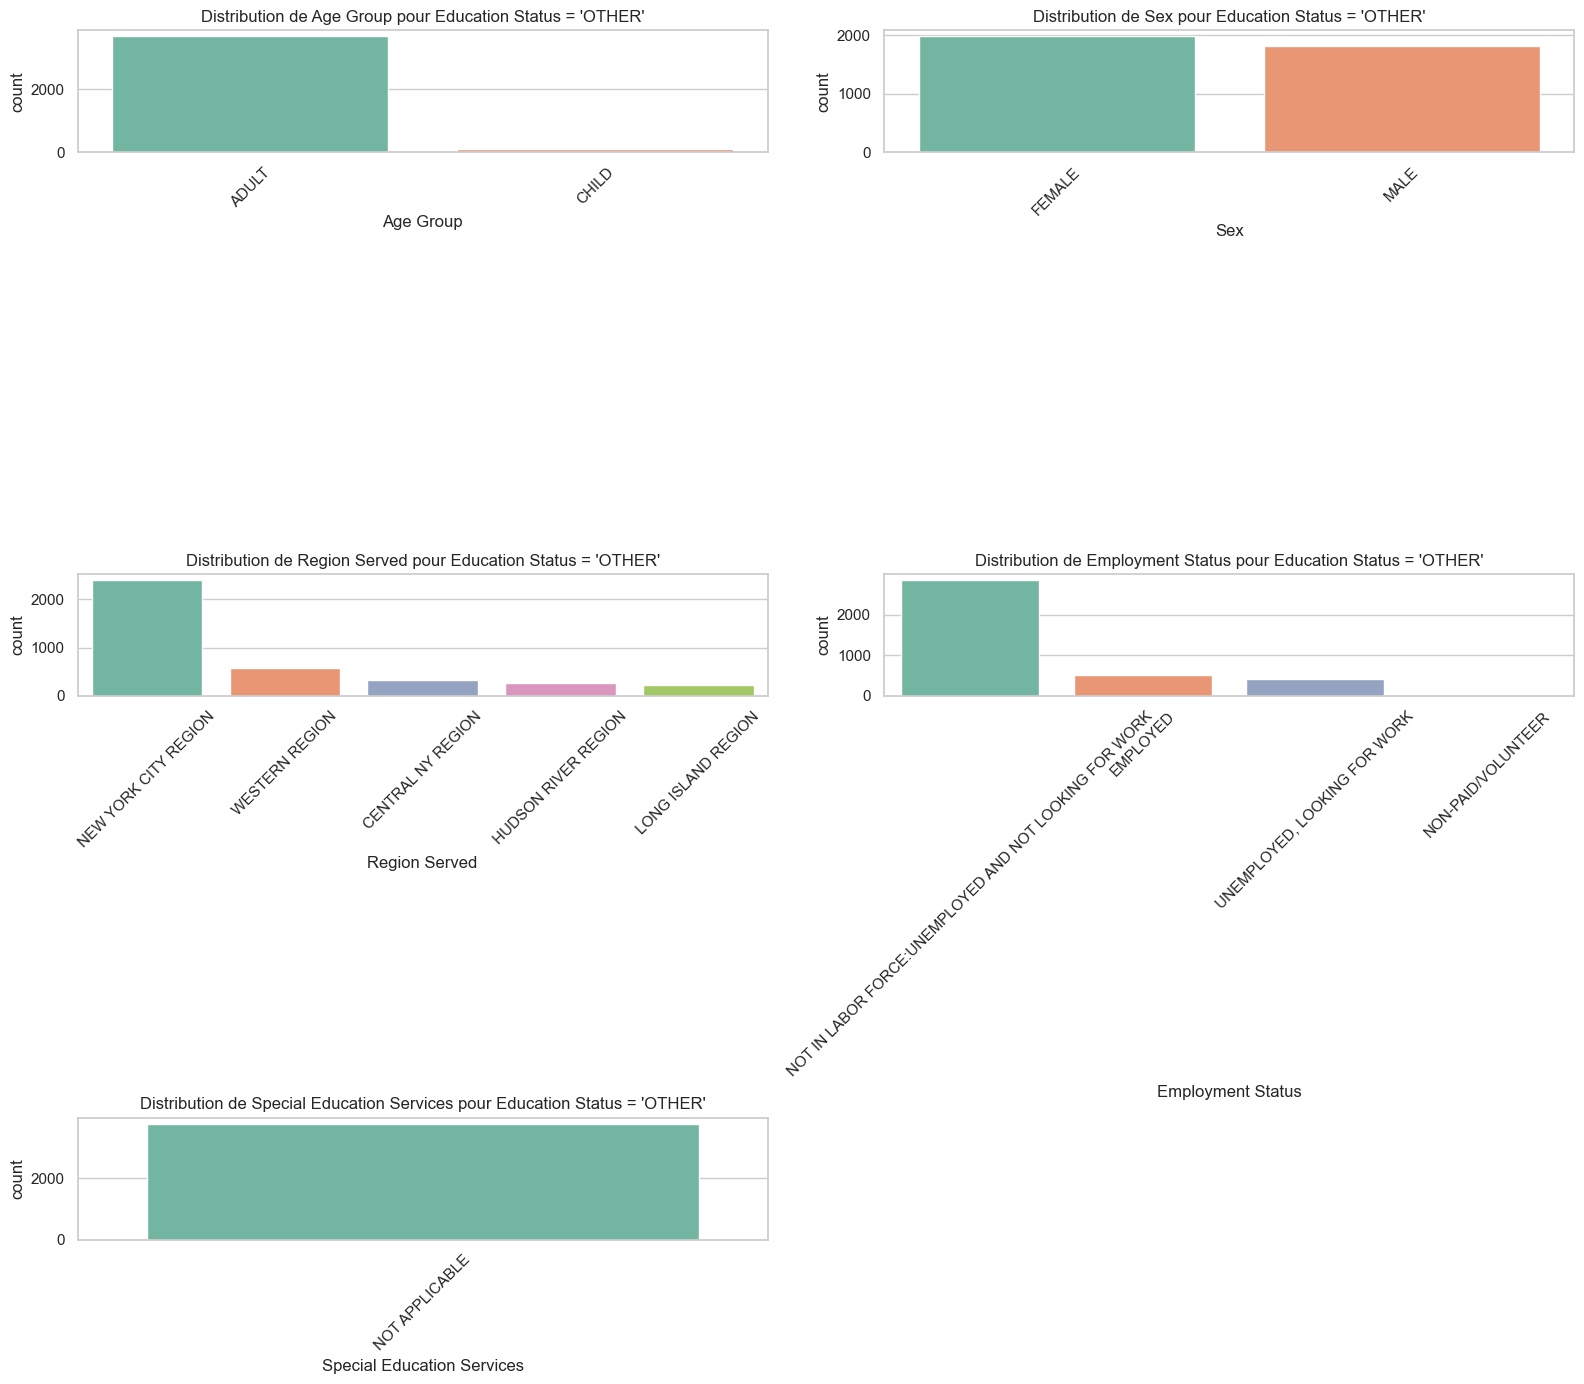

In [464]:
# Filter rows where Education Status is 'OTHER'

df_other = df[df["Education Status"] == "OTHER"]

# List of columns to view
cols_to_plot = ["Age Group", "Sex", "Region Served", "Employment Status", "Special Education Services"]

# Create a subplot for each column
plt.figure(figsize=(16, 14))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df_other, x=col, order=df_other[col].value_counts().index, palette="Set2")
    plt.title(f"Distribution de {col} pour Education Status = 'OTHER'")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()



# people who answered "other" in "education status" are mostly adults, not working, living in the NY region for whom special education services are not applicable.

C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\3918053905.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


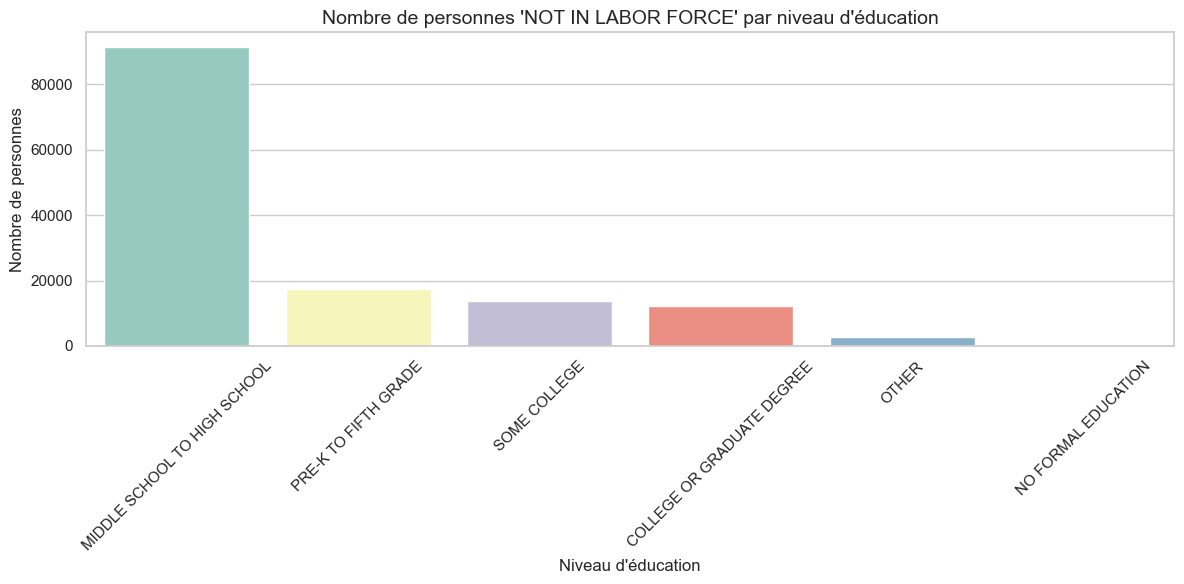

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only people "NOT IN LABOR FORCE: UNEMPLOYED AND NOT LOOKING FOR WORK"
df_unemployed = df[
    df["Employment Status"].str.upper() == "NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK"
]

# Create a bar chart with Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_unemployed,
    x="Education Status",
    order=df_unemployed["Education Status"].value_counts().index,
    palette="Set3"
)

# Customize the chart
plt.title("Nombre de personnes 'NOT IN LABOR FORCE' par niveau d'éducation", fontsize=14)
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre de personnes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# for comparison, non-active people have a middle school to high school education level. so other will be just before this value

C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\1568831381.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_other, x=col, order=df_other[col].value_counts().index, palette="Set2")
C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\1568831381.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_other, x=col, order=df_other[col].value_counts().index, palette="Set2")
C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\1568831381.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_other, x=col, order=df_other[co

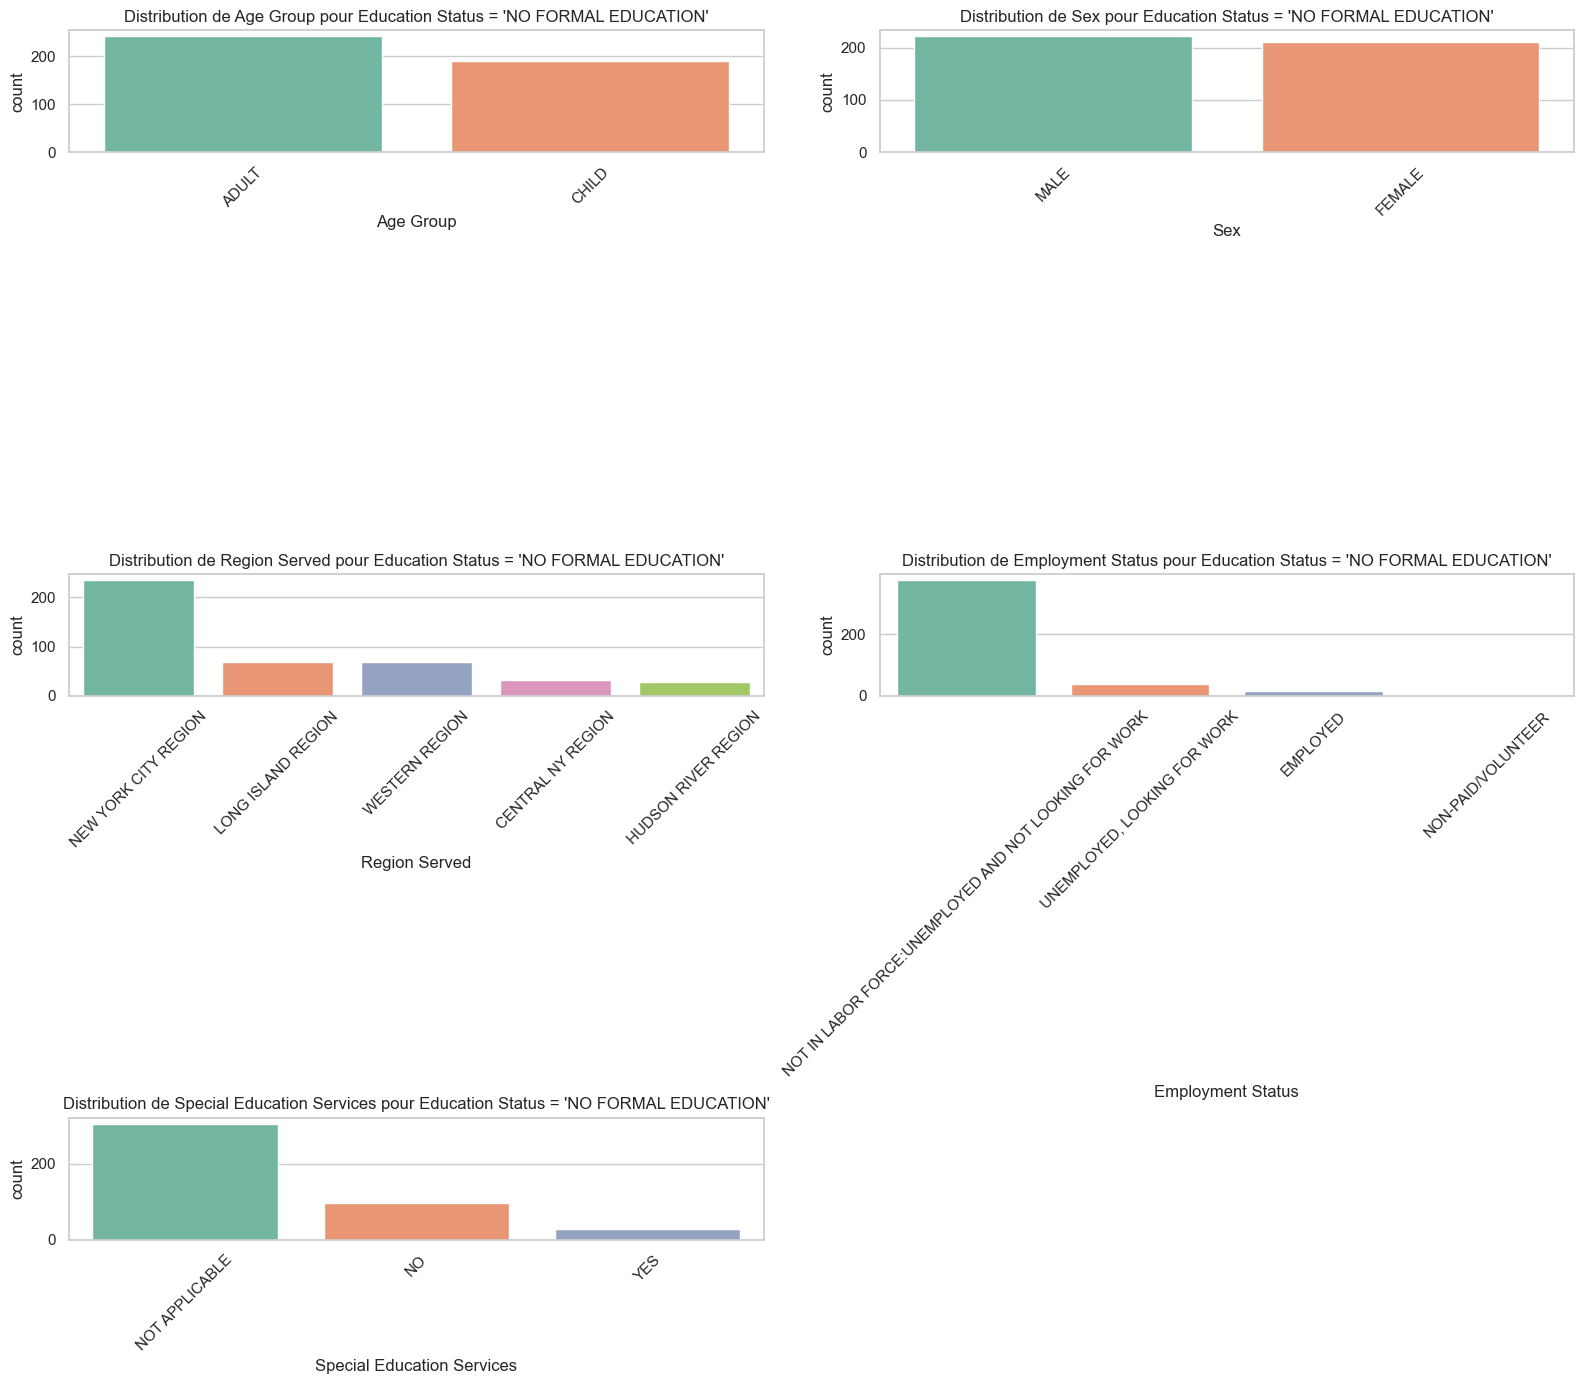

In [466]:
# Filter rows where Education Status is 'OTHER'
df_other = df[df["Education Status"] == "NO FORMAL EDUCATION"]

# List of columns to view
cols_to_plot = ["Age Group", "Sex", "Region Served", "Employment Status", "Special Education Services"]

# Create a subplot for each column
plt.figure(figsize=(16, 14))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df_other, x=col, order=df_other[col].value_counts().index, palette="Set2")
    plt.title(f"Distribution de {col} pour Education Status = 'NO FORMAL EDUCATION'")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


C:\Users\nirus\AppData\Local\Temp\ipykernel_17676\2473542705.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


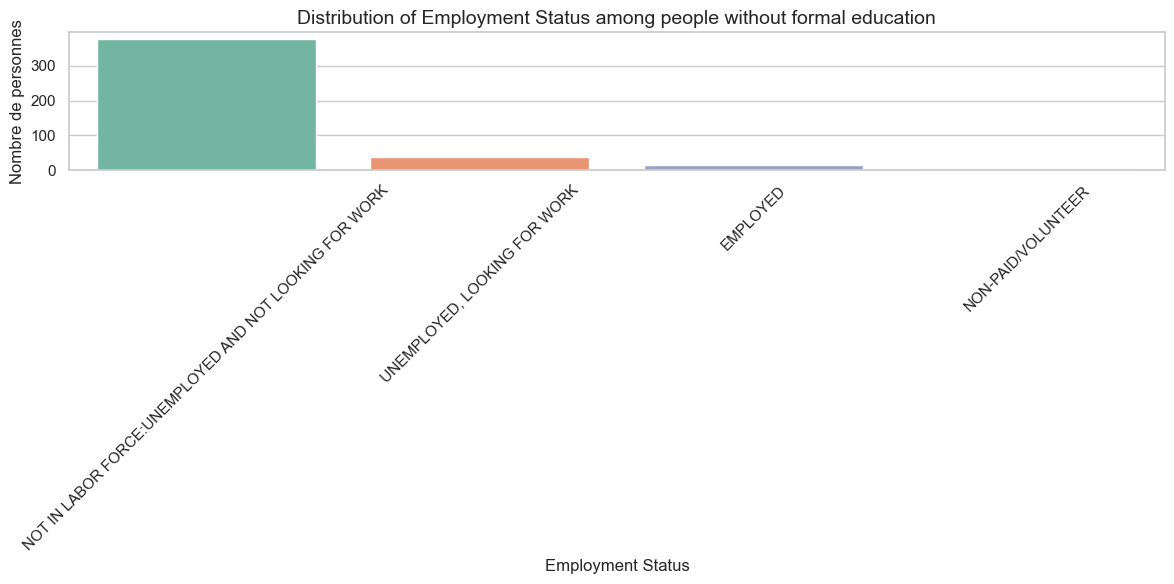

In [467]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only people with "NO FORMAL EDUCATION"
df_no_education = df[
    df["Education Status"].str.upper() == "NO FORMAL EDUCATION"
]

# Create a bar chart with Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_no_education,
    x="Employment Status",
    order=df_no_education["Employment Status"].value_counts().index,
    palette="Set2"
)

# Customize the chart
plt.title("Distribution of Employment Status among people without formal education", fontsize=14)
plt.xlabel("Employment Status")
plt.ylabel("Nombre de personnes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [468]:
# Copy the previous DataFrame
df_Ordinal1 = df_OneHot.copy()

# --- Ordinal Encoding ---
ordinal_cols = {
    "Living Situation": [
        "INSTITUTIONAL SETTING",  # less autonomous
        "OTHER LIVING SITUATION",  # unknown / temporary
        "PRIVATE RESIDENCE"   # stable and autonomous
    ],
    "Education Status": [
        "NO FORMAL EDUCATION", #jamais scolarisé
        "PRE-K TO FIFTH GRADE",# primaire
        "OTHER", # inconnu / atypique => regarder graphique précédent
        "MIDDLE SCHOOL TO HIGH SCHOOL", # secondaire
        "SOME COLLEGE", # post secondaire
        "COLLEGE OR GRADUATE DEGREE",  # diplôme universitaire

    ],
    "Employment Status": [
        "NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK",# non actif
        "UNEMPLOYED, LOOKING FOR WORK",# non employé et cherche a être actif
        "NON-PAID/VOLUNTEER", #actif non payé
        "EMPLOYED" #actif payé
    ],
    "Age Group": [
        "CHILD",
        "ADULT"
    ],
    "Number Of Hours Worked Each Week": [
        "NOT APPLICABLE", #0
        "01-14 HOURS",
        "15-34 HOURS",
        "35 HOURS OR MORE"
    ]
}

# Apply ordinal encoding in the new DataFrame
for col, categories in ordinal_cols.items():
    mapping = {cat: i for i, cat in enumerate(categories)}
    df_Ordinal1[col] = df_Ordinal1[col].map(mapping)

df_Ordinal1

Age Group  Living Situation Veteran Status  Employment Status  \
0               1                 2             NO                  3   
1               1                 2             NO                  3   
2               1                 2             NO                  3   
3               1                 1             NO                  3   
4               1                 2             NO                  3   
...           ...               ...            ...                ...   
196097          1                 1             NO                  0   
196098          1                 2             NO                  0   
196099          1                 2             NO                  0   
196100          0                 2             NO                  0   
196101          1                 2             NO                  0   

        Number Of Hours Worked Each Week  Education Status  Mental Illness  \
0                                      1                 5               1   
1                                      1                 5               1   
2                                      2                 4               1   
3                                      2                 3               1   
4                                      3                 4               1   
...                                  ...               ...             ...   
196097                                 0                 3               1   
196098                                 0                 5               1   
196099                                 0                 5               1   
196100                                 0                 3               1   
196101                                 0                 3               1   

       Intellectual Disability Autism Spectrum Other Developmental Disability  \
0                           NO              NO                             NO   
1                           NO              NO                             NO   
2                           NO              NO                            YES   
3                           NO              NO                             NO   
4                           NO              NO                             NO   
...                        ...             ...                            ...   
196097                     YES              NO                             NO   
196098                      NO              NO                            YES   
196099                      NO              NO                             NO   
196100                      NO              NO                             NO   
196101                      NO              NO                             NO   

        ... Additional Diagnosis Class_NOT MI - OTHER  \
0       ...                                     False   
1       ...                                     False   
2       ...                                     False   
3       ...                                     False   
4       ...                                     False   
...     ...                                       ...   
196097  ...                                     False   
196098  ...                                     False   
196099  ...                                     False   
196100  ...                                     False   
196101  ...                                     False   

       Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS  \
0                                                   False                     
1                                                   False                     
2                                                    True                     
3                                                    True                     
4                                                   False                     
...                                                   ...     

In [469]:
print(df_Ordinal1.isna().sum())

Age Group                                                              0
Living Situation                                                       0
Veteran Status                                                         0
Employment Status                                                      0
Number Of Hours Worked Each Week                                       0
                                                                      ..
Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS    0
Program Category_INPATIENT                                             0
Program Category_OUTPATIENT                                            0
Program Category_RESIDENTIAL                                           0
Program Category_SUPPORT                                               0
Length: 93, dtype: int64


In [470]:
df_Ordinal1["Education Status"].unique()

array([5, 4, 3, 2, 1, 0], dtype=int64)

In [471]:
print(df_Ordinal1["Medicaid Managed Insurance"].unique())


['YES' 'NO' 'NOT APPLICABLE']


In [472]:
#we group the "not applicable" with "no" in the "Medicaid Managed Insurance" column

df_Ordinal1["Medicaid Managed Insurance"] = df_Ordinal1["Medicaid Managed Insurance"].replace("NOT APPLICABLE", "NO")


In [473]:
#convert TRUE FALSE to 0 and 1
df_TrueFalse = df_Ordinal1.copy() 

for col in df_TrueFalse.columns:
    col_str = df_TrueFalse[col].astype(str).str.strip().str.lower()
    unique_vals = set(col_str.dropna().unique())
    if unique_vals.issubset({"true", "false"}):
        df_TrueFalse[col] = col_str.map({"true": 1, "false": 0})

df_TrueFalse

Age Group  Living Situation Veteran Status  Employment Status  \
0               1                 2             NO                  3   
1               1                 2             NO                  3   
2               1                 2             NO                  3   
3               1                 1             NO                  3   
4               1                 2             NO                  3   
...           ...               ...            ...                ...   
196097          1                 1             NO                  0   
196098          1                 2             NO                  0   
196099          1                 2             NO                  0   
196100          0                 2             NO                  0   
196101          1                 2             NO                  0   

        Number Of Hours Worked Each Week  Education Status  Mental Illness  \
0                                      1                 5               1   
1                                      1                 5               1   
2                                      2                 4               1   
3                                      2                 3               1   
4                                      3                 4               1   
...                                  ...               ...             ...   
196097                                 0                 3               1   
196098                                 0                 5               1   
196099                                 0                 5               1   
196100                                 0                 3               1   
196101                                 0                 3               1   

       Intellectual Disability Autism Spectrum Other Developmental Disability  \
0                           NO              NO                             NO   
1                           NO              NO                             NO   
2                           NO              NO                            YES   
3                           NO              NO                             NO   
4                           NO              NO                             NO   
...                        ...             ...                            ...   
196097                     YES              NO                             NO   
196098                      NO              NO                            YES   
196099                      NO              NO                             NO   
196100                      NO              NO                             NO   
196101                      NO              NO                             NO   

        ... Additional Diagnosis Class_NOT MI - OTHER  \
0       ...                                         0   
1       ...                                         0   
2       ...                                         0   
3       ...                                         0   
4       ...                                         0   
...     ...                                       ...   
196097  ...                                         0   
196098  ...                                         0   
196099  ...                                         0   
196100  ...                                         0   
196101  ...                                         0   

       Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS  \
0                                                       0                     
1                                                       0                     
2                                                       1                     
3                                                       1                     
4                                                       0                     
...                                                   ...     

In [474]:
#convert yes no to 0 and 1

dfYesNo = df_TrueFalse.copy() 

for col in dfYesNo.columns:
    col_str = dfYesNo[col].astype(str).str.strip().str.upper()
    unique_vals = set(col_str.dropna().unique())
    if unique_vals.issubset({"YES", "NO"}):
        dfYesNo[col] = col_str.map({"YES": 1, "NO": 0})

dfYesNo

Age Group  Living Situation  Veteran Status  Employment Status  \
0               1                 2               0                  3   
1               1                 2               0                  3   
2               1                 2               0                  3   
3               1                 1               0                  3   
4               1                 2               0                  3   
...           ...               ...             ...                ...   
196097          1                 1               0                  0   
196098          1                 2               0                  0   
196099          1                 2               0                  0   
196100          0                 2               0                  0   
196101          1                 2               0                  0   

        Number Of Hours Worked Each Week  Education Status  Mental Illness  \
0                                      1                 5               1   
1                                      1                 5               1   
2                                      2                 4               1   
3                                      2                 3               1   
4                                      3                 4               1   
...                                  ...               ...             ...   
196097                                 0                 3               1   
196098                                 0                 5               1   
196099                                 0                 5               1   
196100                                 0                 3               1   
196101                                 0                 3               1   

        Intellectual Disability  Autism Spectrum  \
0                             0                0   
1                             0                0   
2                             0                0   
3                             0                0   
4                             0                0   
...                         ...              ...   
196097                        1                0   
196098                        0                0   
196099                        0                0   
196100                        0                0   
196101                        0                0   

        Other Developmental Disability  ...  \
0                                    0  ...   
1                                    0  ...   
2                                    1  ...   
3                                    0  ...   
4                                    0  ...   
...                                ...  ...   
196097                               0  ...   
196098                               1  ...   
196099                               0  ...   
196100                               0  ...   
196101                               0  ...   

        Additional Diagnosis Class_NOT MI - OTHER  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
196097                                          0   
196098                                          0   
196099                                          0   
196100                                          0   
196101                                          0   

        Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS  \
0                                                       0                      
1                                                       0                      
2                                                       1                      
3                                  

In [475]:
# View columns in string type (object or string)
colonnes_string = dfYesNo.select_dtypes(include=["object", "string"]).columns
print(colonnes_string)


Index([], dtype='object')


In [476]:
print(df['Mental Illness'].value_counts())


Mental Illness
1    186957
0      9145
Name: count, dtype: Int64


Matrice de correlation

In [478]:
correlation_matrix = dfYesNo.corr(numeric_only=True)

In [479]:
#nirusa Path
correlation_matrix.to_excel("C:/Users/nirus/Documents/DSTI/Ml_project_MI/correlation_matrix.xlsx")


In [480]:
# Option to display up to 100 lines in the console
pd.set_option('display.max_rows', 100)

# Calculation of the correlation matrix on all numeric columns
correlation_matrix = dfYesNo.corr()
# Extracting correlations with the 'Mental Illness' column
correlations_with_mental = correlation_matrix["Mental Illness"]

# Sort in descending order
correlations_with_mental_sorted = correlations_with_mental.sort_values(ascending=False)

# Full display
print(correlations_with_mental_sorted)

Mental Illness                                                                       1.000000
Serious Mental Illness                                                               0.733476
SSI Cash Assistance                                                                  0.089605
Age Group                                                                            0.080903
Special Education Services_NOT APPLICABLE                                            0.073766
SSDI Cash Assistance                                                                 0.070730
Medicaid and Medicare Insurance                                                      0.066136
Medicare Insurance                                                                   0.061885
Education Status                                                                     0.060916
High Blood Pressure                                                                  0.058842
Program Category_RESIDENTIAL                                

Drop column 
=> We keep all the column

# V- MACHINE LEARNING PHASE

# Regression logistique

In [484]:
from sklearn.model_selection import train_test_split

In [485]:
df_train, df_test = train_test_split(dfYesNo,test_size = 0.2) # 20% go into testing and 80% on training

In [486]:
len(dfYesNo) #the size of the data frame

196102

In [487]:
len(df_train) #the size of the data frame of training

156881

In [488]:
len(df_test) #the size of the data frame of training

39221

In [489]:
print(dfYesNo.Sex_MALE.mean())
print(df_train.Sex_MALE.mean())
print(df_test.Sex_MALE.mean())

0.4919021733587623
0.4912385821100069
0.49455648759593074


In [490]:
print(dfYesNo["Mental Illness"].mean())
print(df_train["Mental Illness"].mean())
print(df_test["Mental Illness"].mean())


0.9533661053941316
0.9536718914336344
0.9521429846255832


In [491]:
df_train.columns

Index(['Age Group', 'Living Situation', 'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Mental Illness', 'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
       'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
       'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
       'Received Smok

In [492]:
# Select the desired columns
X_train = df_train.loc[:, [
    'Age Group', 'Living Situation', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status', 'Intellectual Disability',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Mobility Impairment Disorder',
       'Hearing Impairment', 'Visual Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
       'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
       'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
       'Received Smoking Counseling', 'Serious Mental Illness',
       'Alcohol 12m Service', 'Drug/Substance 12m Service',
       'SSI Cash Assistance', 'SSDI Cash Assistance',
       'Veterans Cash Assistance', 'Public Assistance Cash Program',
       'Other Cash Benefits', 'Medicaid and Medicare Insurance',
       'No Insurance', 'Unknown Insurance Coverage', 'Medicaid Insurance',
       'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance',
       'Child Health Plus Insurance', 'Region Served_LONG ISLAND REGION',
       'Region Served_NEW YORK CITY REGION', 'Region Served_WESTERN REGION',
       'Sex_MALE', 'Hispanic Ethnicity_YES, HISPANIC/LATINO',
       'Race_WHITE ONLY', 'Transgender_YES, TRANSGENDER',
       'Special Education Services_NOT APPLICABLE',
       'Household Composition_LIVES ALONE',
       'Household Composition_NOT APPLICABLE',
       'Sexual Orientation_LESBIAN OR GAY', 'Sexual Orientation_OTHER',
       'Sexual Orientation_STRAIGHT OR HETEROSEXUAL',
       'Religious Preference_I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS',
       'Religious Preference_I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON',
       'Additional Diagnosis Class_NO ADDITIONAL DIAGNOSIS',
       'Additional Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
       'Additional Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
       'Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
       'Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
       'Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
       'Principal Diagnosis Class_NOT MI - OTHER',
       'Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
       'Program Category_INPATIENT', 'Program Category_OUTPATIENT',
       'Program Category_RESIDENTIAL', 'Program Category_SUPPORT'
]].values

# Target
y_train = df_train['Mental Illness'].values


In [493]:
# get the values of the columns for the test data
X_test = df_test.loc[:, [
        'Age Group', 'Living Situation', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status', 'Intellectual Disability',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Mobility Impairment Disorder',
       'Hearing Impairment', 'Visual Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
       'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
       'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
       'Received Smoking Counseling', 'Serious Mental Illness',
       'Alcohol 12m Service', 'Drug/Substance 12m Service',
       'SSI Cash Assistance', 'SSDI Cash Assistance',
       'Veterans Cash Assistance', 'Public Assistance Cash Program',
       'Other Cash Benefits', 'Medicaid and Medicare Insurance',
       'No Insurance', 'Unknown Insurance Coverage', 'Medicaid Insurance',
       'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance',
       'Child Health Plus Insurance', 'Region Served_LONG ISLAND REGION',
       'Region Served_NEW YORK CITY REGION', 'Region Served_WESTERN REGION',
       'Sex_MALE', 'Hispanic Ethnicity_YES, HISPANIC/LATINO',
       'Race_WHITE ONLY', 'Transgender_YES, TRANSGENDER',
       'Special Education Services_NOT APPLICABLE',
       'Household Composition_LIVES ALONE',
       'Household Composition_NOT APPLICABLE',
       'Sexual Orientation_LESBIAN OR GAY', 'Sexual Orientation_OTHER',
       'Sexual Orientation_STRAIGHT OR HETEROSEXUAL',
       'Religious Preference_I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS',
       'Religious Preference_I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON',
       'Additional Diagnosis Class_NO ADDITIONAL DIAGNOSIS',
       'Additional Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
       'Additional Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
       'Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
       'Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
       'Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
       'Principal Diagnosis Class_NOT MI - OTHER',
       'Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
       'Program Category_INPATIENT', 'Program Category_OUTPATIENT',
       'Program Category_RESIDENTIAL', 'Program Category_SUPPORT']].values

#Target
y_test = df_test['Mental Illness'].values


In [494]:
from sklearn.linear_model import LogisticRegression

In [495]:
lr_model = LogisticRegression(random_state=300, max_iter=1000, class_weight='balanced') # Attribuer un poids plus élevé à la classe minoritaire lors de l'entraînement du modèle

In [496]:
import joblib
joblib.dump(lr_model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [497]:
# here we train the model on the training data
lr_model.fit(X=X_train, y=y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=300)

In [498]:
y_test_predicted = lr_model.predict(X_test) #want model to give predictions

In [499]:
y_test_predicted  # what the model predict

array([1., 1., 1., ..., 1., 1., 0.])

In [500]:
y_test # the reality

<IntegerArray>
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
 ...
 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
Length: 39221, dtype: Int64

In [501]:
(y_test_predicted == y_test).sum()/len(y_test) # calculate the accuracy by hand

0.9660895948598965

In [502]:
from sklearn.metrics import confusion_matrix # or confusion matrix (true positif ...)

In [503]:
cf = pd.DataFrame(
    columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"]
)

In [504]:
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted)

In [505]:
cf

y_test_0 y_test_1
y_pred_0     1875        2
y_pred_1     1328    36016

In [506]:
cf/len(y_test)

y_test_0  y_test_1
y_pred_0  0.047806  0.000051
y_pred_1  0.033859  0.918284

In [507]:
from sklearn.metrics import recall_score, precision_score # precision score, accuracy score, f1 score

In [508]:
recall_score(y_true=y_test, y_pred=y_test_predicted)


0.9644387317909169

In [509]:
from sklearn.metrics import classification_report

In [510]:
report =classification_report(y_true=y_test, y_pred=y_test_predicted)

In [511]:
print(report) # support mean how many row


              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74      1877
         1.0       1.00      0.96      0.98     37344

    accuracy                           0.97     39221
   macro avg       0.79      0.98      0.86     39221
weighted avg       0.98      0.97      0.97     39221



Logistic regression with SMOTE MODE (data imbalance management)

In [513]:
#install the packages for data imbalance
#!pip install pandas scikit-learn imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [514]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [515]:
# Split the dataset
df_train, df_test = train_test_split(dfYesNo, test_size=0.2)

In [516]:
# Dataset size
len(dfYesNo)
len(df_train)
len(df_test)


39221

In [517]:
# Average of the variable Sex_MALE
print(dfYesNo.Sex_MALE.mean())
print(df_train.Sex_MALE.mean())
print(df_test.Sex_MALE.mean())

0.4919021733587623
0.49248156245816893
0.4895846612783968


In [518]:
# Average of the Mental Illness variable
print(dfYesNo["Mental Illness"].mean())
print(df_train["Mental Illness"].mean())
print(df_test["Mental Illness"].mean())


0.9533661053941316
0.9535890260770903
0.9524744397134188


In [519]:
df_train.columns

Index(['Age Group', 'Living Situation', 'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Mental Illness', 'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
       'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
       'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
       'Received Smok

In [520]:
# Feature selection for X_train
X_train = df_train.loc[:, [
    'Age Group', 'Living Situation', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status', 'Intellectual Disability',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Mobility Impairment Disorder',
    'Hearing Impairment', 'Visual Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
    'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
    'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
    'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
    'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
    'Received Smoking Counseling', 'Serious Mental Illness',
    'Alcohol 12m Service', 'Drug/Substance 12m Service',
    'SSI Cash Assistance', 'SSDI Cash Assistance',
    'Veterans Cash Assistance', 'Public Assistance Cash Program',
    'Other Cash Benefits', 'Medicaid and Medicare Insurance',
    'No Insurance', 'Unknown Insurance Coverage', 'Medicaid Insurance',
    'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance',
    'Child Health Plus Insurance', 'Region Served_LONG ISLAND REGION',
    'Region Served_NEW YORK CITY REGION', 'Region Served_WESTERN REGION',
    'Sex_MALE', 'Hispanic Ethnicity_YES, HISPANIC/LATINO',
    'Race_WHITE ONLY', 'Transgender_YES, TRANSGENDER',
    'Special Education Services_NOT APPLICABLE',
    'Household Composition_LIVES ALONE',
    'Household Composition_NOT APPLICABLE',
    'Sexual Orientation_LESBIAN OR GAY', 'Sexual Orientation_OTHER',
    'Sexual Orientation_STRAIGHT OR HETEROSEXUAL',
    'Religious Preference_I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS',
    'Religious Preference_I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON',
    'Additional Diagnosis Class_NO ADDITIONAL DIAGNOSIS',
    'Additional Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
    'Additional Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
    'Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
    'Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
    'Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
    'Principal Diagnosis Class_NOT MI - OTHER',
    'Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
    'Program Category_INPATIENT', 'Program Category_OUTPATIENT',
    'Program Category_RESIDENTIAL', 'Program Category_SUPPORT'
]].values

# Target
y_train = df_train['Mental Illness'].values


In [521]:
# Test set
X_test = df_test.loc[:, [
    'Age Group', 'Living Situation', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status', 'Intellectual Disability',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Mobility Impairment Disorder',
    'Hearing Impairment', 'Visual Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
    'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
    'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
    'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
    'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
    'Received Smoking Counseling', 'Serious Mental Illness',
    'Alcohol 12m Service', 'Drug/Substance 12m Service',
    'SSI Cash Assistance', 'SSDI Cash Assistance',
    'Veterans Cash Assistance', 'Public Assistance Cash Program',
    'Other Cash Benefits', 'Medicaid and Medicare Insurance',
    'No Insurance', 'Unknown Insurance Coverage', 'Medicaid Insurance',
    'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance',
    'Child Health Plus Insurance', 'Region Served_LONG ISLAND REGION',
    'Region Served_NEW YORK CITY REGION', 'Region Served_WESTERN REGION',
    'Sex_MALE', 'Hispanic Ethnicity_YES, HISPANIC/LATINO',
    'Race_WHITE ONLY', 'Transgender_YES, TRANSGENDER',
    'Special Education Services_NOT APPLICABLE',
    'Household Composition_LIVES ALONE',
    'Household Composition_NOT APPLICABLE',
    'Sexual Orientation_LESBIAN OR GAY', 'Sexual Orientation_OTHER',
    'Sexual Orientation_STRAIGHT OR HETEROSEXUAL',
    'Religious Preference_I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS',
    'Religious Preference_I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON',
    'Additional Diagnosis Class_NO ADDITIONAL DIAGNOSIS',
    'Additional Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
    'Additional Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
    'Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
    'Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
    'Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
    'Principal Diagnosis Class_NOT MI - OTHER',
    'Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
    'Program Category_INPATIENT', 'Program Category_OUTPATIENT',
    'Program Category_RESIDENTIAL', 'Program Category_SUPPORT'
]].values

# target test
y_test = df_test['Mental Illness'].values

In [522]:
# === ADDED SMOTE (with normalization) ===
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(sampling_strategy=0.30, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

print("Avant SMOTE :", pd.Series(y_train).value_counts())
print("Après SMOTE :", pd.Series(y_train_smote).value_counts())


Avant SMOTE : 1    149600
0      7281
Name: count, dtype: Int64
Après SMOTE : 1.0    149600
0.0     44880
Name: count, dtype: int64


In [523]:
# === Modèle ===
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=300, max_iter=1000, class_weight='balanced')  # pondération automatique

In [524]:
import joblib
joblib.dump(lr_model, 'logistic_regression_model_SMOTE2.joblib')


['logistic_regression_model_SMOTE2.joblib']

In [525]:
# Training
lr_model.fit(X=X_train_smote, y=y_train_smote)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=300)

In [526]:
# Prédiction
y_test_predicted = lr_model.predict(X_test_scaled)

In [527]:
# Predictions and metrics
y_test_predicted
y_test
(y_test_predicted == y_test).sum() / len(y_test)

0.9688177251982356

In [528]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cf = pd.DataFrame(
    columns=["y_test_0", "y_test_1"], index=["y_pred_0", "y_pred_1"]
)

In [529]:
cf.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_test_predicted)


In [530]:
cf

y_test_0 y_test_1
y_pred_0     1856        8
y_pred_1     1215    36142

In [531]:
cf / len(y_test)

y_test_0  y_test_1
y_pred_0  0.047322  0.000204
y_pred_1  0.030978  0.921496

In [532]:
# Scores
from sklearn.metrics import recall_score, precision_score
recall_score(y_true=y_test, y_pred=y_test_predicted)

0.9674759750515298

In [533]:
from sklearn.metrics import classification_report
report_LR_SOMTE = classification_report(y_true=y_test, y_pred=y_test_predicted)
print(report_LR_SOMTE)

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75      1864
         1.0       1.00      0.97      0.98     37357

    accuracy                           0.97     39221
   macro avg       0.80      0.98      0.87     39221
weighted avg       0.98      0.97      0.97     39221



# Random Forest

In [535]:
from sklearn.ensemble import RandomForestClassifier

In [536]:
rf_model = RandomForestClassifier()

In [537]:
rf_model.fit(X=X_train,y=y_train)

RandomForestClassifier()

In [538]:
y_test_predicted_rf = rf_model.predict(X_test)

In [539]:
report_rf = classification_report(y_pred=y_test_predicted_rf,y_true=y_test)

Random forest with SMOTE MODE (data imbalance management)

In [541]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [542]:
# Split the data Set
df_train, df_test = train_test_split(dfYesNo, test_size=0.2)

In [543]:
# Dataset size
len(dfYesNo)
len(df_train)
len(df_test)

39221

In [544]:
X_train = df_train.loc[:, [
    'Age Group', 'Living Situation', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status', 'Intellectual Disability',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Mobility Impairment Disorder',
    'Hearing Impairment', 'Visual Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
    'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
    'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
    'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
    'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
    'Received Smoking Counseling', 'Serious Mental Illness',
    'Alcohol 12m Service', 'Drug/Substance 12m Service',
    'SSI Cash Assistance', 'SSDI Cash Assistance',
    'Veterans Cash Assistance', 'Public Assistance Cash Program',
    'Other Cash Benefits', 'Medicaid and Medicare Insurance',
    'No Insurance', 'Unknown Insurance Coverage', 'Medicaid Insurance',
    'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance',
    'Child Health Plus Insurance', 'Region Served_LONG ISLAND REGION',
    'Region Served_NEW YORK CITY REGION', 'Region Served_WESTERN REGION',
    'Sex_MALE', 'Hispanic Ethnicity_YES, HISPANIC/LATINO',
    'Race_WHITE ONLY', 'Transgender_YES, TRANSGENDER',
    'Special Education Services_NOT APPLICABLE',
    'Household Composition_LIVES ALONE',
    'Household Composition_NOT APPLICABLE',
    'Sexual Orientation_LESBIAN OR GAY', 'Sexual Orientation_OTHER',
    'Sexual Orientation_STRAIGHT OR HETEROSEXUAL',
    'Religious Preference_I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS',
    'Religious Preference_I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON',
    'Additional Diagnosis Class_NO ADDITIONAL DIAGNOSIS',
    'Additional Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
    'Additional Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
    'Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
    'Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
    'Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
    'Principal Diagnosis Class_NOT MI - OTHER',
    'Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
    'Program Category_INPATIENT', 'Program Category_OUTPATIENT',
    'Program Category_RESIDENTIAL', 'Program Category_SUPPORT'
]].values

# Target
y_train = df_train['Mental Illness'].values

In [545]:
# Test set
X_test = df_test.loc[:, [
    'Age Group', 'Living Situation', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status', 'Intellectual Disability',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Mobility Impairment Disorder',
    'Hearing Impairment', 'Visual Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
    'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
    'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
    'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
    'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
    'Received Smoking Counseling', 'Serious Mental Illness',
    'Alcohol 12m Service', 'Drug/Substance 12m Service',
    'SSI Cash Assistance', 'SSDI Cash Assistance',
    'Veterans Cash Assistance', 'Public Assistance Cash Program',
    'Other Cash Benefits', 'Medicaid and Medicare Insurance',
    'No Insurance', 'Unknown Insurance Coverage', 'Medicaid Insurance',
    'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance',
    'Child Health Plus Insurance', 'Region Served_LONG ISLAND REGION',
    'Region Served_NEW YORK CITY REGION', 'Region Served_WESTERN REGION',
    'Sex_MALE', 'Hispanic Ethnicity_YES, HISPANIC/LATINO',
    'Race_WHITE ONLY', 'Transgender_YES, TRANSGENDER',
    'Special Education Services_NOT APPLICABLE',
    'Household Composition_LIVES ALONE',
    'Household Composition_NOT APPLICABLE',
    'Sexual Orientation_LESBIAN OR GAY', 'Sexual Orientation_OTHER',
    'Sexual Orientation_STRAIGHT OR HETEROSEXUAL',
    'Religious Preference_I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS',
    'Religious Preference_I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON',
    'Additional Diagnosis Class_NO ADDITIONAL DIAGNOSIS',
    'Additional Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
    'Additional Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
    'Additional Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
    'Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS',
    'Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER',
    'Principal Diagnosis Class_NOT MI - OTHER',
    'Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS',
    'Program Category_INPATIENT', 'Program Category_OUTPATIENT',
    'Program Category_RESIDENTIAL', 'Program Category_SUPPORT'
]].values

# target test
y_test = df_test['Mental Illness'].values

In [546]:
# === ADDED SMOTE (with normalization) ===
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [547]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [548]:
# sampling_strategy = 0.11 → la classe minoritaire atteindra 11 % de la majoritaire
sm = SMOTE(sampling_strategy=0.11, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

In [549]:
print("Avant SMOTE :", pd.Series(y_train).value_counts())
print("Après SMOTE :", pd.Series(y_train_smote).value_counts())


Avant SMOTE : 1    149549
0      7332
Name: count, dtype: Int64
Après SMOTE : 1.0    149549
0.0     16450
Name: count, dtype: int64


In [550]:
# === Modèle Random Forest ===
from sklearn.ensemble import RandomForestClassifier

In [551]:
rf_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100,
)

In [552]:
import joblib
joblib.dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [553]:
# Entraînement
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [554]:
# Prédiction avec seuil personnalisé
y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
y_test_predicted = (y_probs > 0.4).astype(int)  # on tester 0.4 ou 0.6 aussi

In [555]:
# Prédictions et métriques
y_test_predicted
y_test
(y_test_predicted == y_test).sum() / len(y_test)

0.9828663216134214

In [556]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cf = pd.DataFrame(
    columns=["y_test_0", "y_test_1"], index=["y_pred_0", "y_pred_1"]
)

In [557]:
cf.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_test_predicted)
print(cf)

         y_test_0 y_test_1
y_pred_0     1418      395
y_pred_1      277    37131


In [558]:
print(cf / len(y_test))

          y_test_0  y_test_1
y_pred_0  0.036154  0.010071
y_pred_1  0.007063  0.946712


In [559]:
# Scores
from sklearn.metrics import recall_score, precision_score, classification_report

In [560]:
print("Recall (classe 0) :", recall_score(y_test, y_test_predicted, pos_label=0))
print("Précision (classe 0) :", precision_score(y_test, y_test_predicted, pos_label=0))

Recall (classe 0) : 0.7821290678433536
Précision (classe 0) : 0.8365781710914454


In [561]:
report_RFSmote = classification_report(y_true=y_test, y_pred=y_test_predicted)
print(report_RFSmote)

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1813
         1.0       0.99      0.99      0.99     37408

    accuracy                           0.98     39221
   macro avg       0.91      0.89      0.90     39221
weighted avg       0.98      0.98      0.98     39221



# Decision tree Classifer

In [563]:
from sklearn.tree import DecisionTreeClassifier

In [564]:
# Try a Decision Tree classifier
dt_model = DecisionTreeClassifier()

In [565]:
dt_model.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

In [566]:
y_test_predicted_dt = dt_model.predict(X_test)

In [567]:
report_dt = classification_report(y_pred=y_test_predicted_dt,y_true=y_test)

In [568]:
from sklearn.ensemble import RandomForestClassifier # random forest model

# Comparaison between Regression logistic, Decision Tree classifer and RandomForest

In [570]:
print("Report of logistic regression")

print(report)

Report of logistic regression
              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74      1877
         1.0       1.00      0.96      0.98     37344

    accuracy                           0.97     39221
   macro avg       0.79      0.98      0.86     39221
weighted avg       0.98      0.97      0.97     39221



In [571]:
print("Report of logistic regression with Smote mode")

print(report_LR_SOMTE)

Report of logistic regression with Smote mode
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75      1864
         1.0       1.00      0.97      0.98     37357

    accuracy                           0.97     39221
   macro avg       0.80      0.98      0.87     39221
weighted avg       0.98      0.97      0.97     39221



In [572]:
print("Report of Random Forest model")
print(report_rf)

Report of Random Forest model
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      1864
         1.0       0.99      0.99      0.99     37357

    accuracy                           0.98     39221
   macro avg       0.94      0.89      0.91     39221
weighted avg       0.98      0.98      0.98     39221



In [573]:
print("Report of Random forest With SMOTE mode")

print(report_RFSmote)


Report of Random forest With SMOTE mode
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1813
         1.0       0.99      0.99      0.99     37408

    accuracy                           0.98     39221
   macro avg       0.91      0.89      0.90     39221
weighted avg       0.98      0.98      0.98     39221



In [574]:
print("Report of Decision Tree classifier model")
print(report_dt)

Report of Decision Tree classifier model
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1813
         1.0       0.99      0.99      0.99     37408

    accuracy                           0.98     39221
   macro avg       0.90      0.90      0.90     39221
weighted avg       0.98      0.98      0.98     39221

